<a href="https://colab.research.google.com/github/TomerDwek/Machine-Learning/blob/main/housepriceshw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# My Details
- Name: Tomer Dwek
- ID: 313229486
- Kaggle User Profile: https://www.kaggle.com/tomerdwek

# Package Updates

In [ ]:
# update plotly and pandas_profiling version
!pip install --upgrade plotly
!pip install sweetviz

Requirement already up-to-date: plotly in /usr/local/lib/python3.6/dist-packages (4.14.1)


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Imports and Defenitions**

In [ ]:
# import numpy, matplotlib, etc.
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# sklearn imports
from sklearn import metrics
from sklearn import pipeline
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import neural_network
from sklearn import model_selection
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from plotly.subplots import make_subplots
from sklearn.model_selection import KFold
from tqdm.auto import tqdm
from math import sqrt
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.compose import ColumnTransformer
import sweetviz as sw

In [ ]:
# load data frame from csv

# load from kaggle
#house_prices_df = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
#test_df = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")

# load from colab
house_prices_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# **House Prices Prediction**
Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.  
In this exercise, we need to predict house prices in Ames, Iowa based on many different house features.

![Webp net-resizeimage](https://user-images.githubusercontent.com/59745744/101808644-443ff800-3b1f-11eb-819c-9065a2db3661.jpg)

In [ ]:
pd.set_option('display.max_columns', None)
house_prices_df.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
5         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
6         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
7         Lvl    AllPub    Corner       Gtl       NWAmes       PosN   
8         Lvl    AllPub    Inside       Gtl      OldTown     Artery   
9         Lvl    AllPub    Corner       Gtl      BrkSide     Artery   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   
5       Norm     1Fam     1.5Fin            5            5       1993   
6       Norm     1Fam     1Story            8            5       2004   
7       Norm     1Fam     2Story            7            6       1973   
8       Norm     1Fam     1.5Fin            7            5       1931   
9     Artery   2fmCon     1.5Unf            5            6       1939   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
5          1995     Gable  CompShg     VinylSd     VinylSd       None   
6          2005     Gable  CompShg     VinylSd     VinylSd      Stone   
7          1973     Gable  CompShg     HdBoard     HdBoard      Stone   
8          1950     Gable  CompShg     BrkFace     Wd Shng       None   
9          1950     Gable  CompShg     MetalSd     MetalSd       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   
5         0.0        TA        TA       Wood       Gd       TA           No   
6       186.0        Gd        TA      PConc       Ex       TA           Av   
7       240.0        TA        TA     CBlock       Gd       TA           Mn   
8         0.0        TA        TA     BrkTil       TA       TA           No   
9       

# **Data Description**

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
	
LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
       	
Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
		
LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
		
Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
	
LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
	
LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
	
Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
			
Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
	
HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
	
OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
		
YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed
		
RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
		
Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
MasVnrArea: Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
		
BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		
BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
		
HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
CentralAir: Central air conditioning

       N	No
       Y	Yes
		
Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
		
1stFlrSF: First Floor square feet
 
2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       	
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		
Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
		
GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
GarageYrBlt: Year garage was built
		
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		
GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
		
WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
	
MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
		
MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		
SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)


# **Data Visualization**
Our data is made up of categorical features and numerical features.  
We will use SweetViz to display report on house prices data.


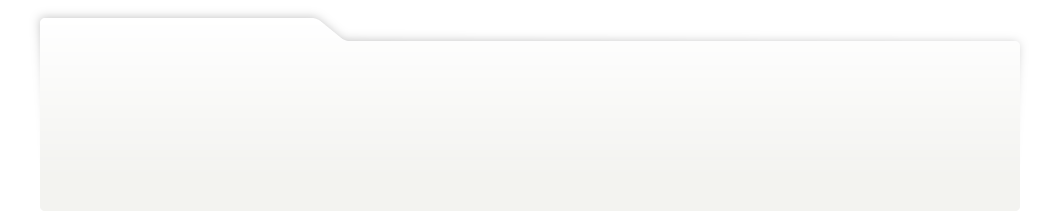
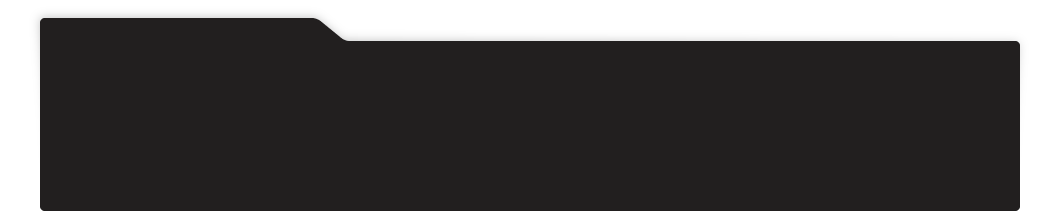
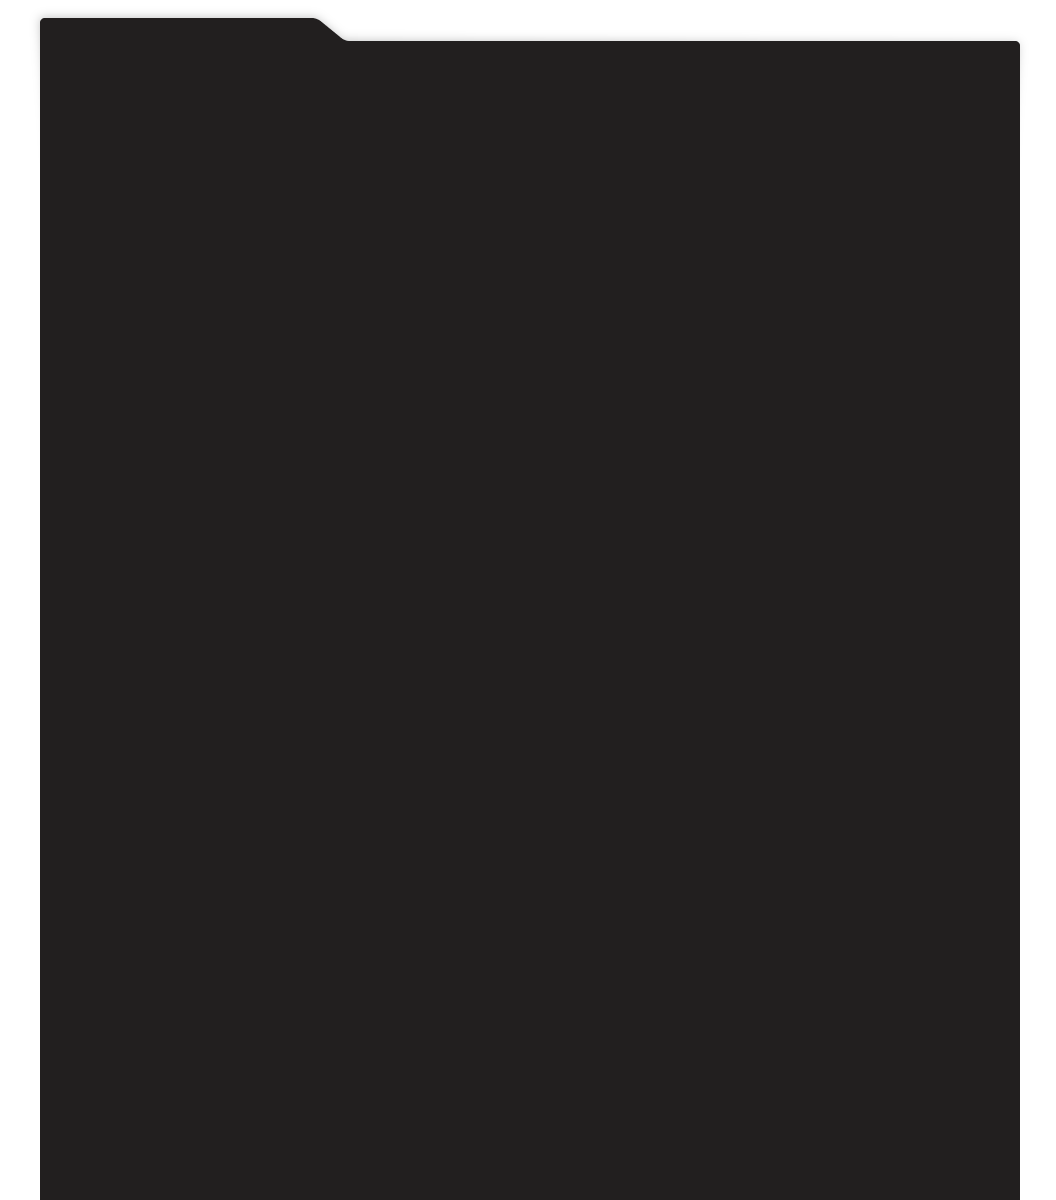
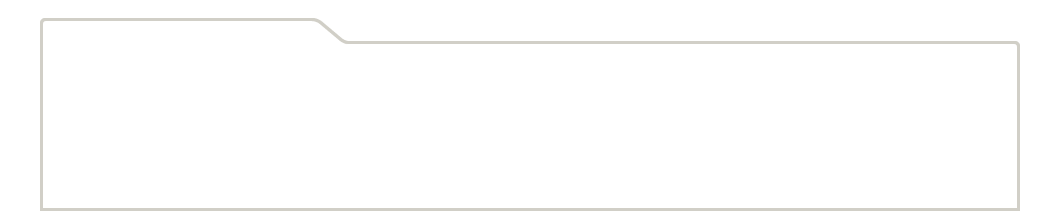
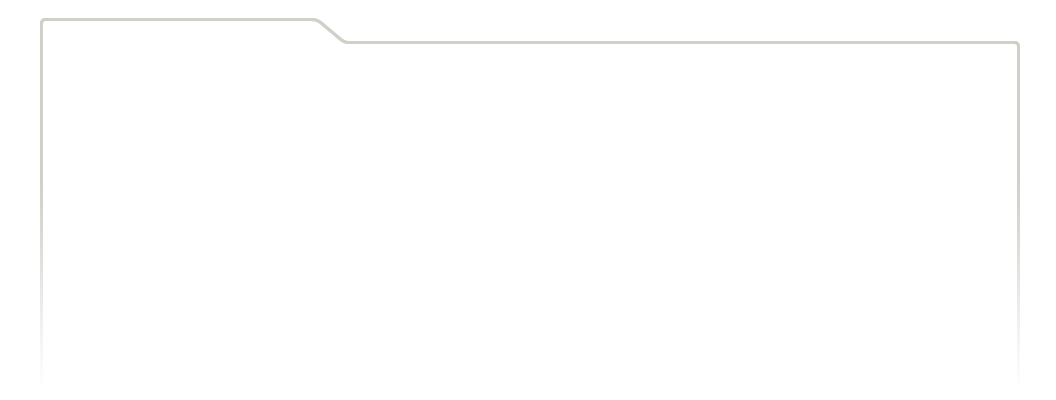
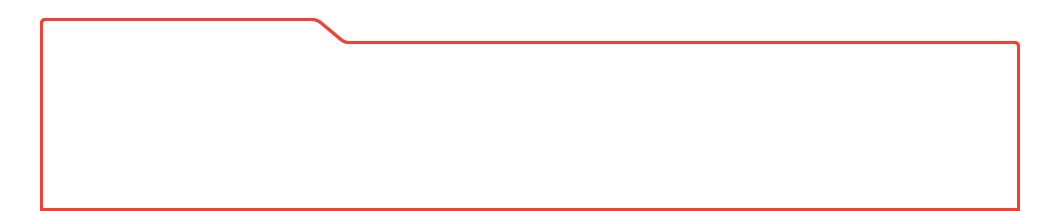
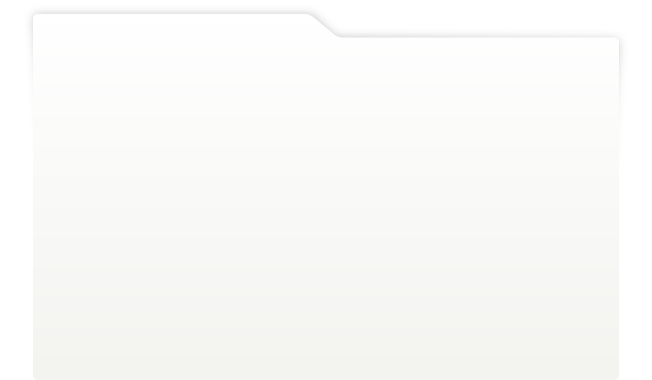
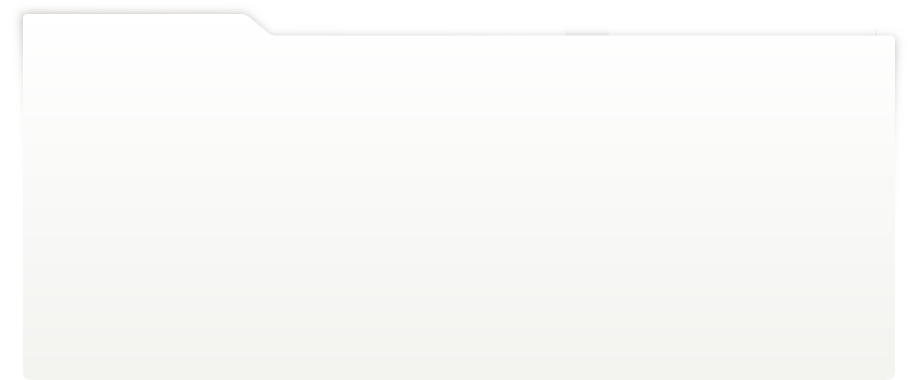
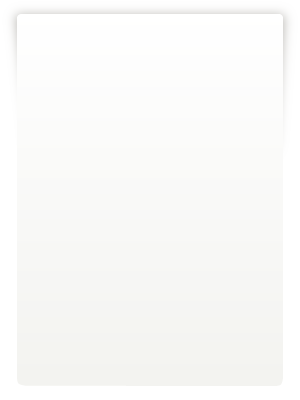
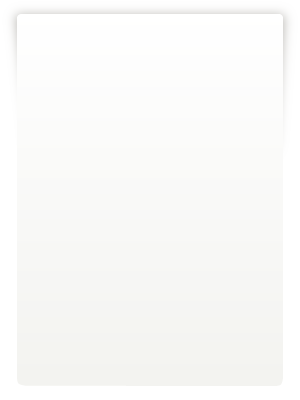
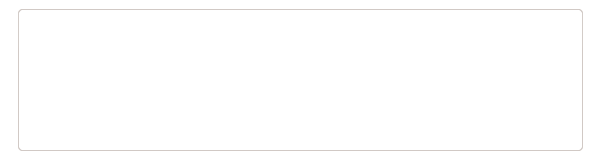
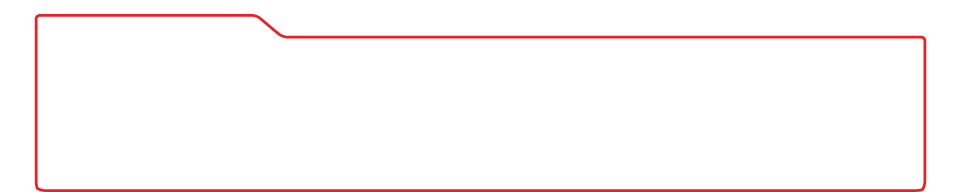
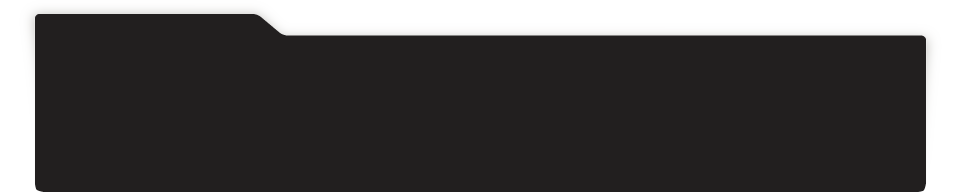
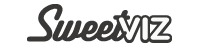
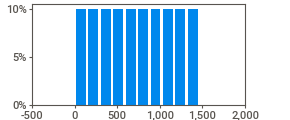
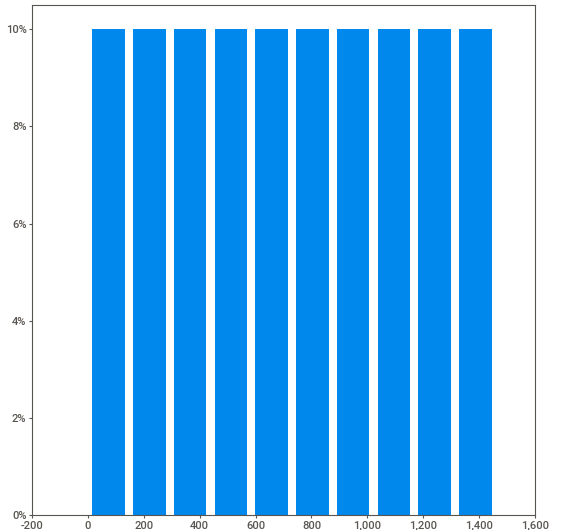
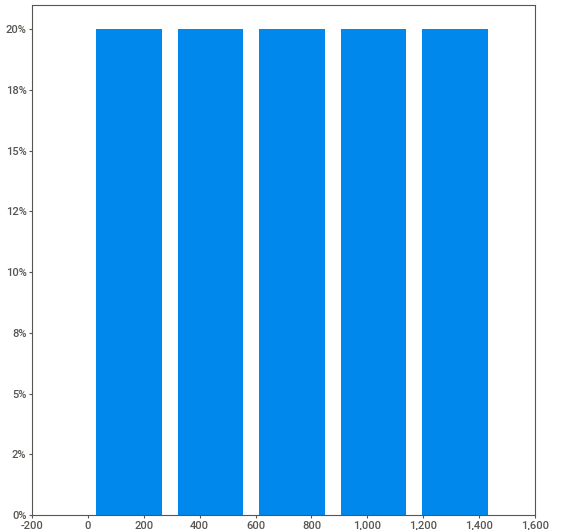
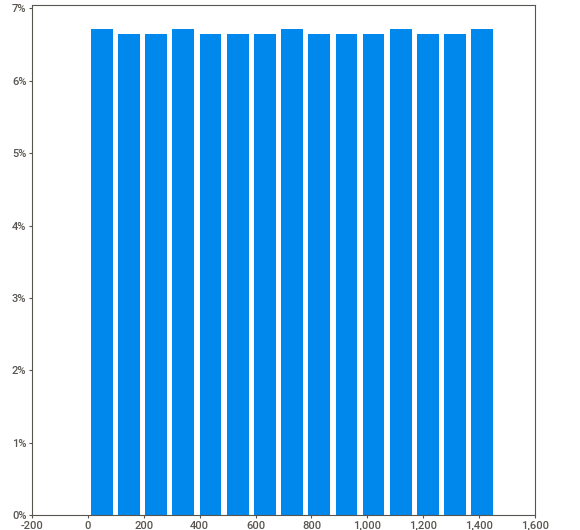
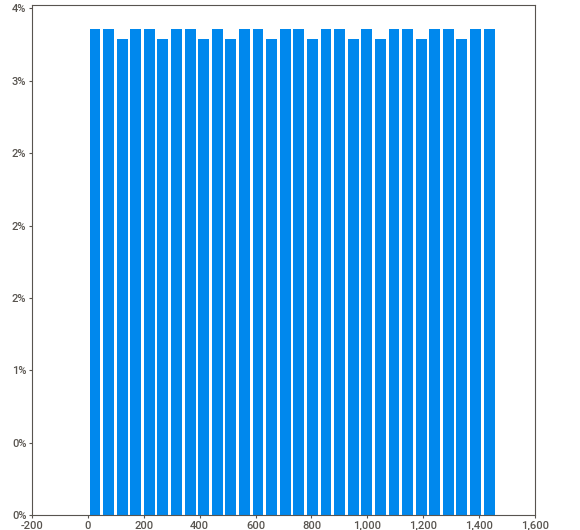
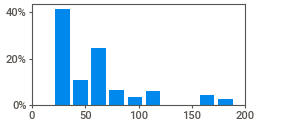
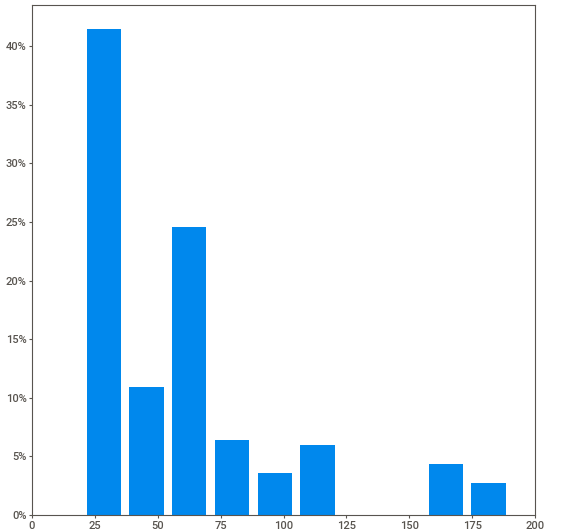
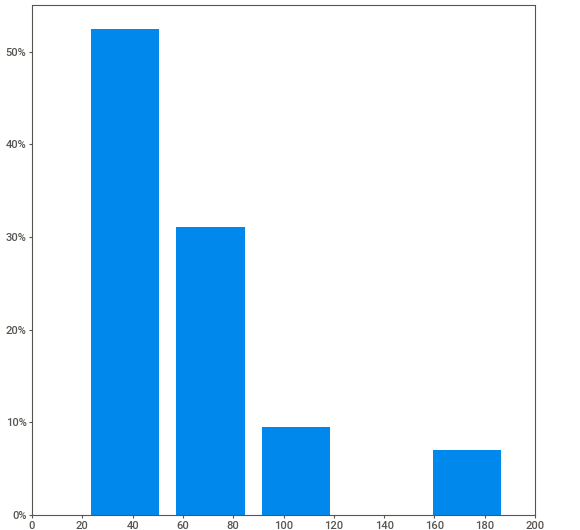
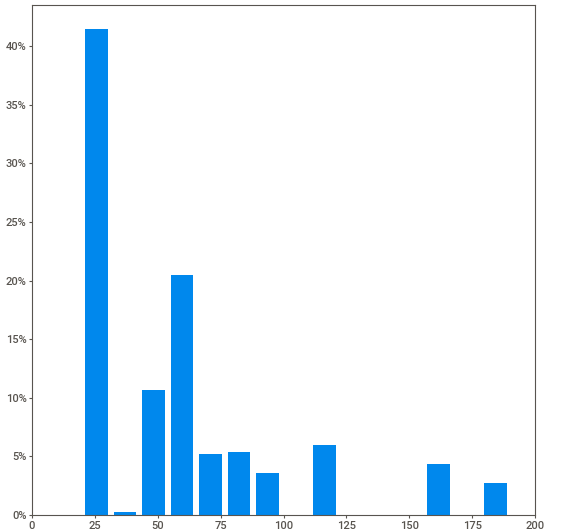
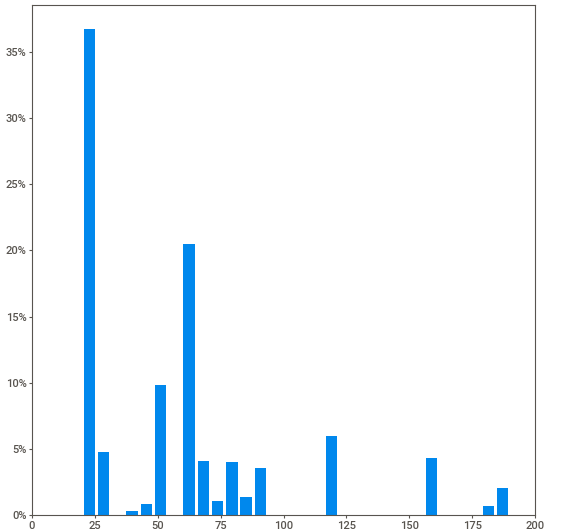
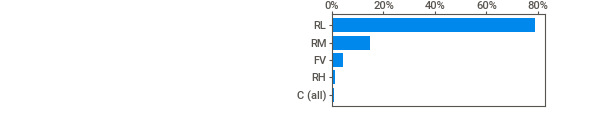
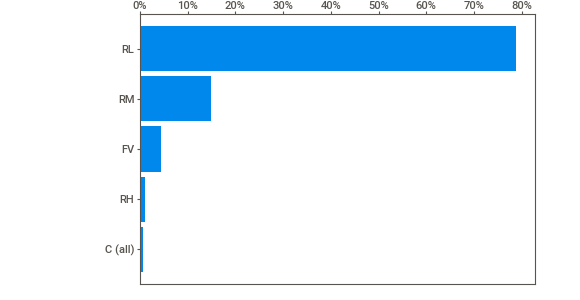
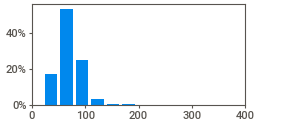
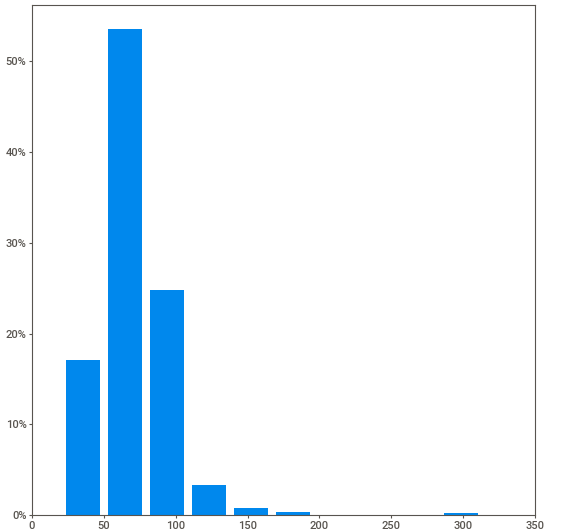
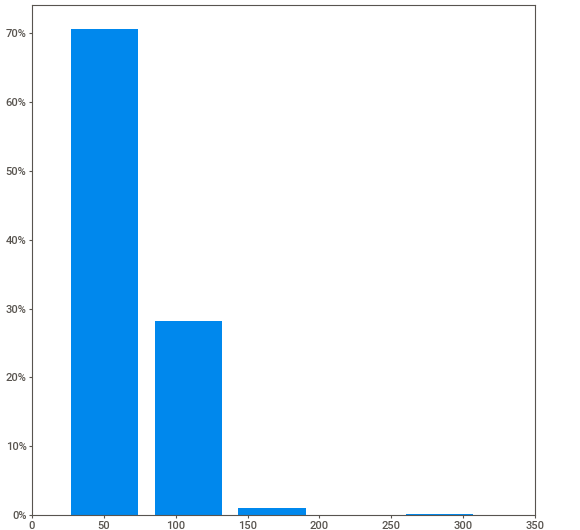
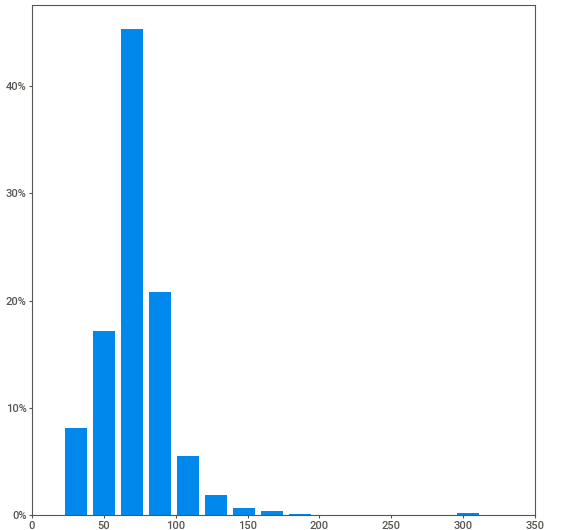
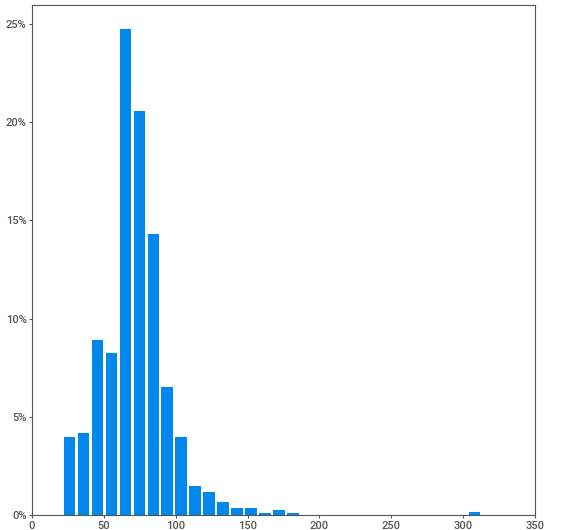
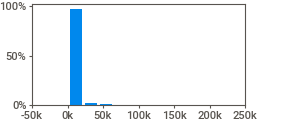
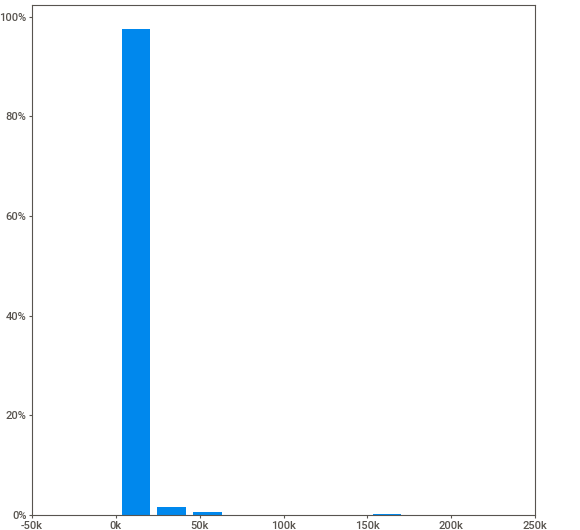
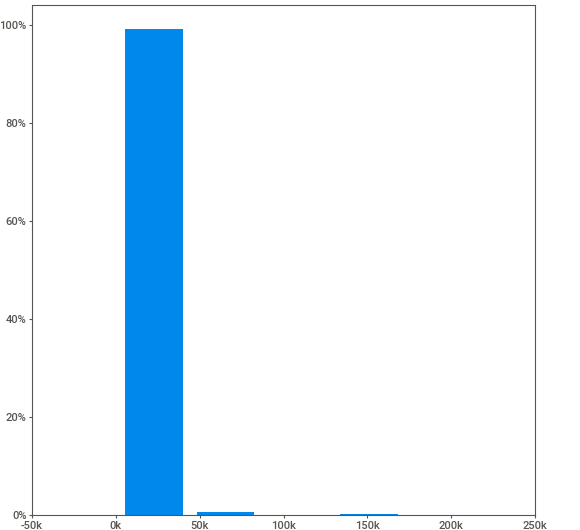
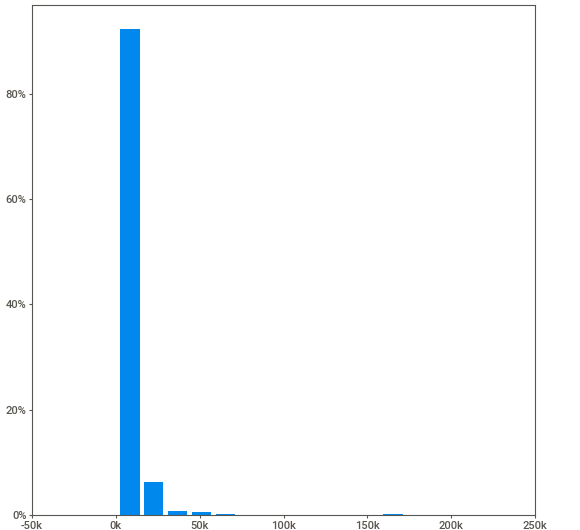
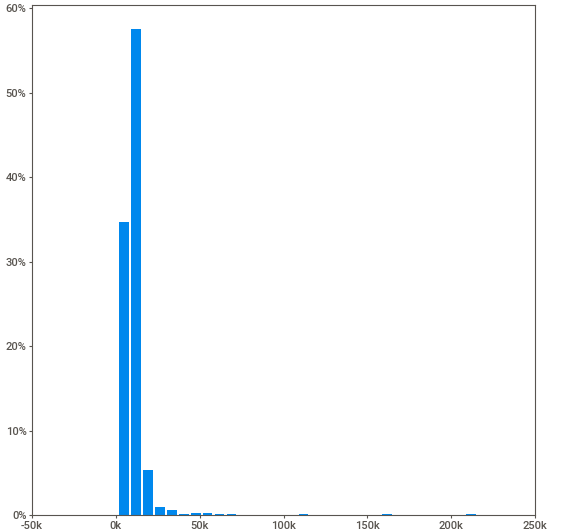
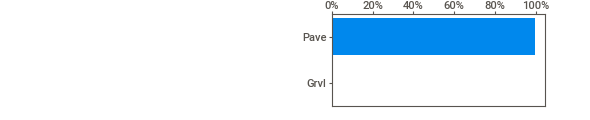
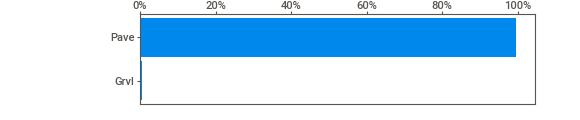
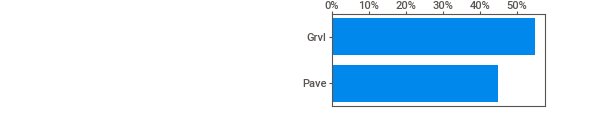
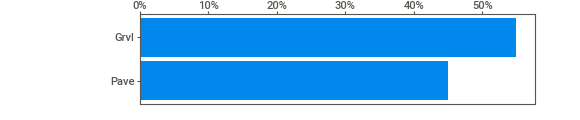
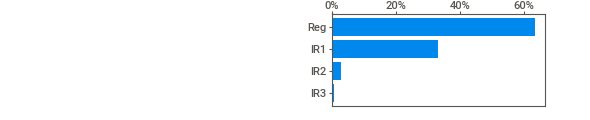
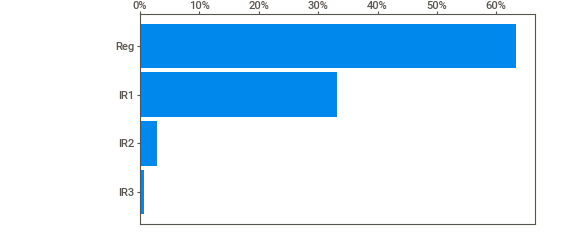
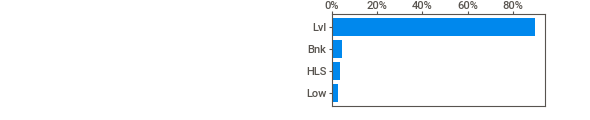
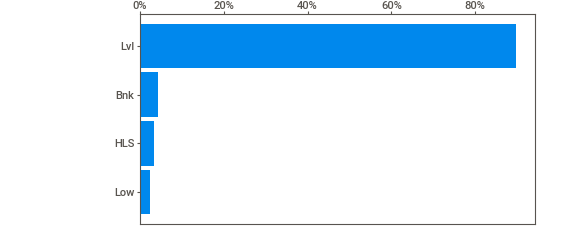
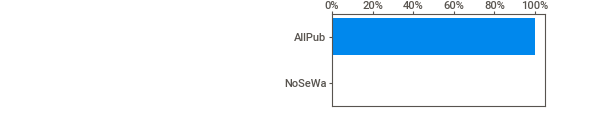
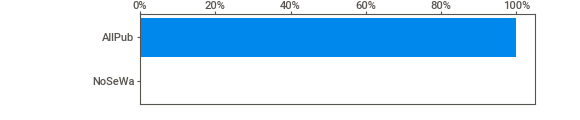
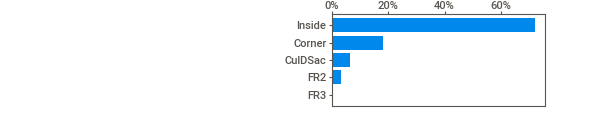
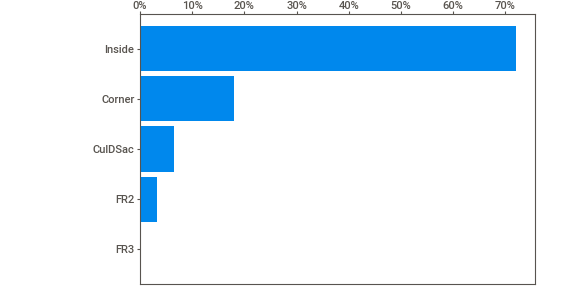
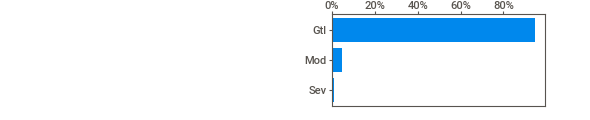
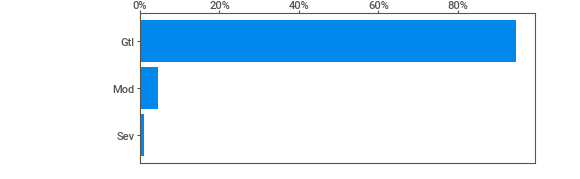
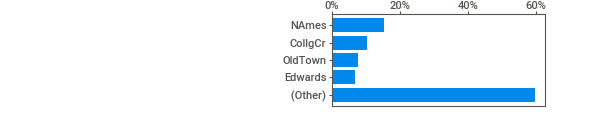
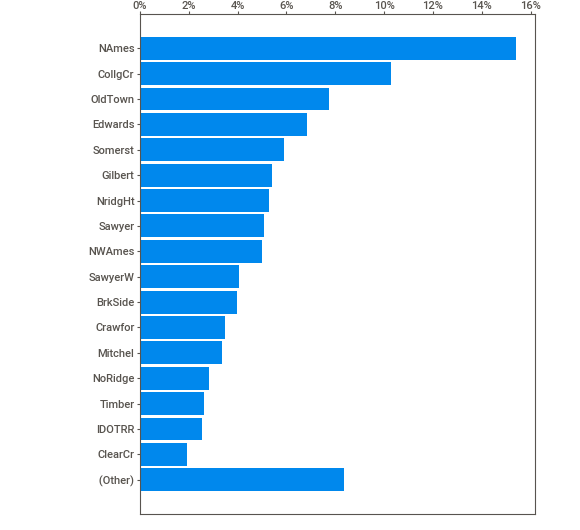
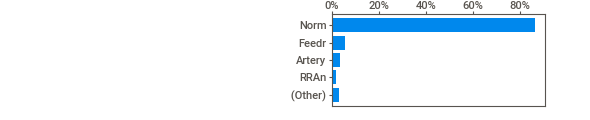
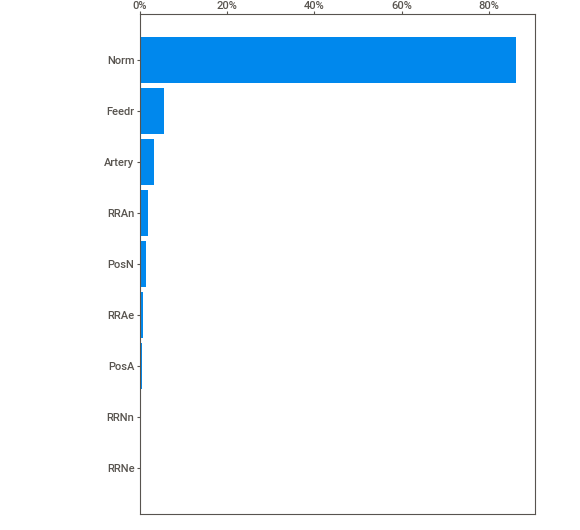
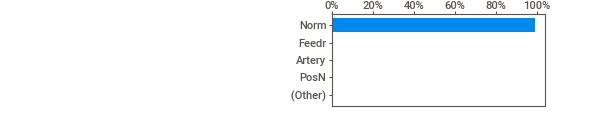
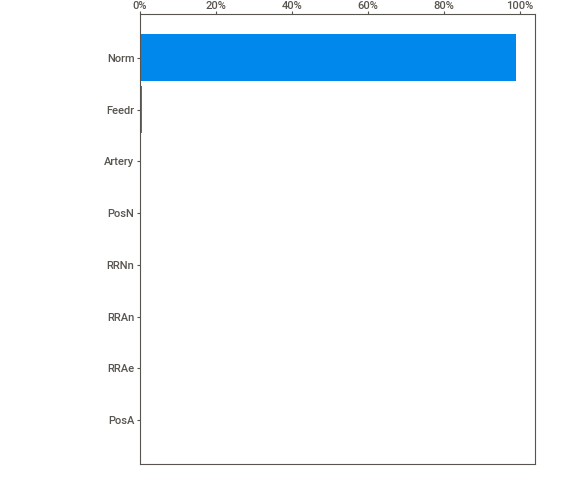
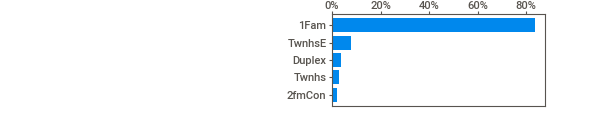
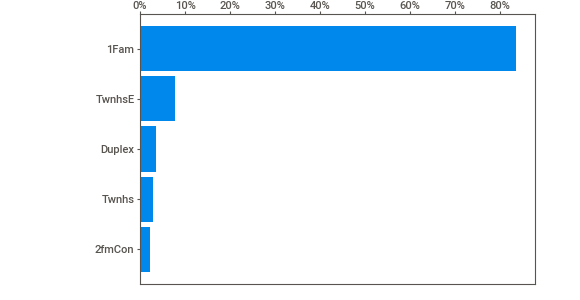
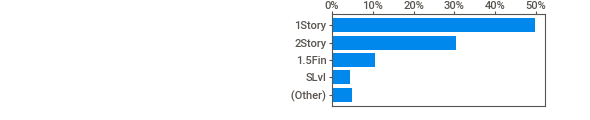
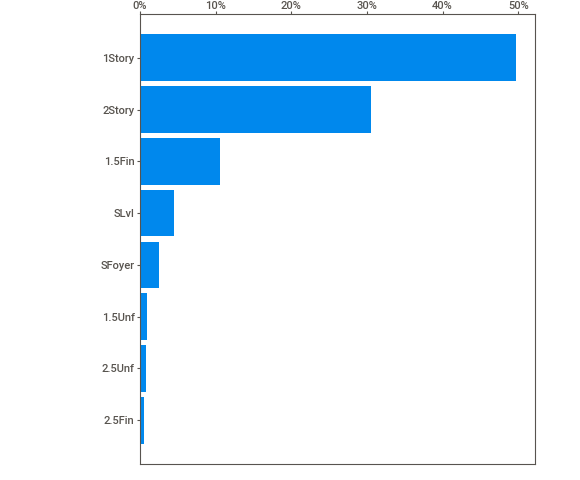
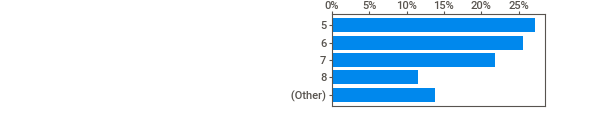
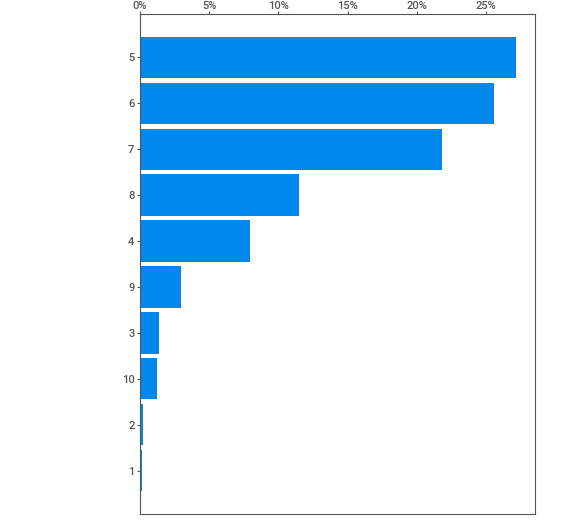
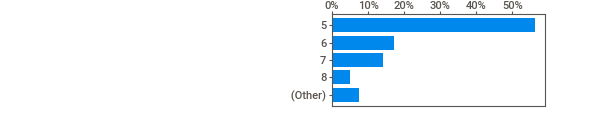
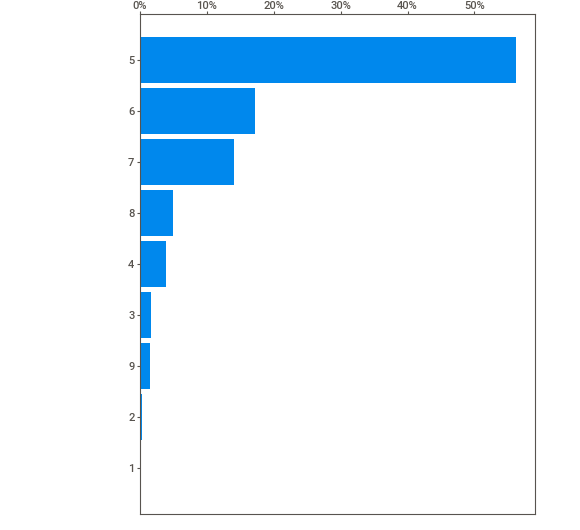
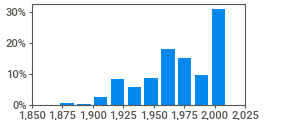
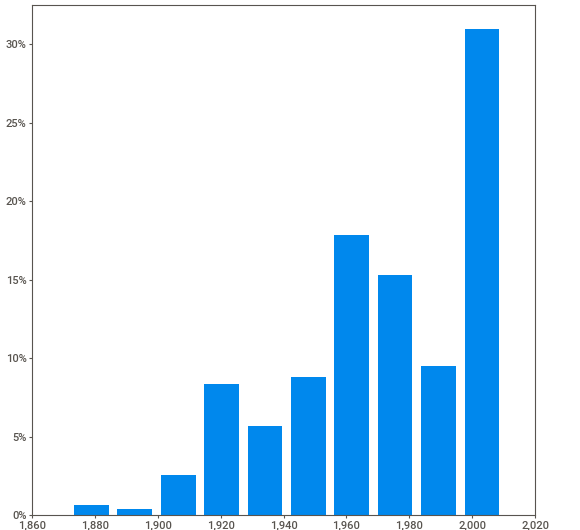
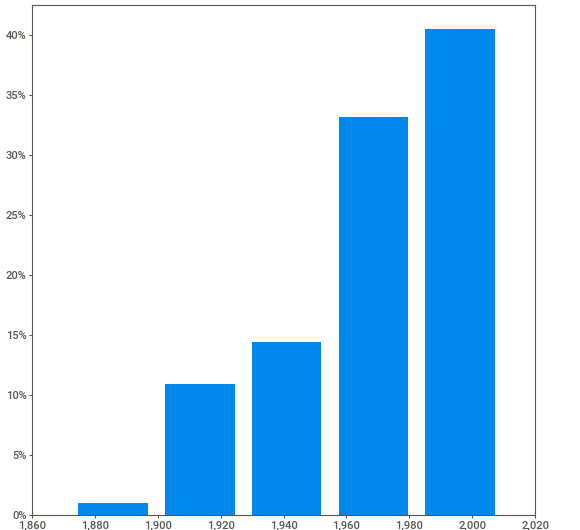
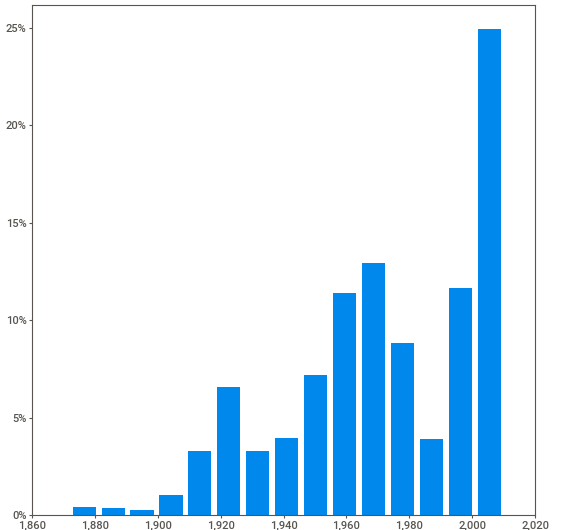
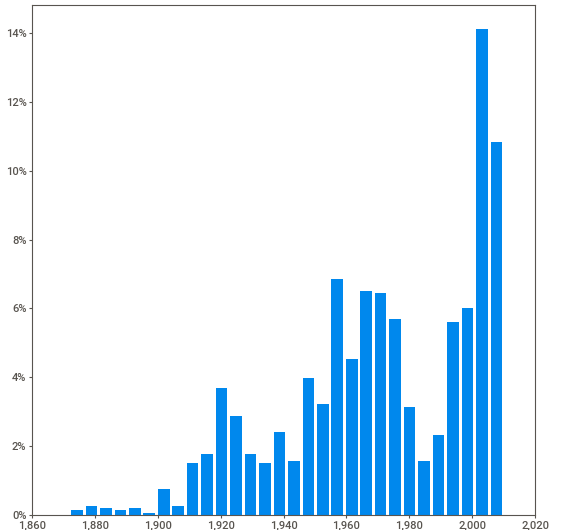
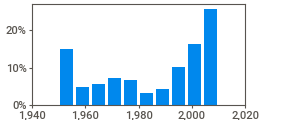
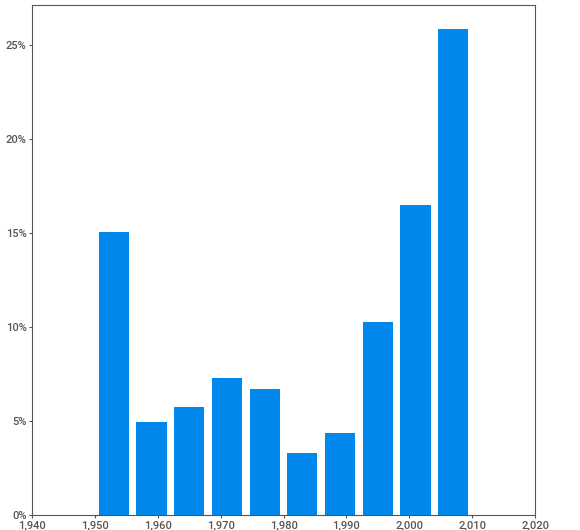
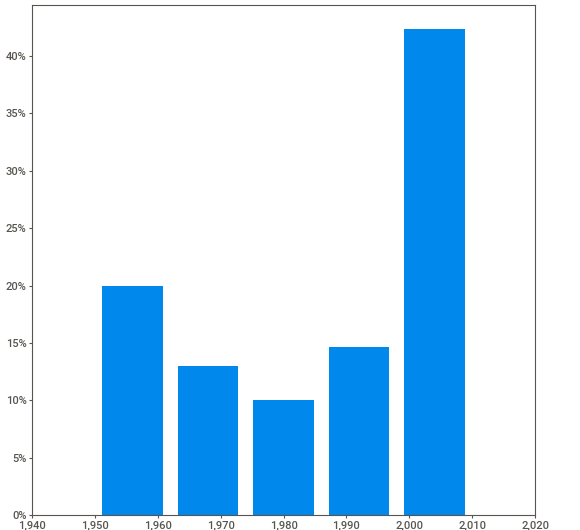
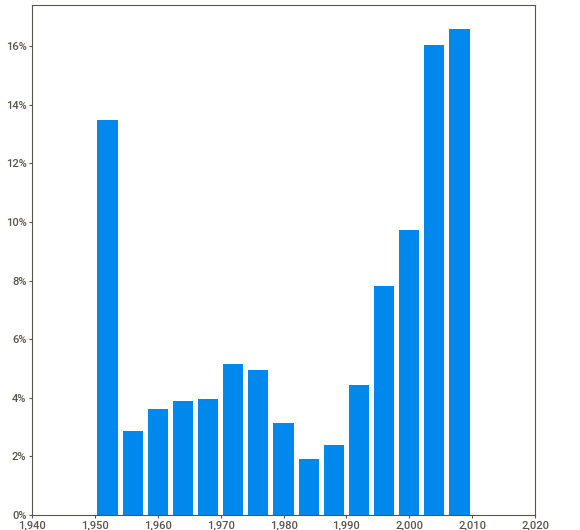
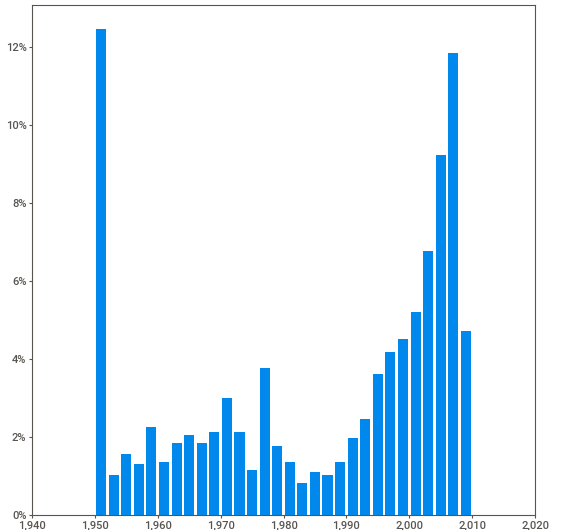
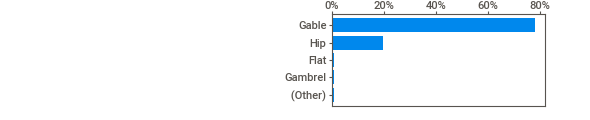
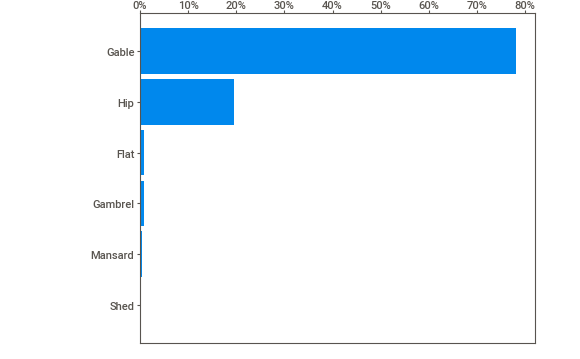
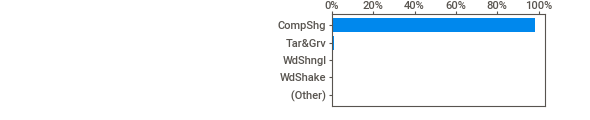
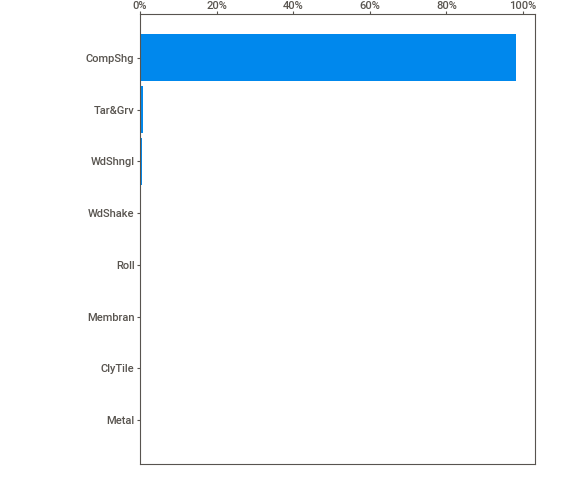
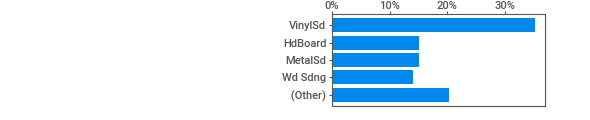
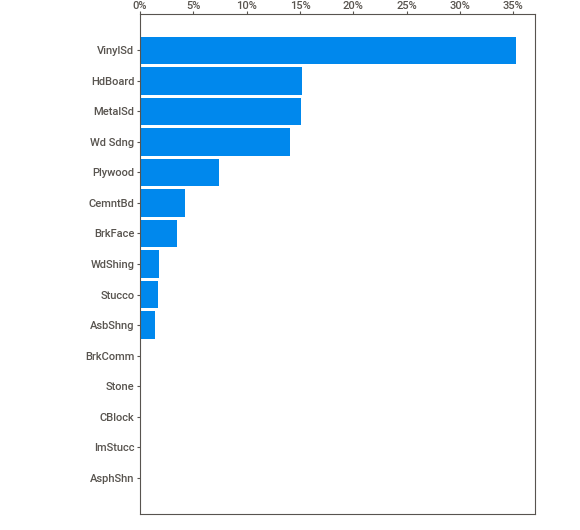
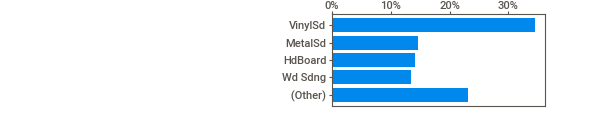
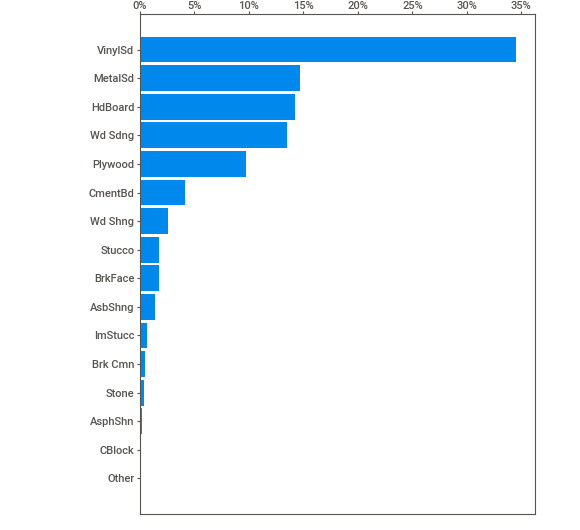
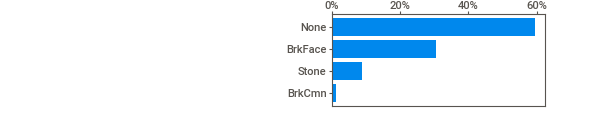
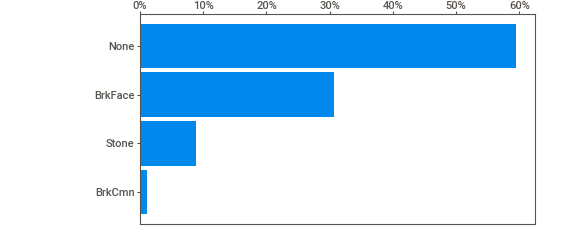
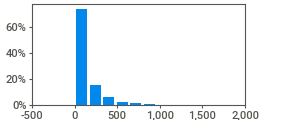
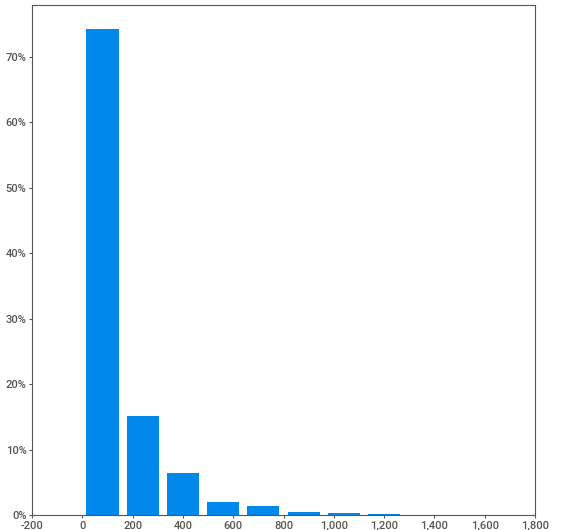
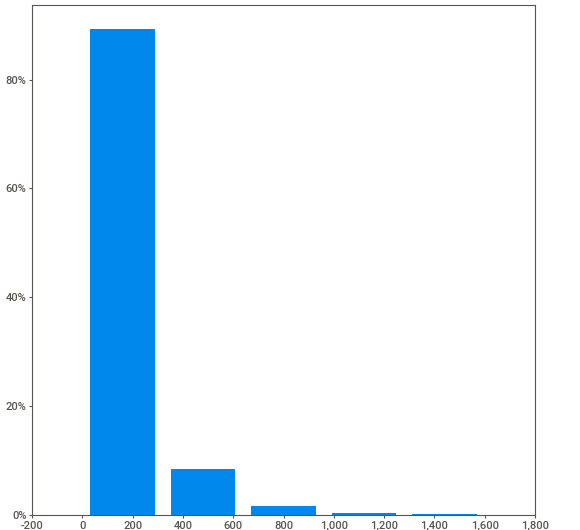
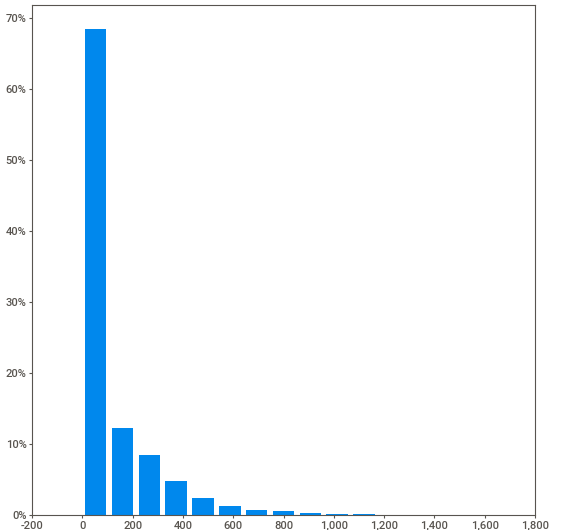
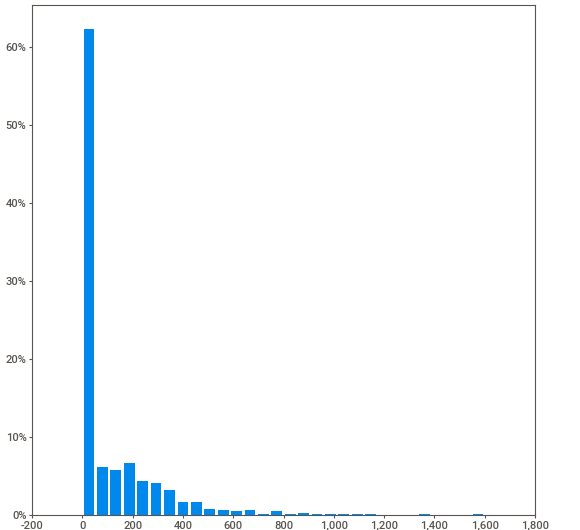
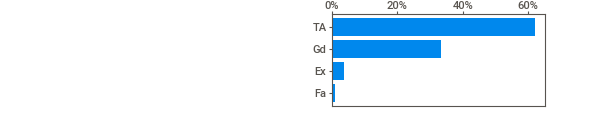
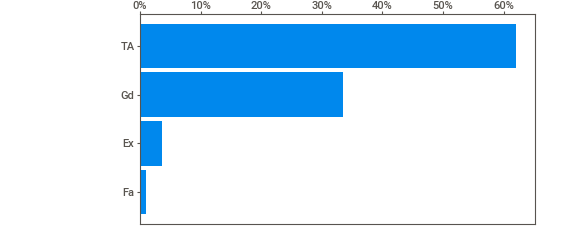
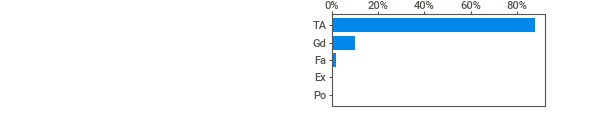
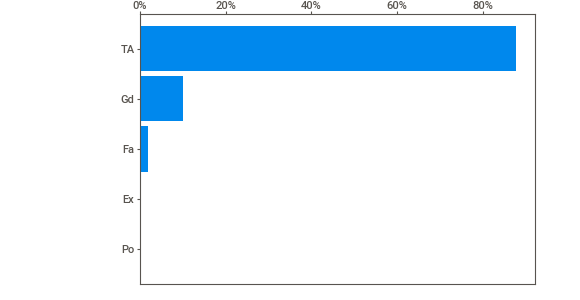
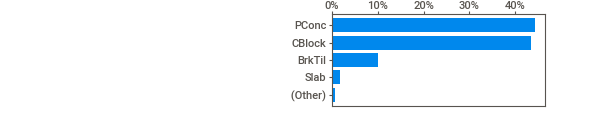
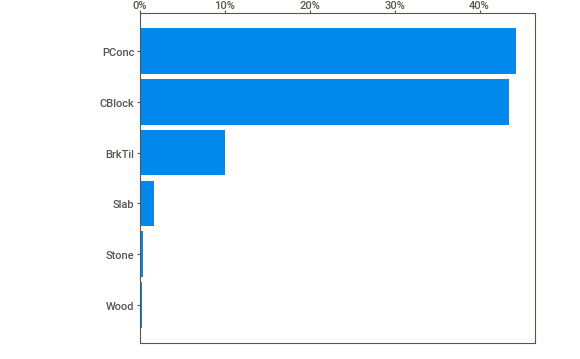
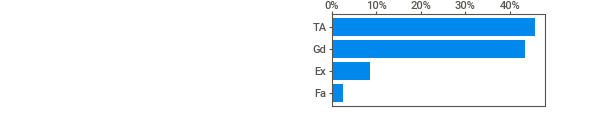
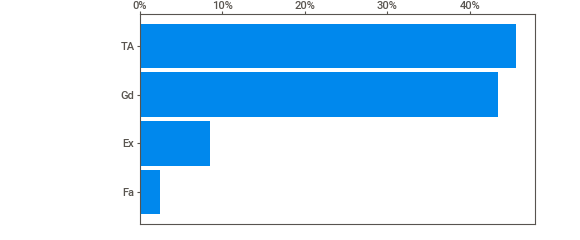
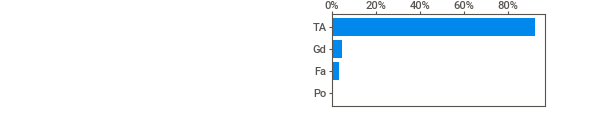
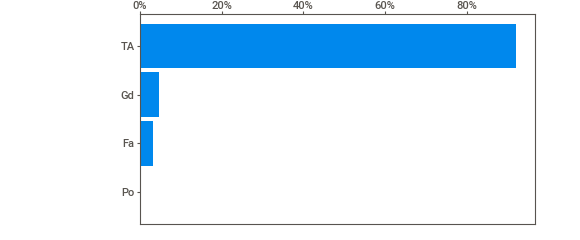
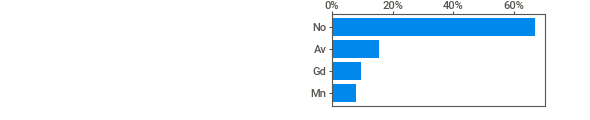
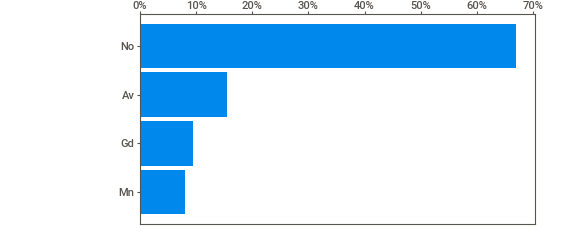
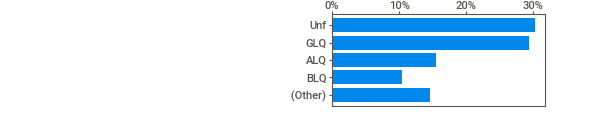
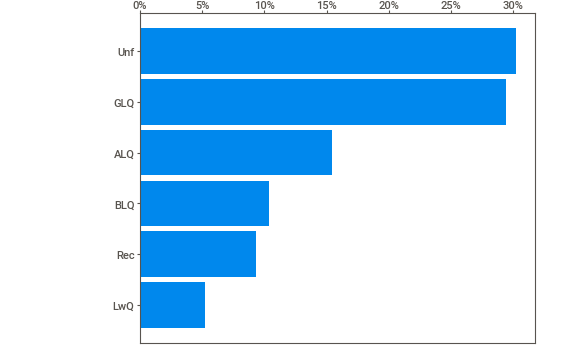
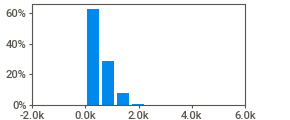
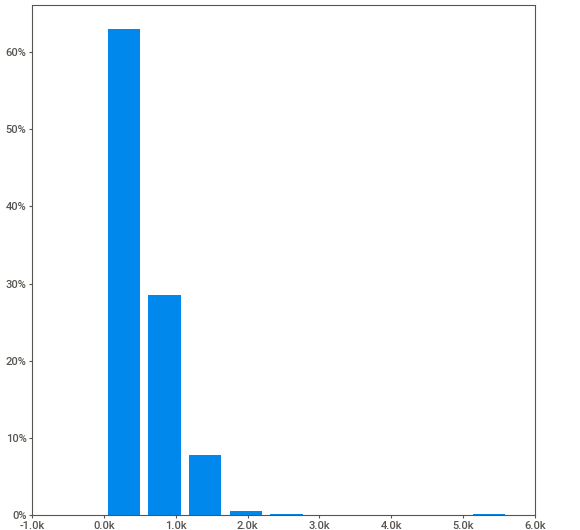
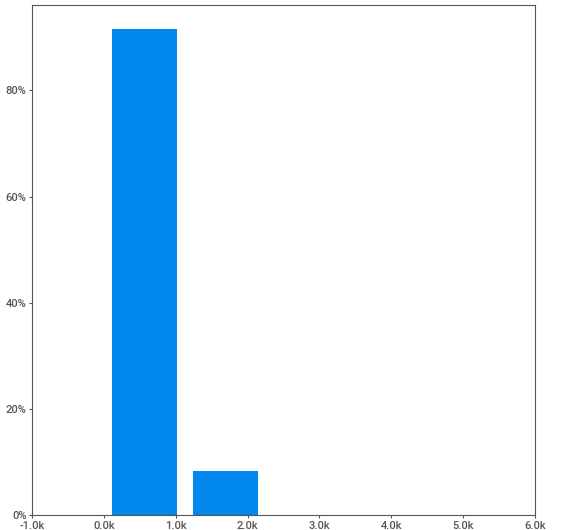
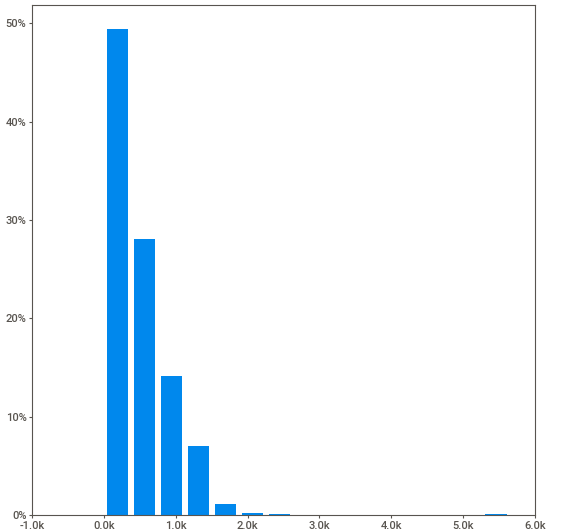
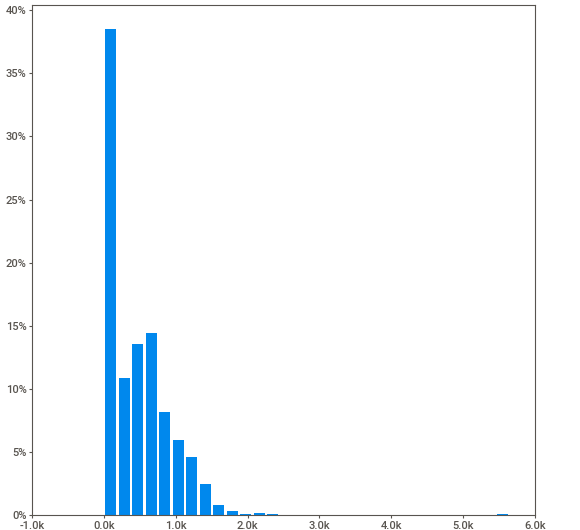
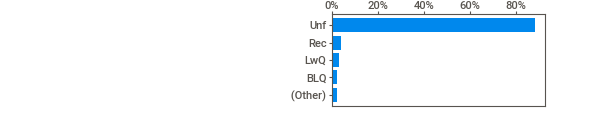
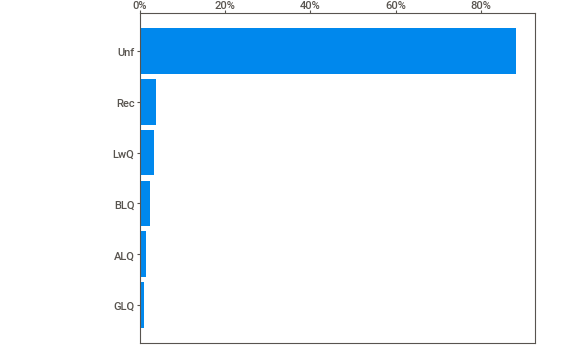
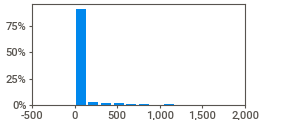
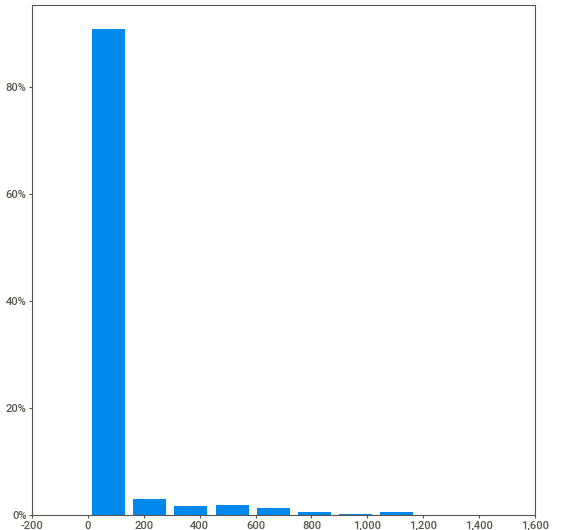
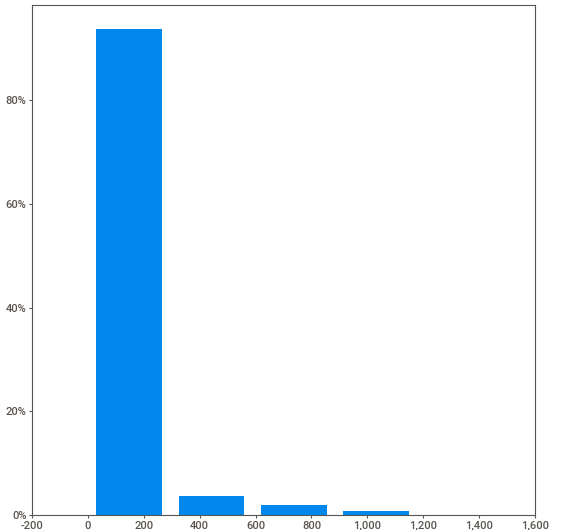
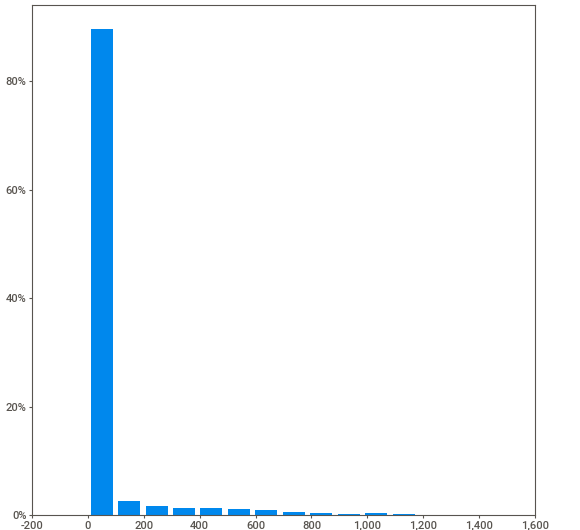
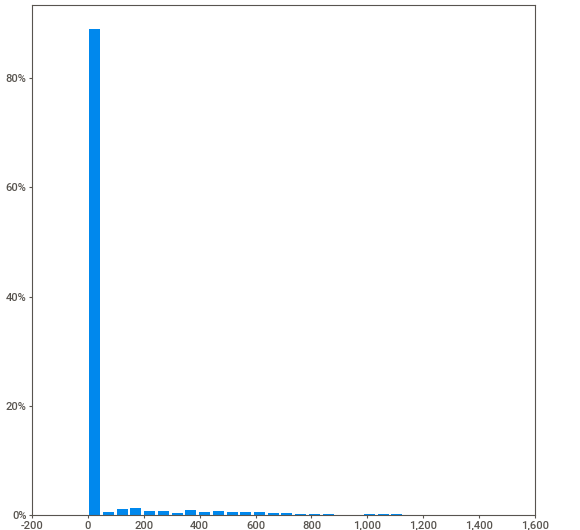
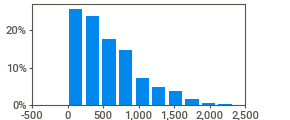
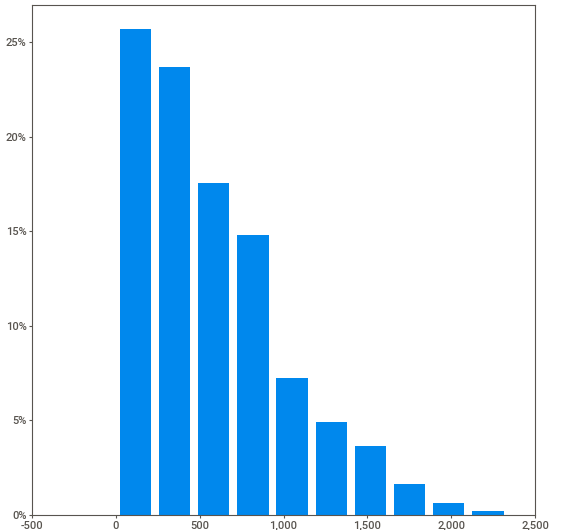
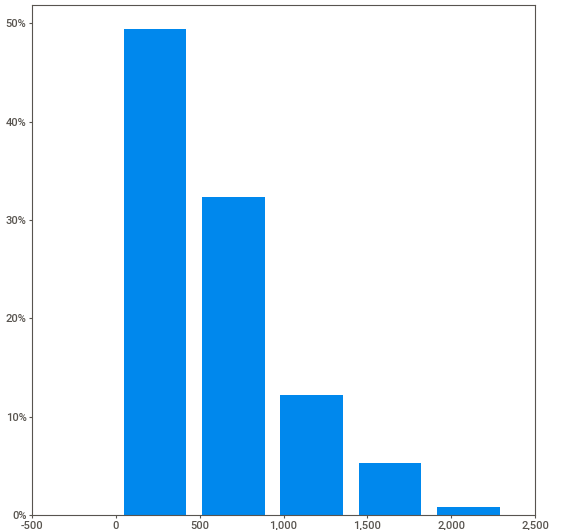
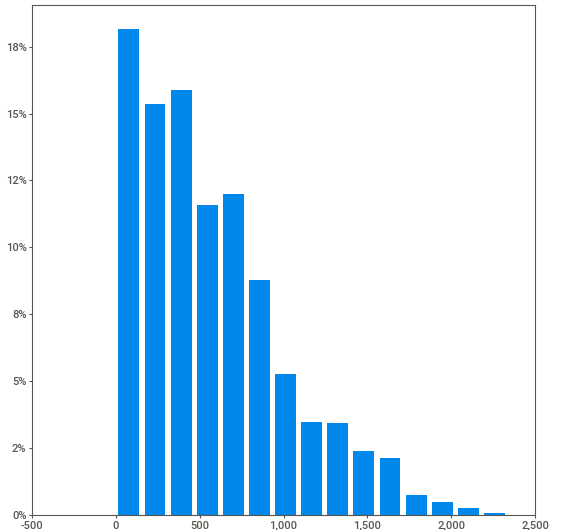
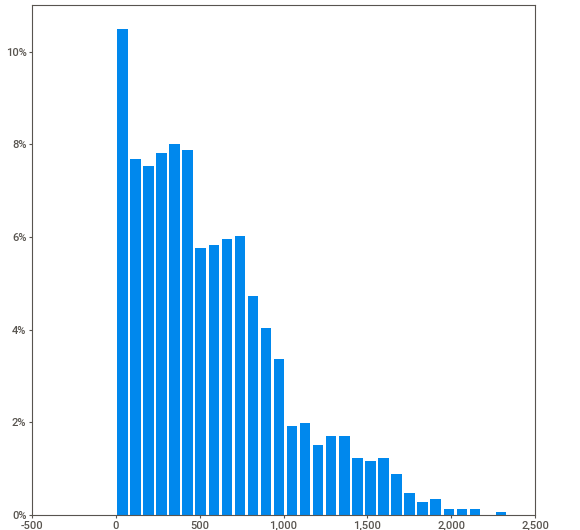
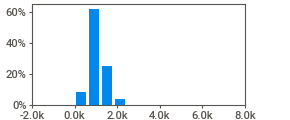
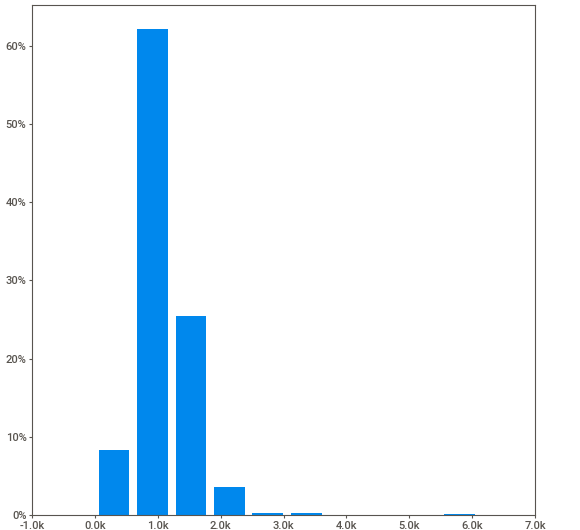
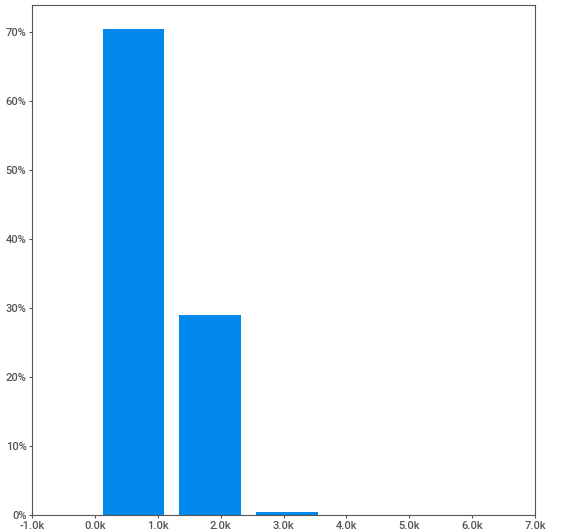
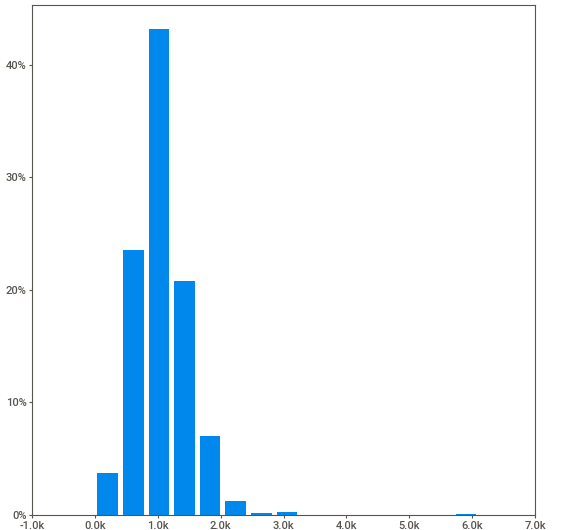
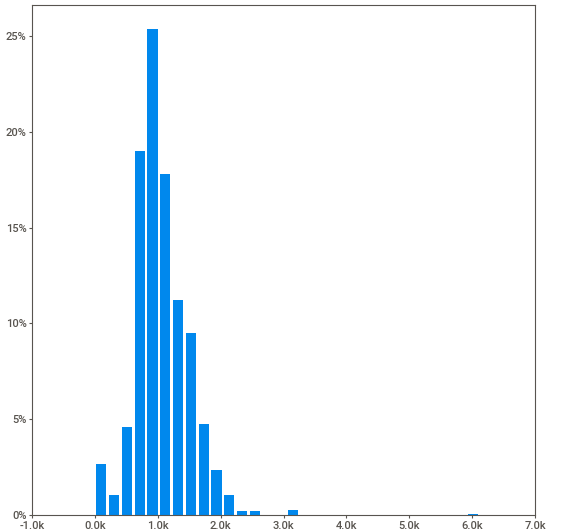
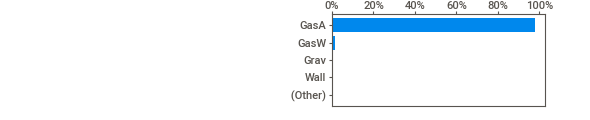
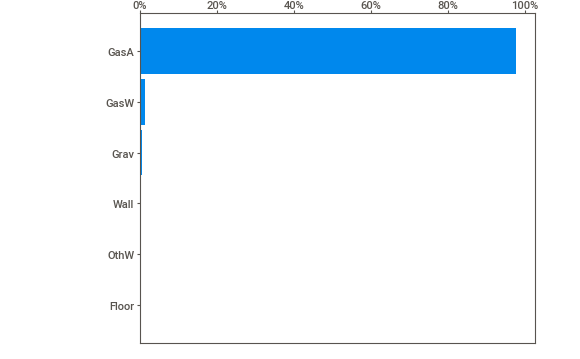
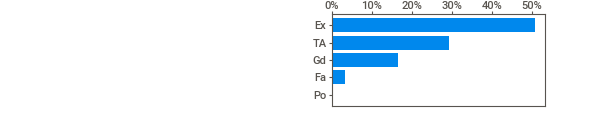
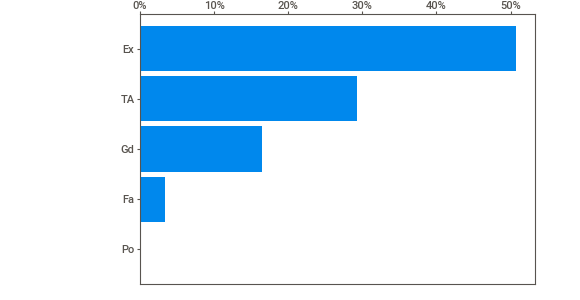
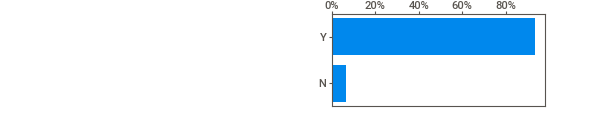
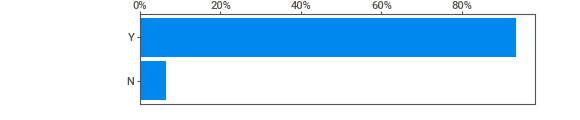
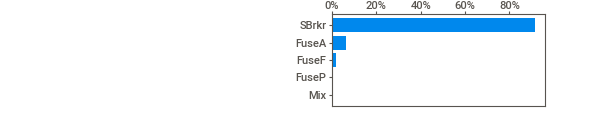
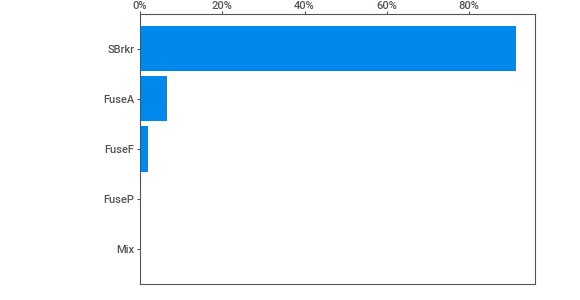
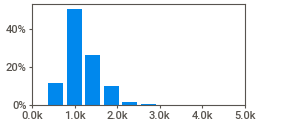
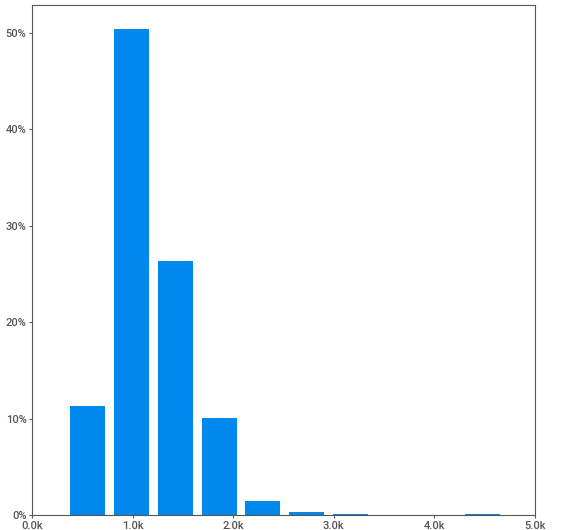
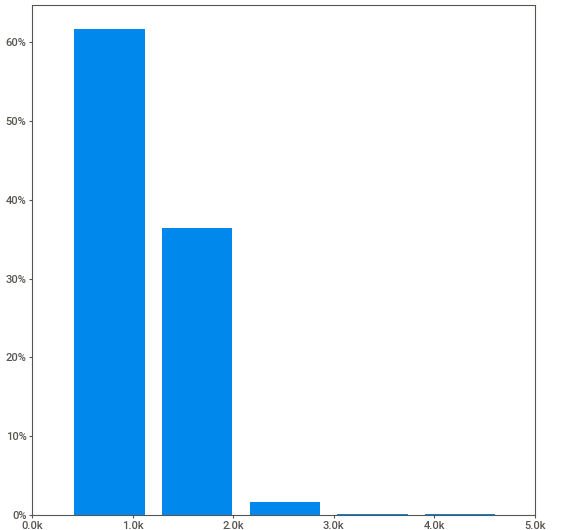
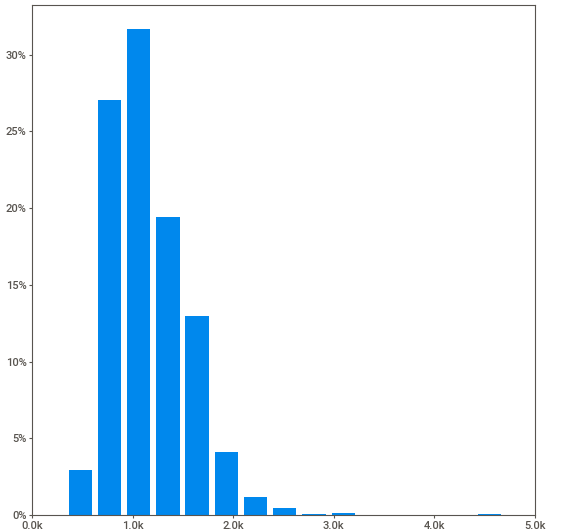
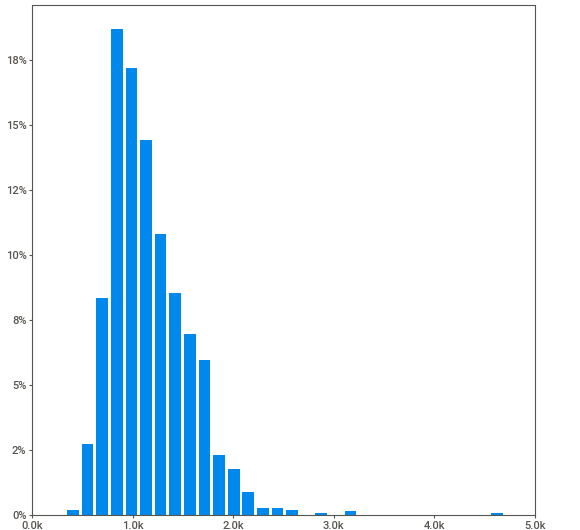
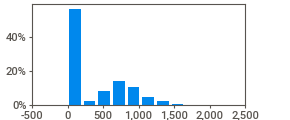
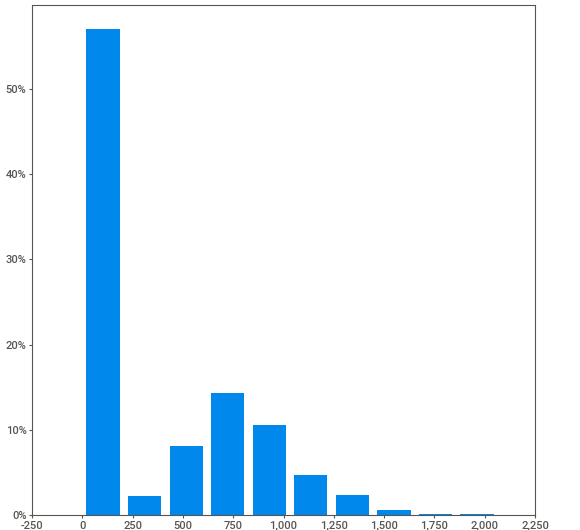
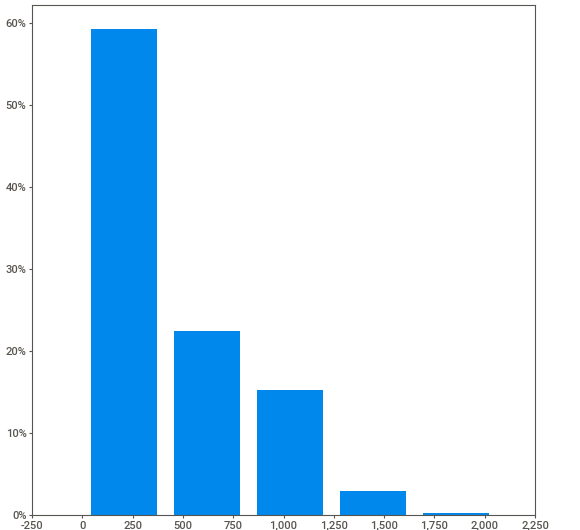
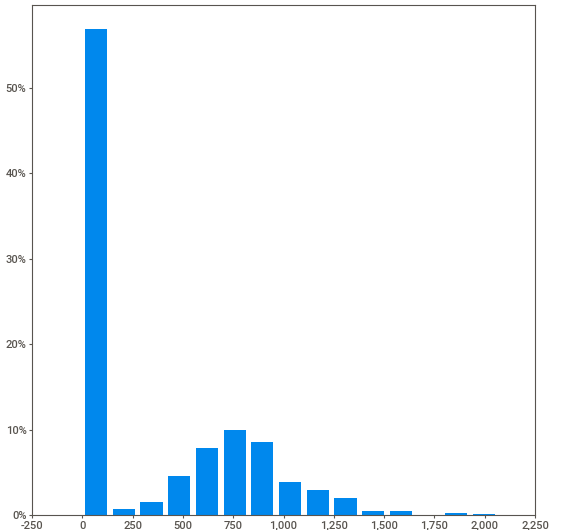
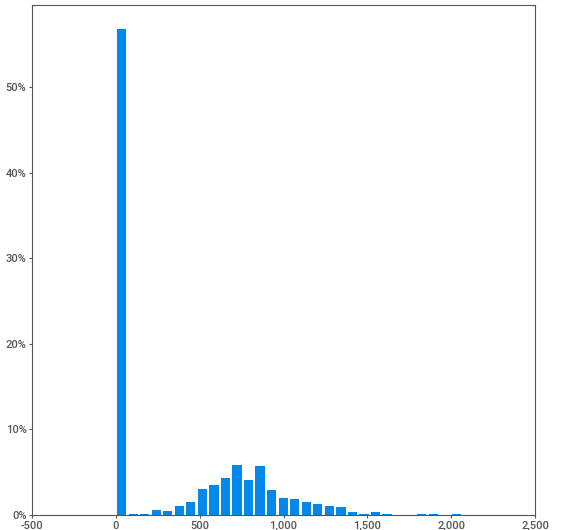
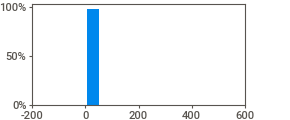
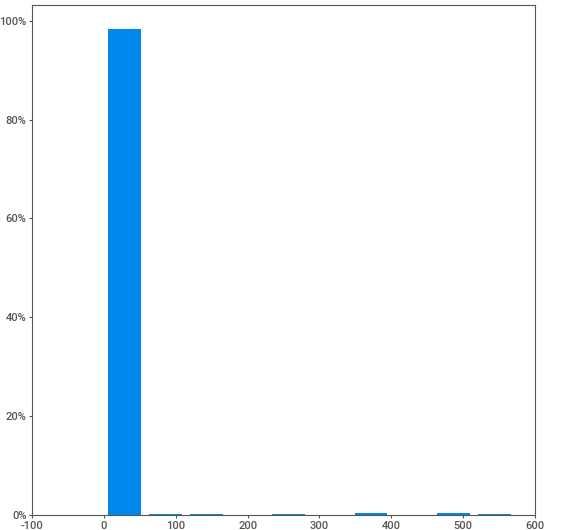
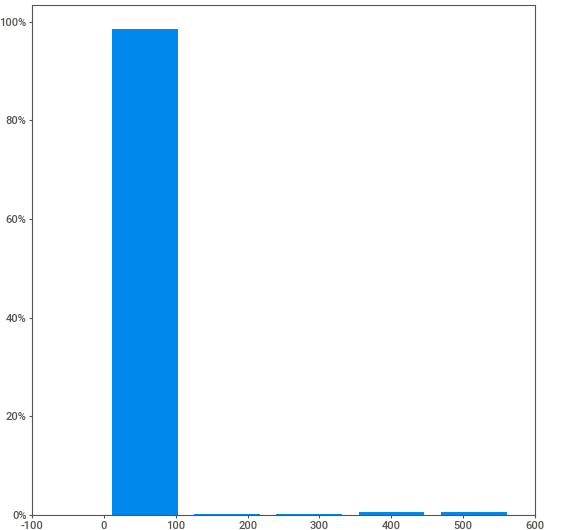
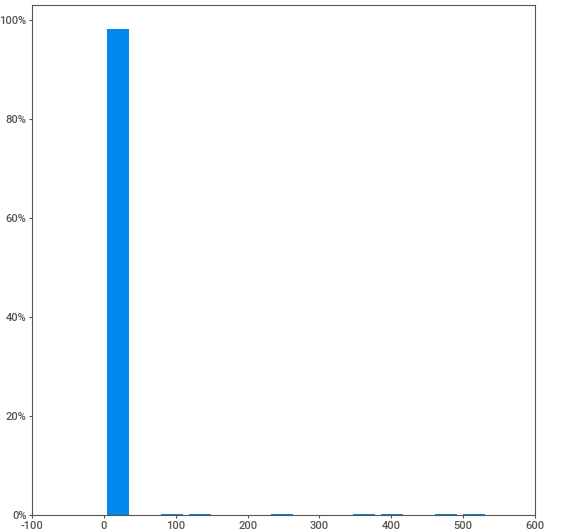
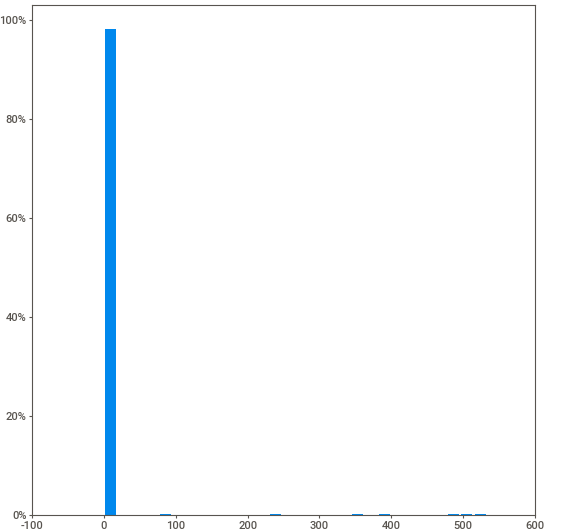
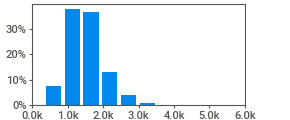
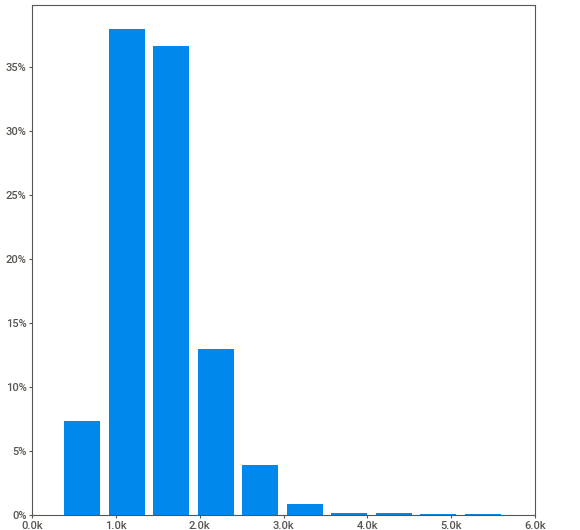
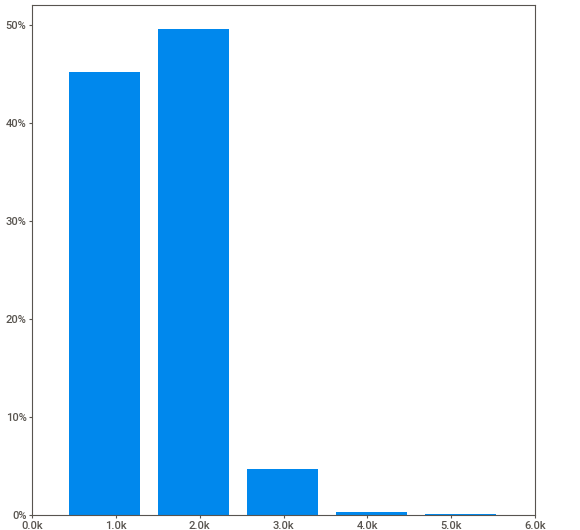
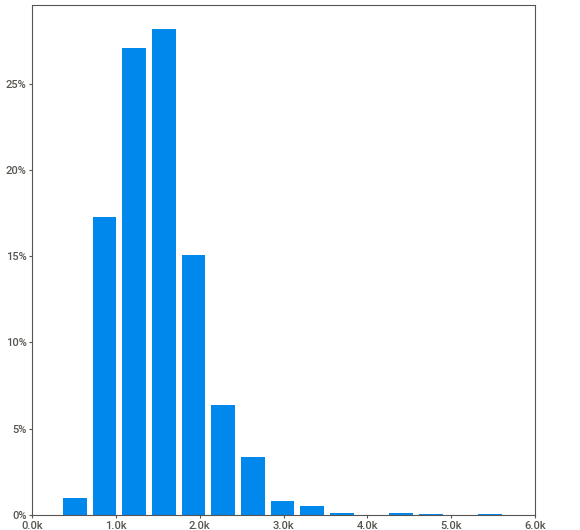
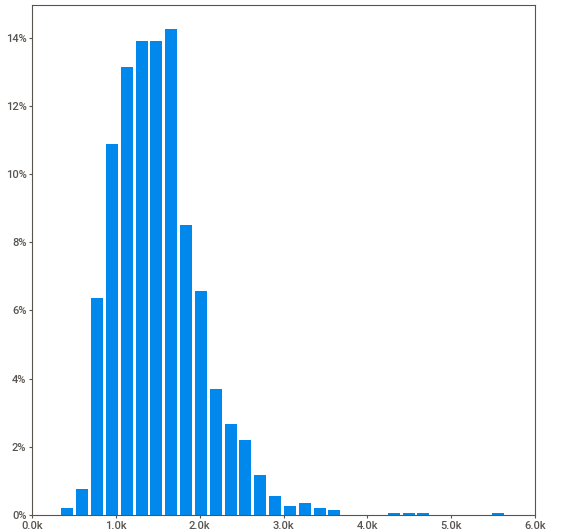
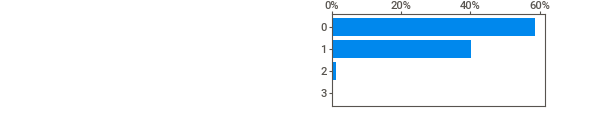
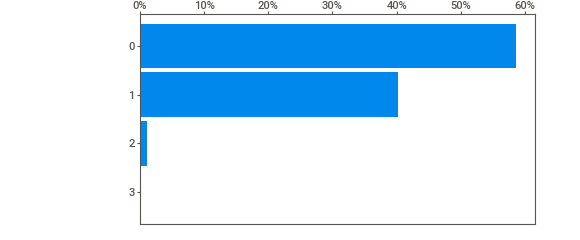
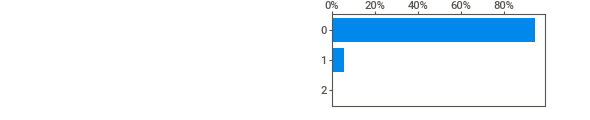
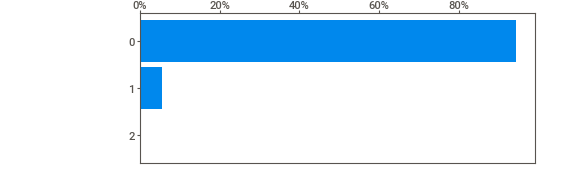
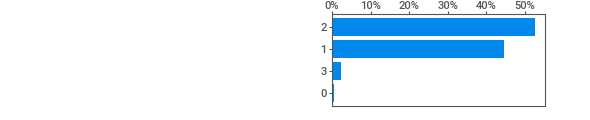
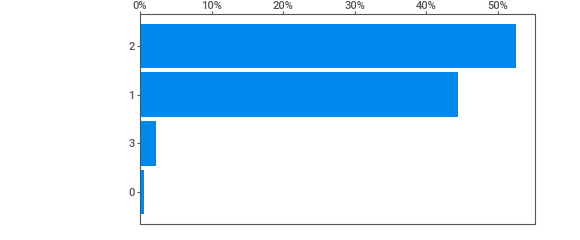
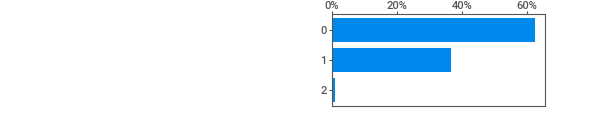
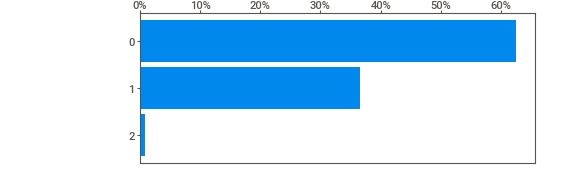
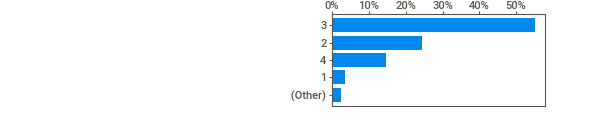
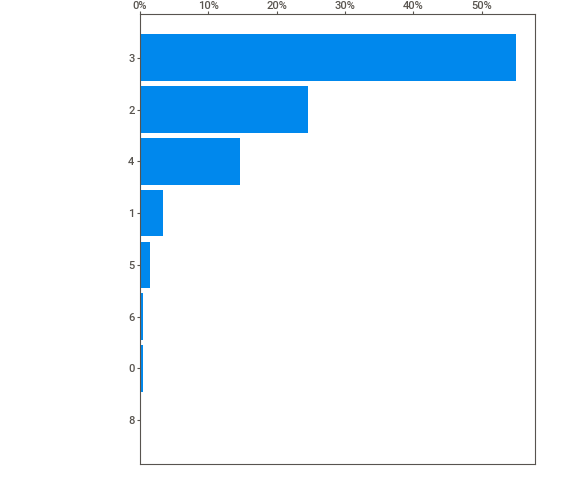
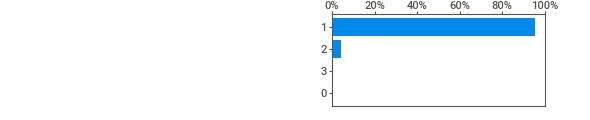
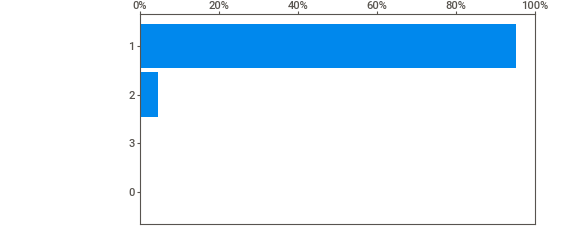
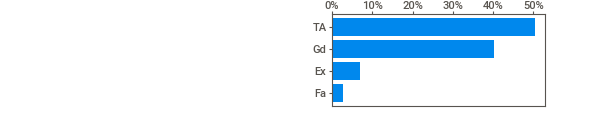
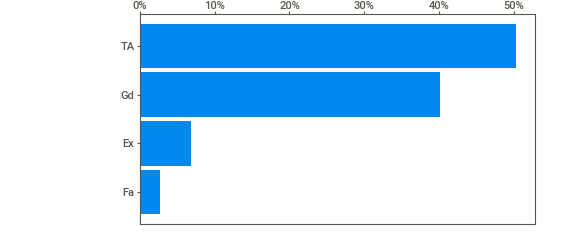
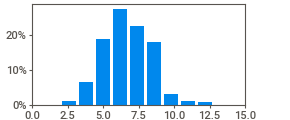
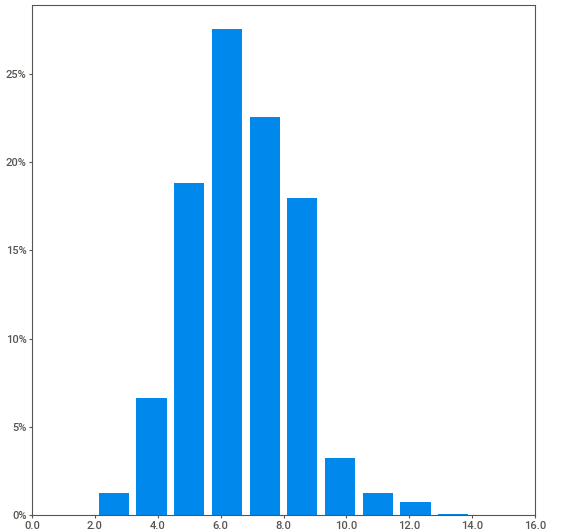
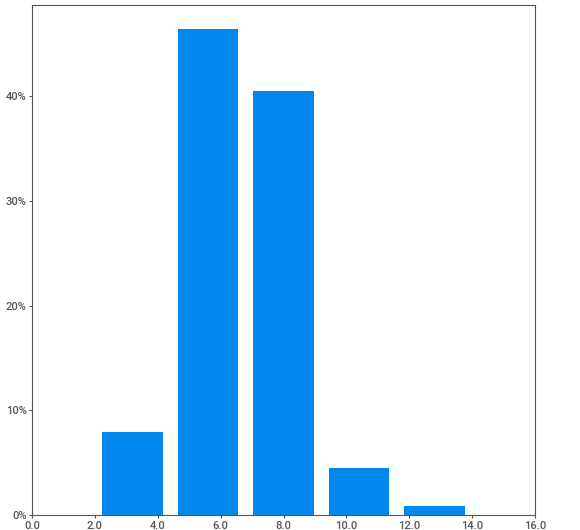
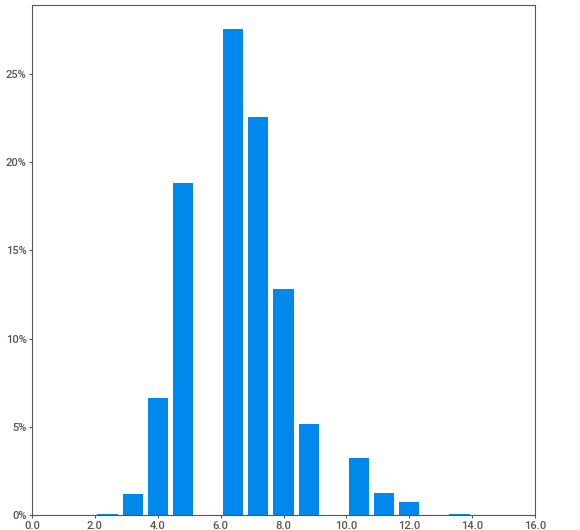
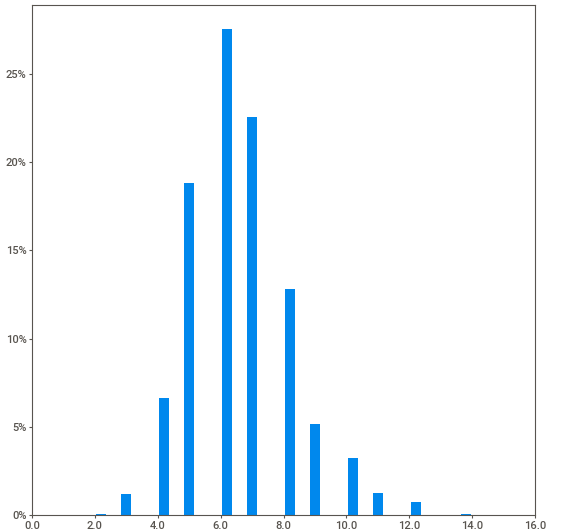
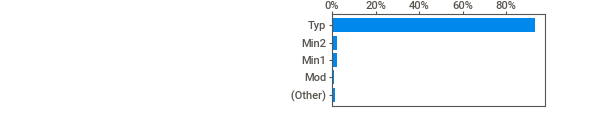
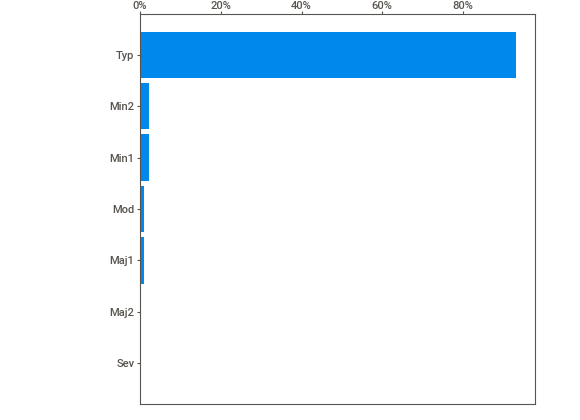
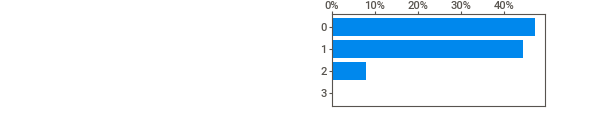
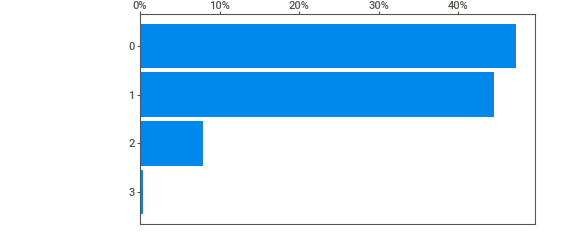
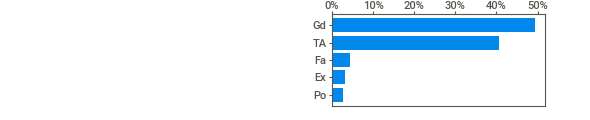
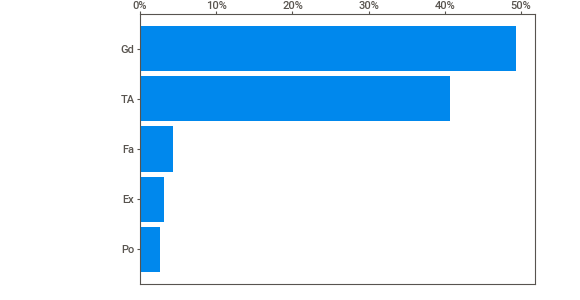
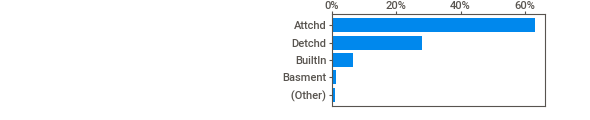
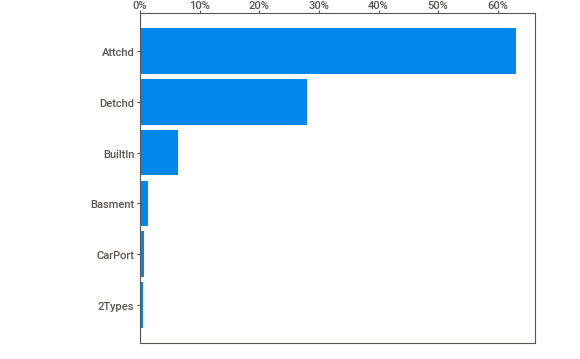
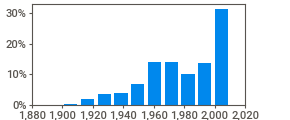
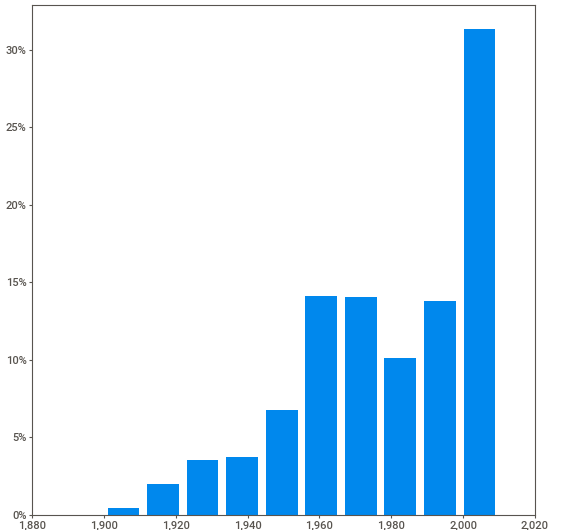
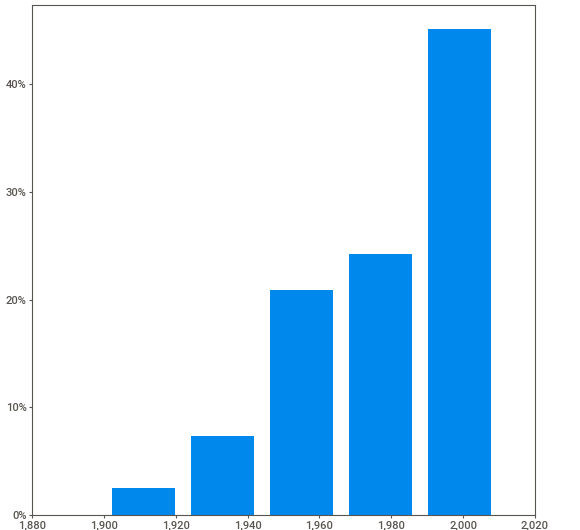
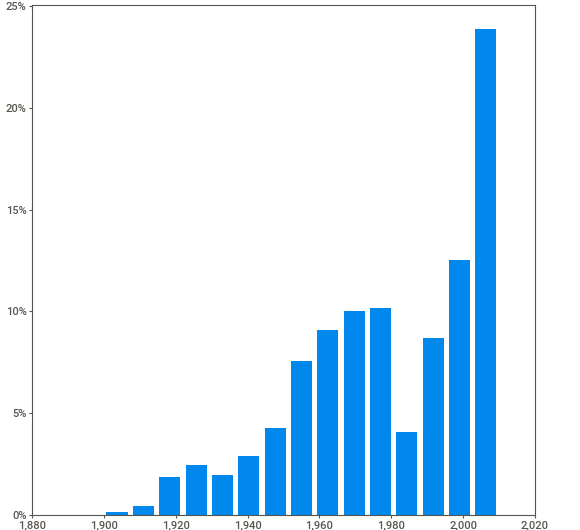
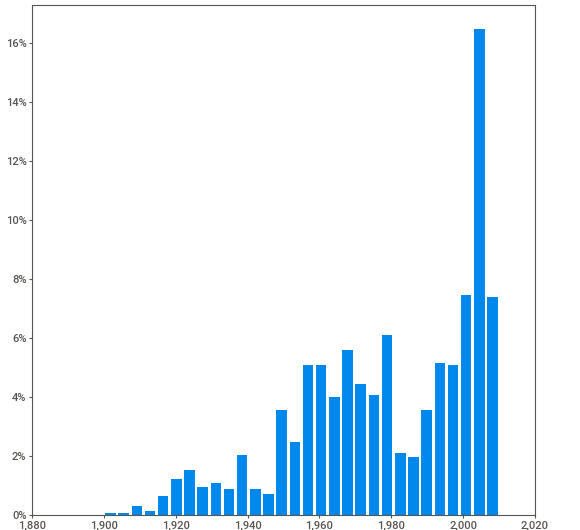
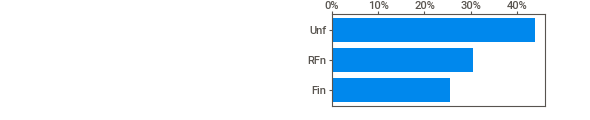
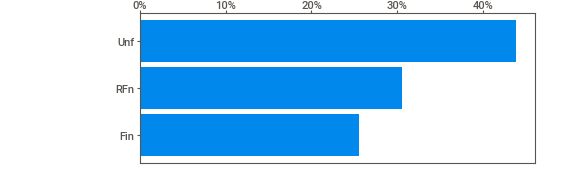
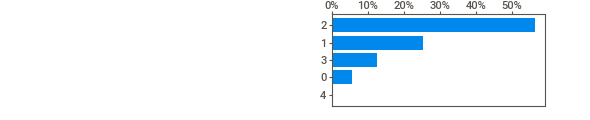
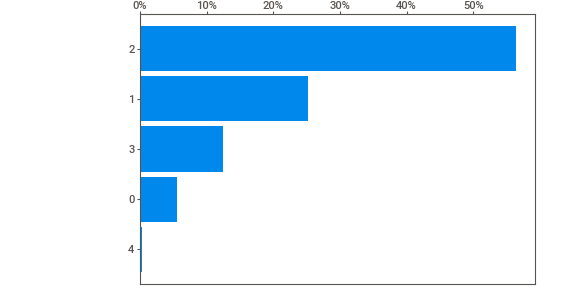
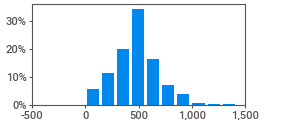
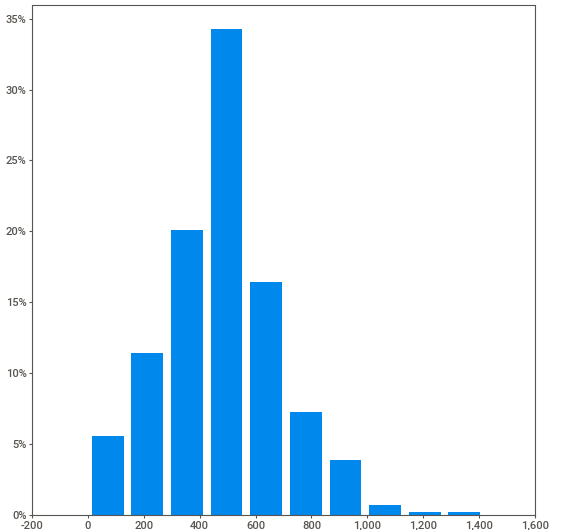
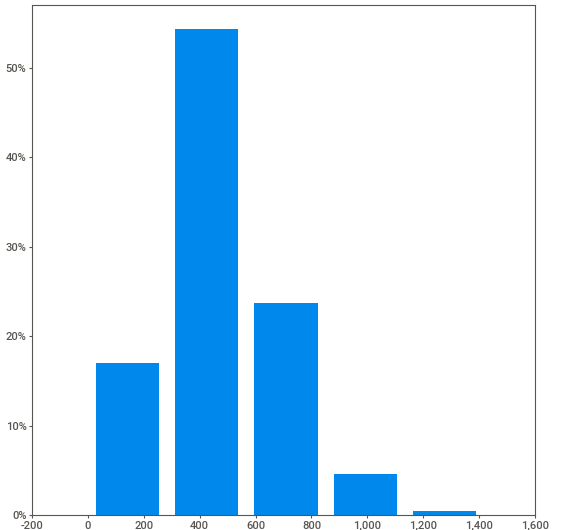
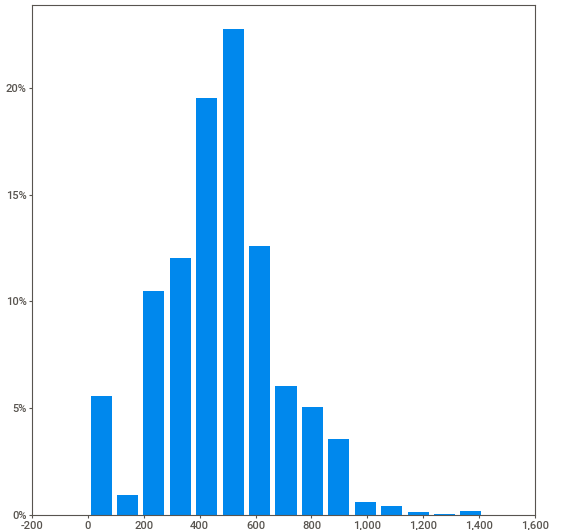
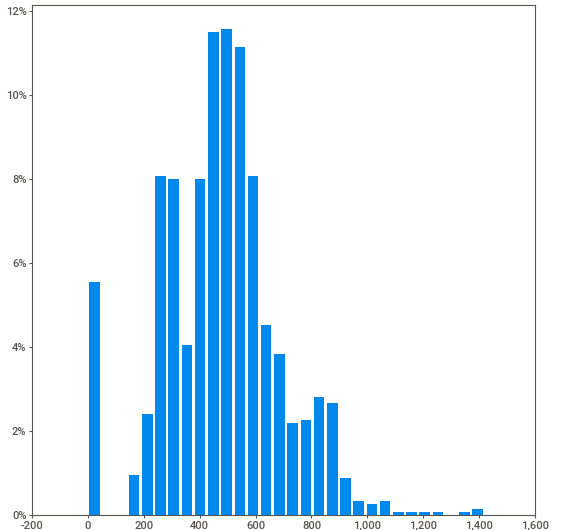
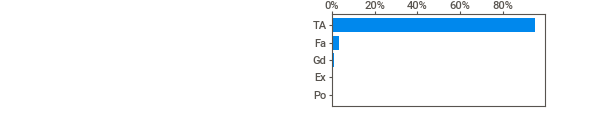
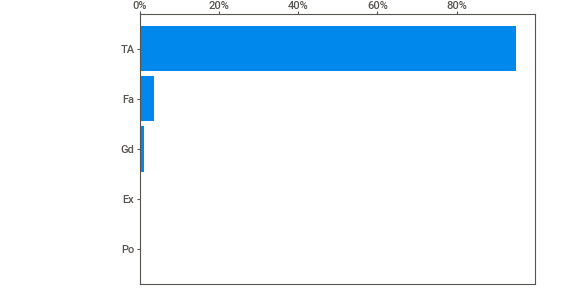
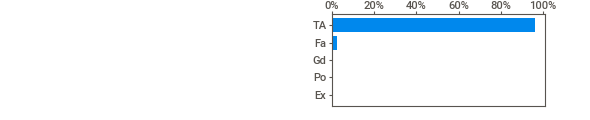
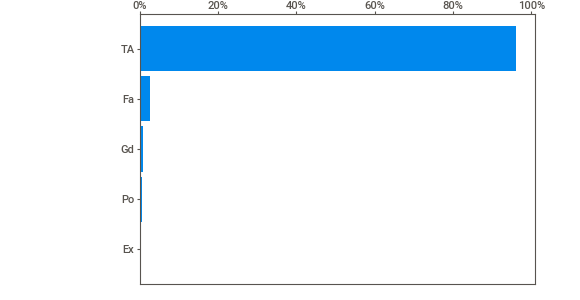
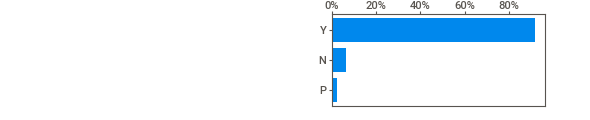
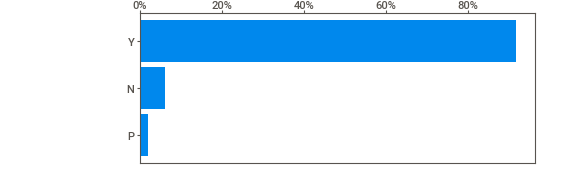
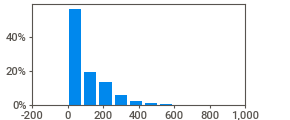
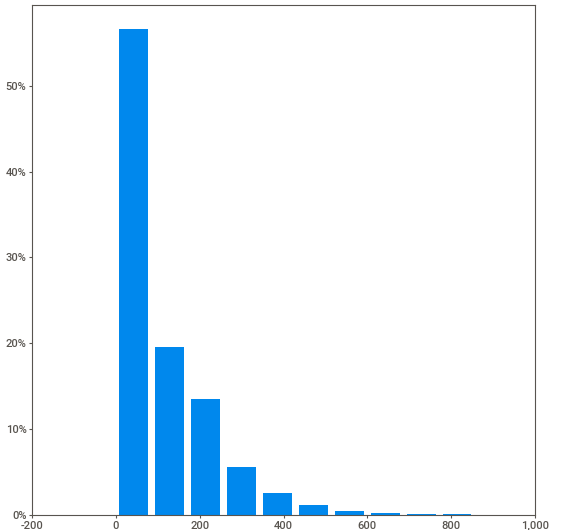
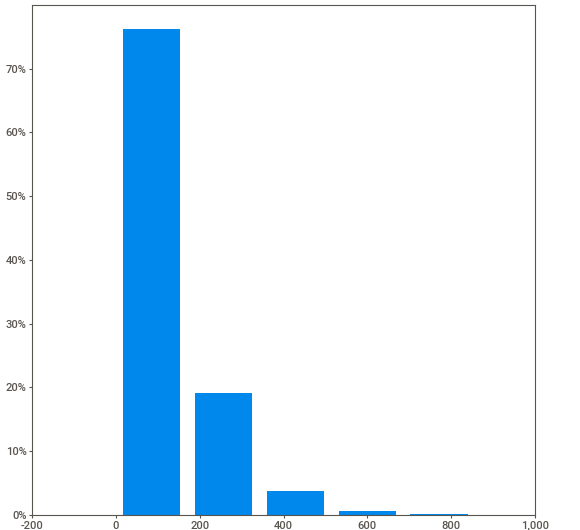
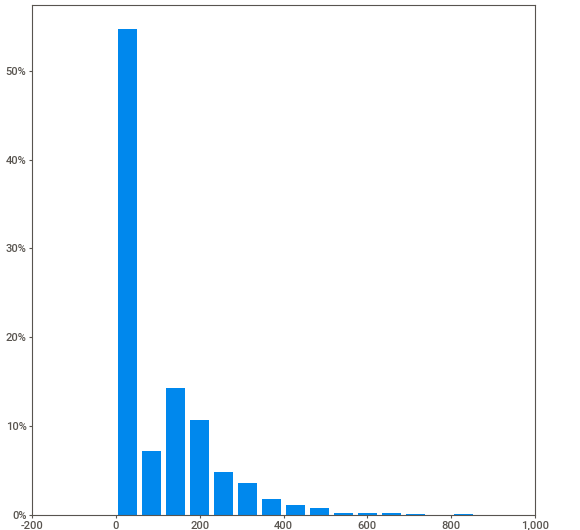
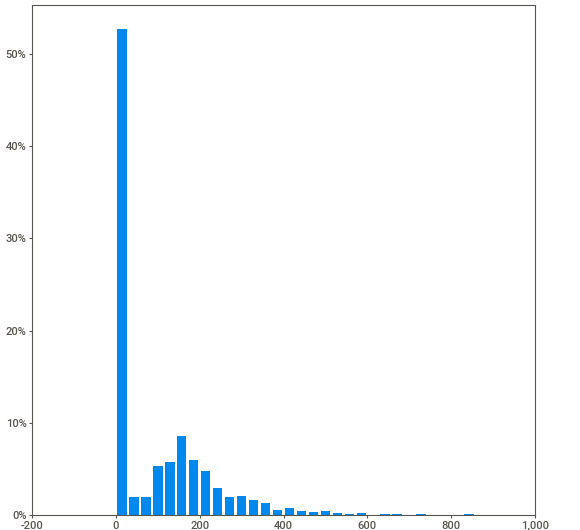
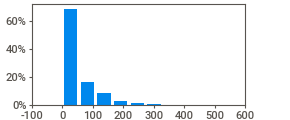
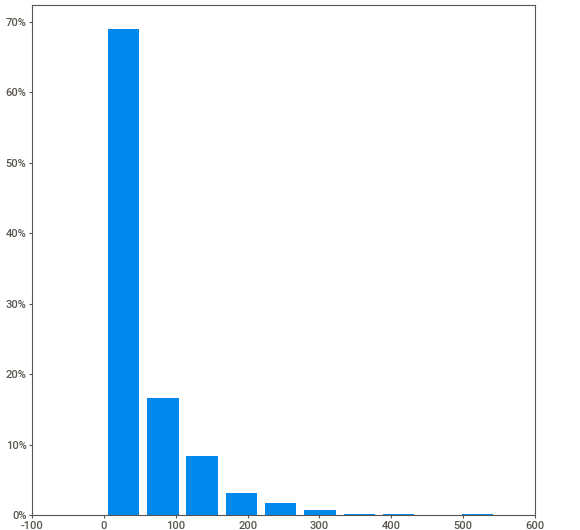
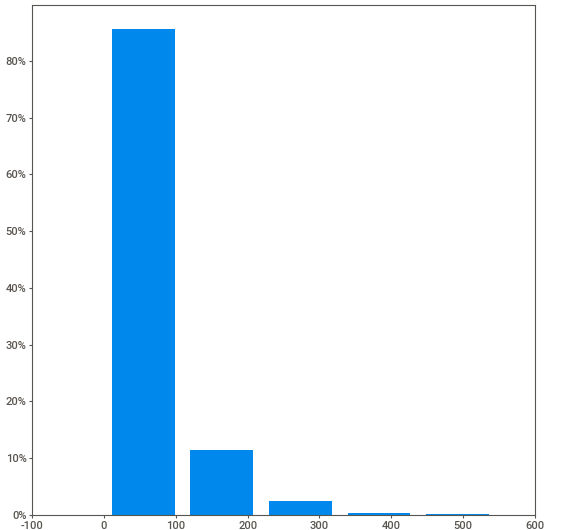
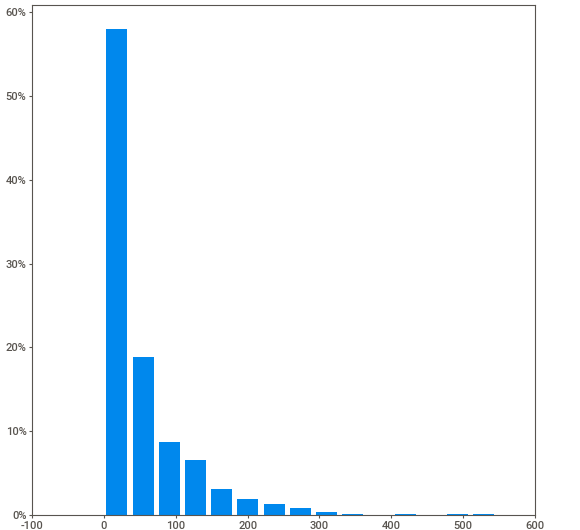
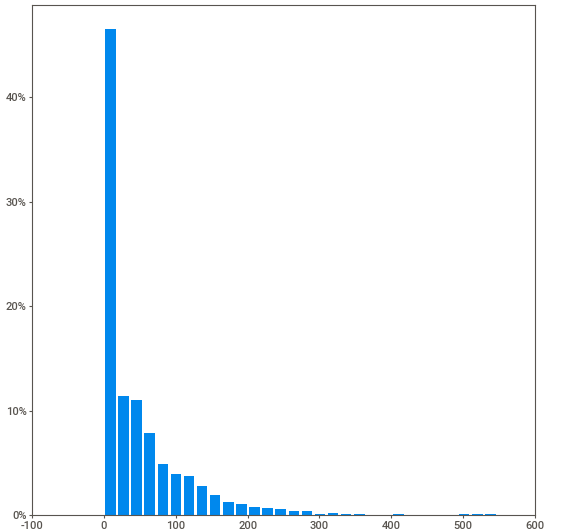
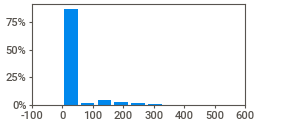
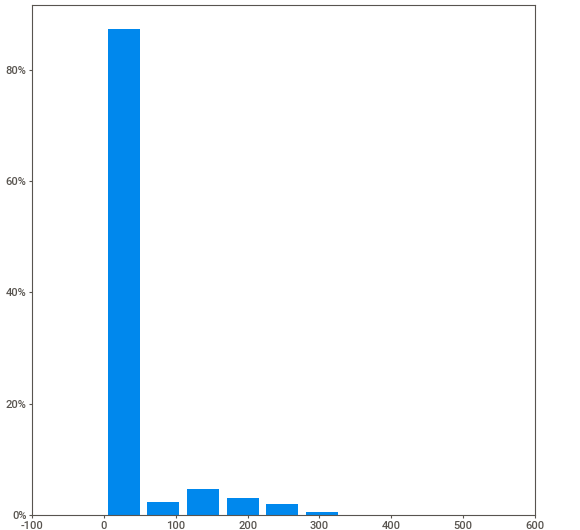
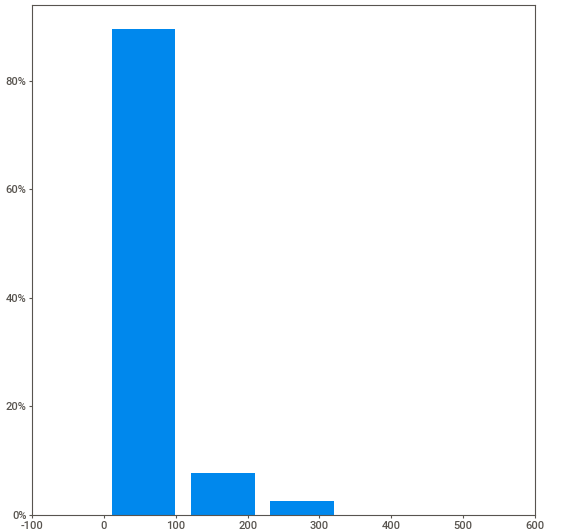
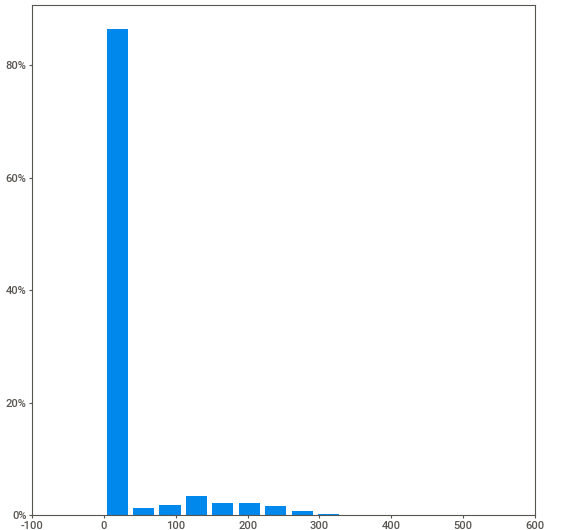
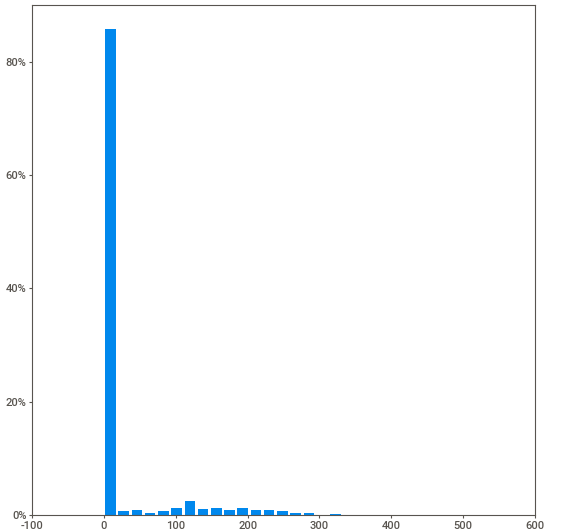
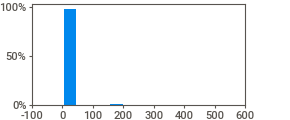
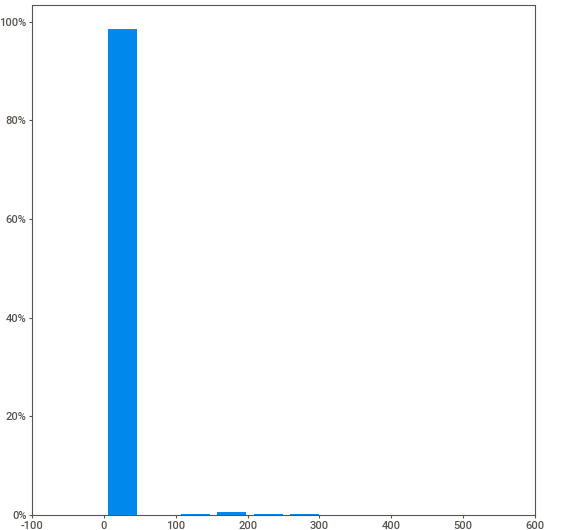
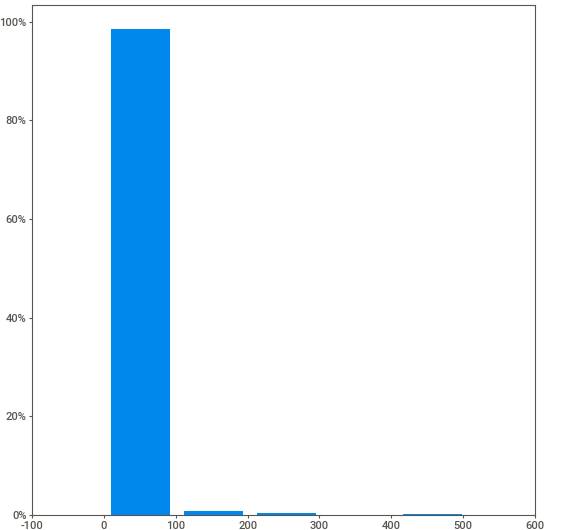
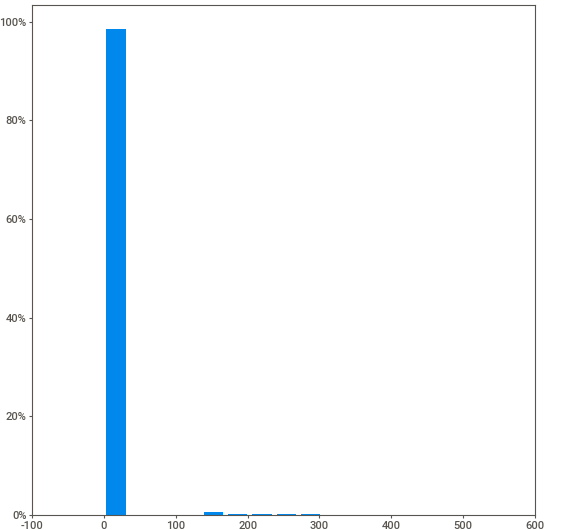
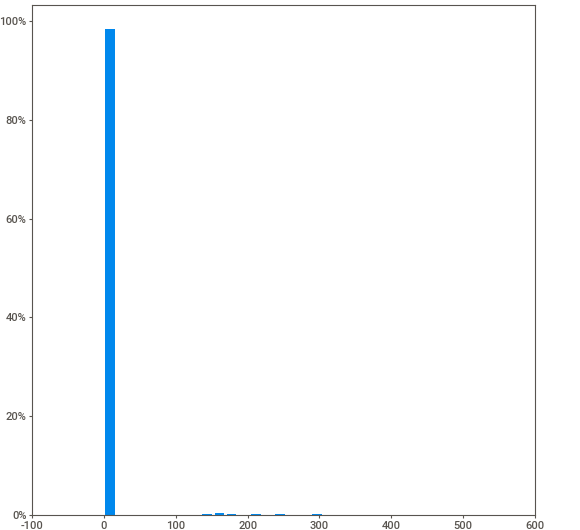
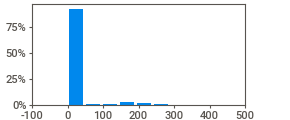
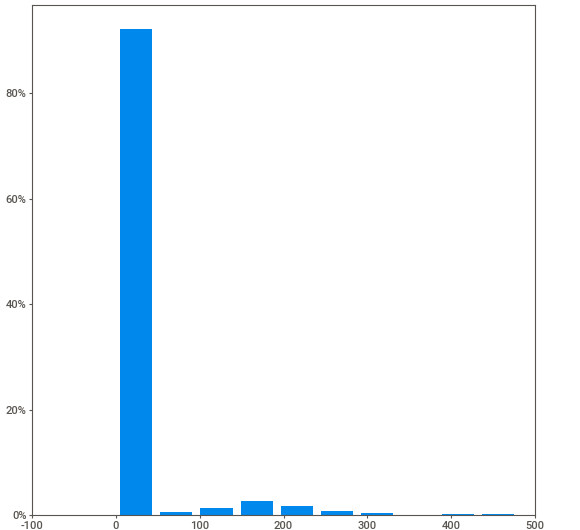
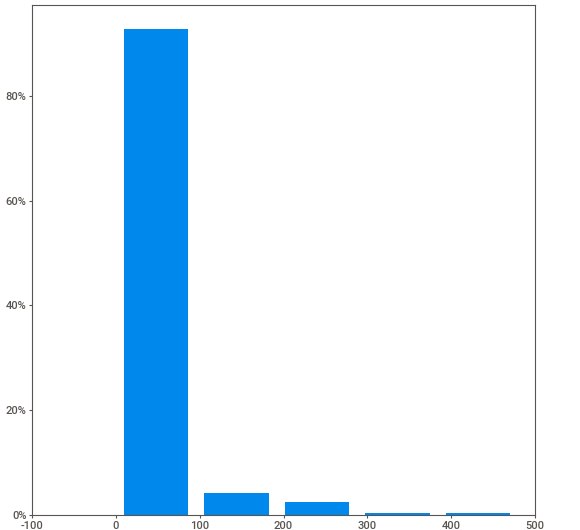
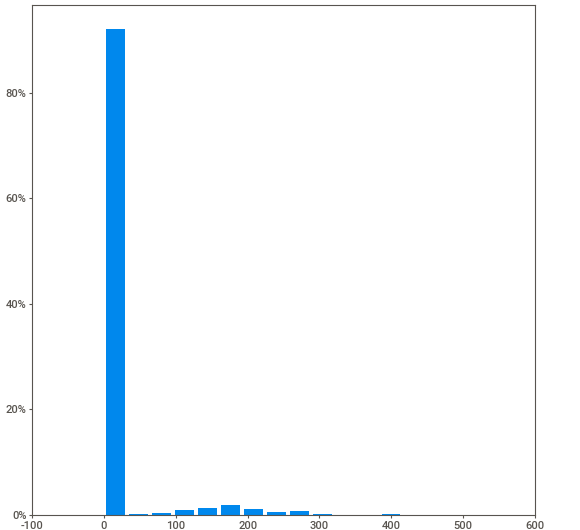
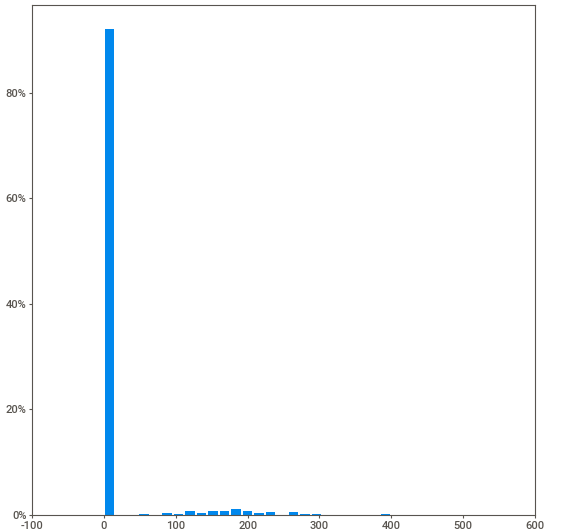
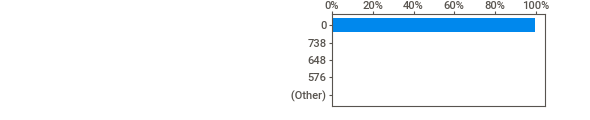
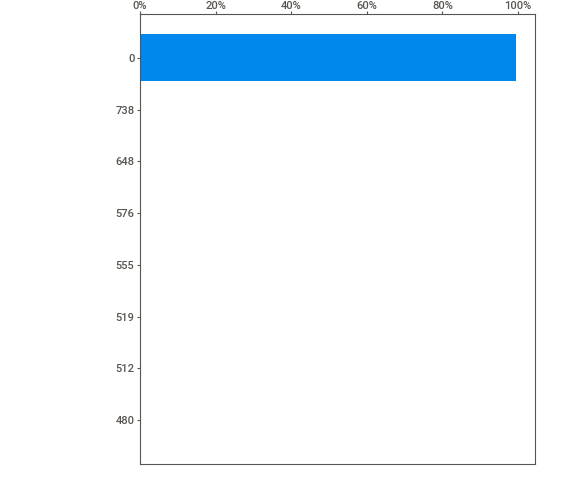
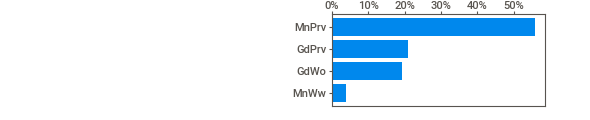
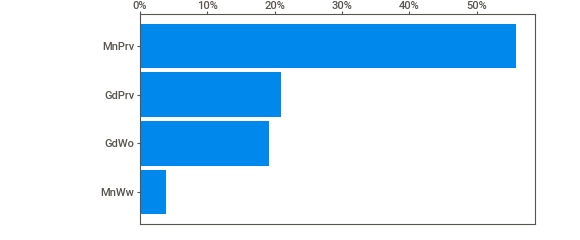
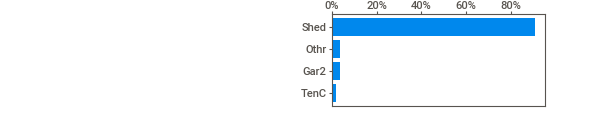
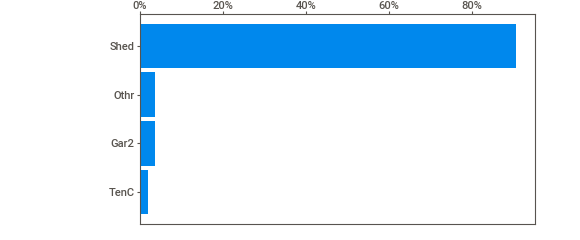
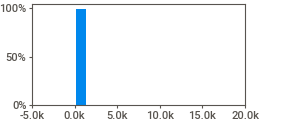
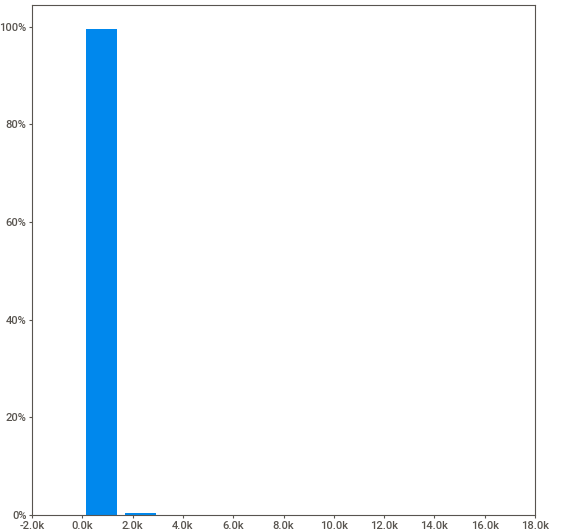
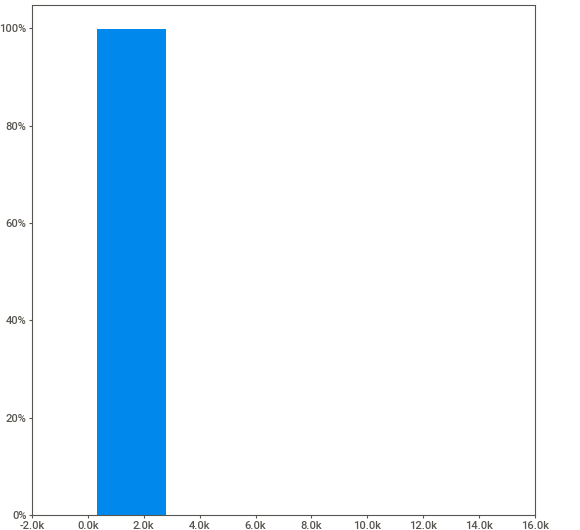
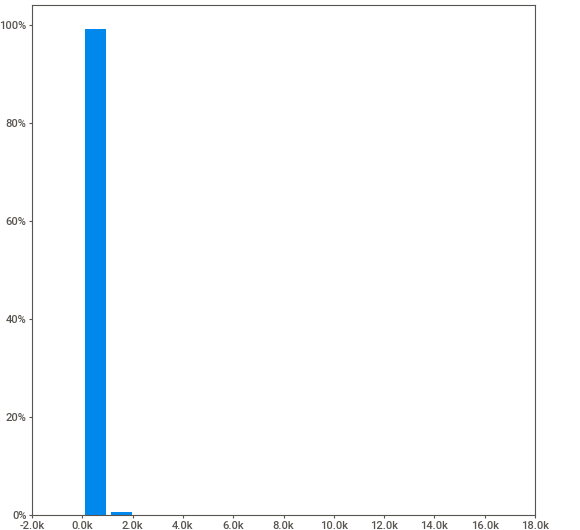
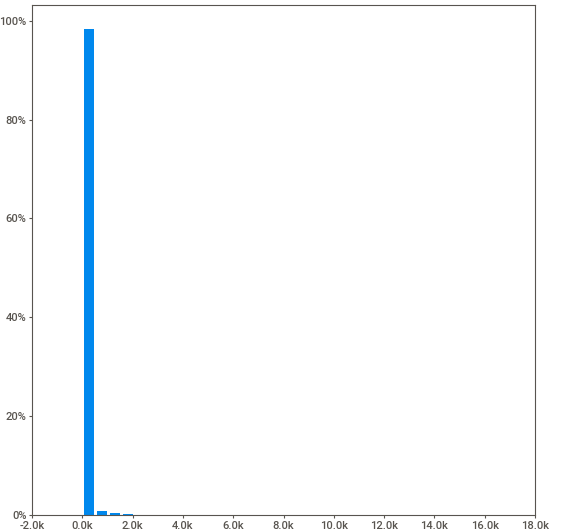
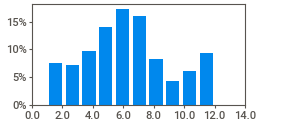
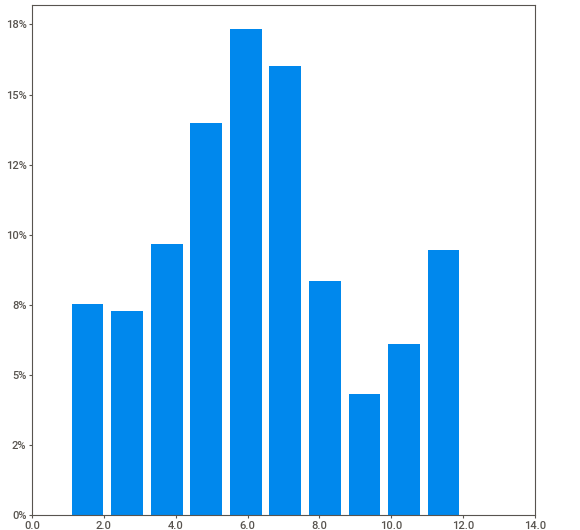
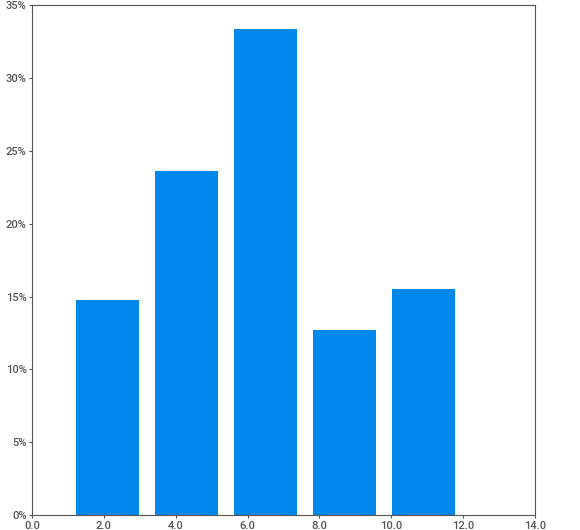
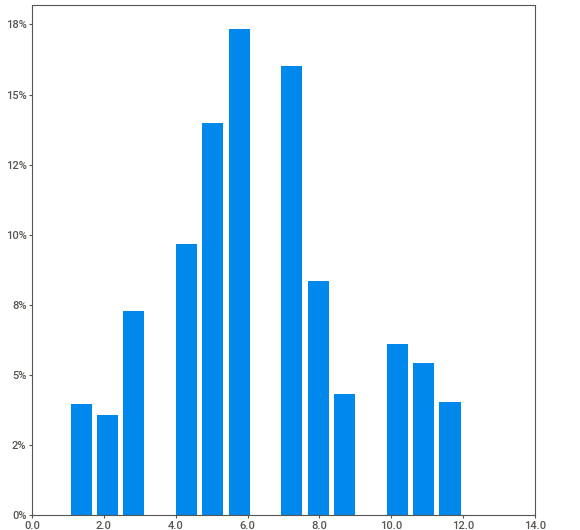
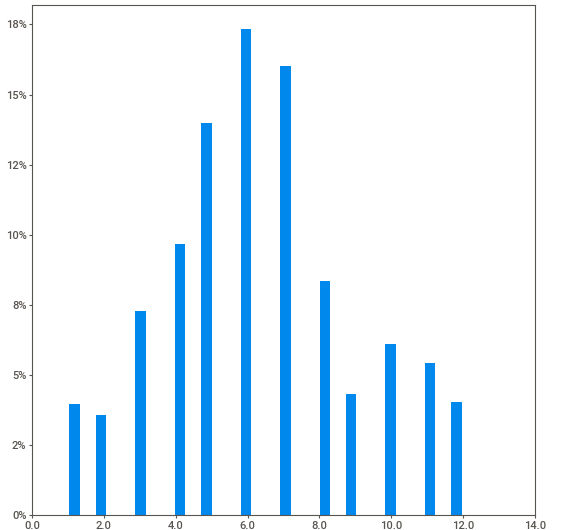
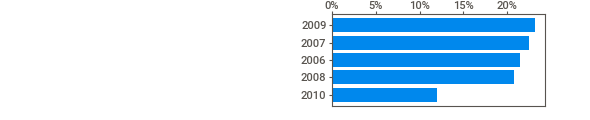
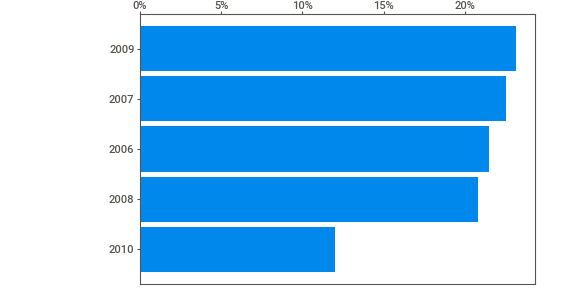
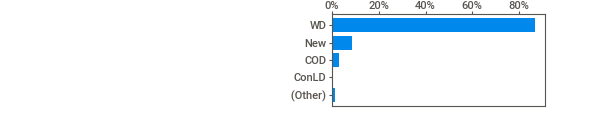
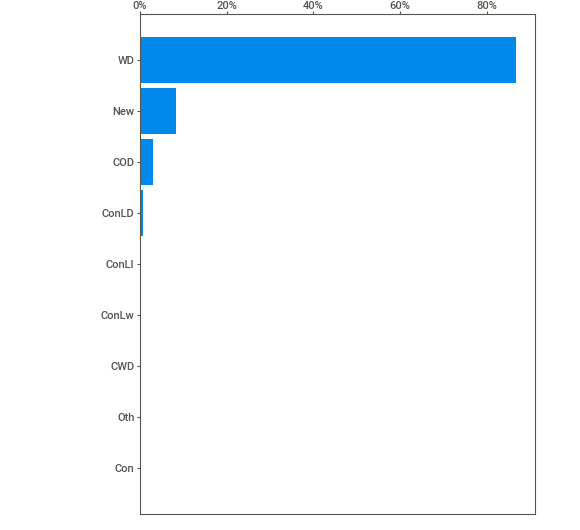
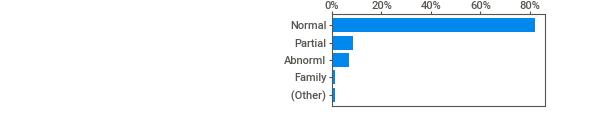
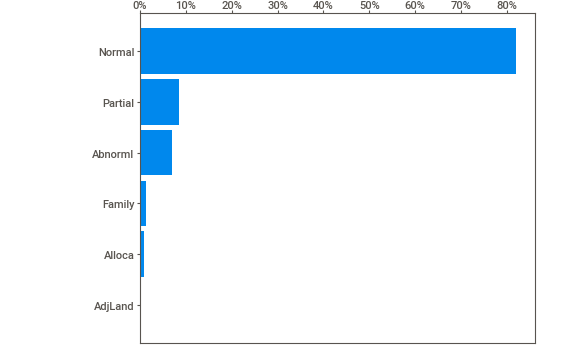
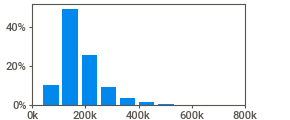
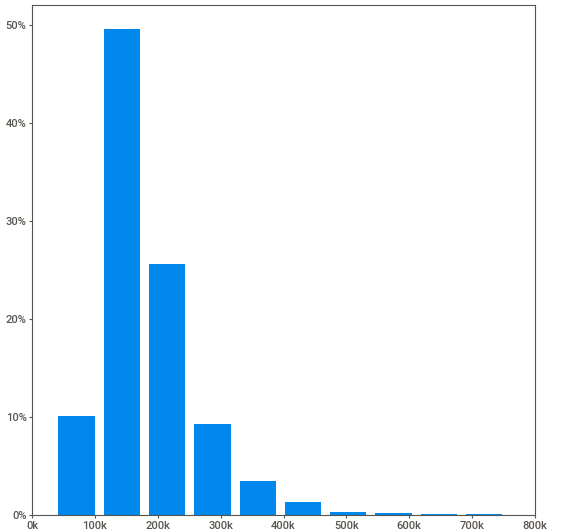
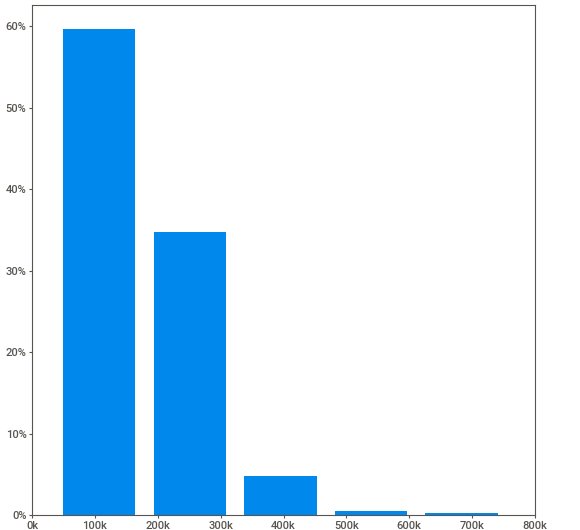
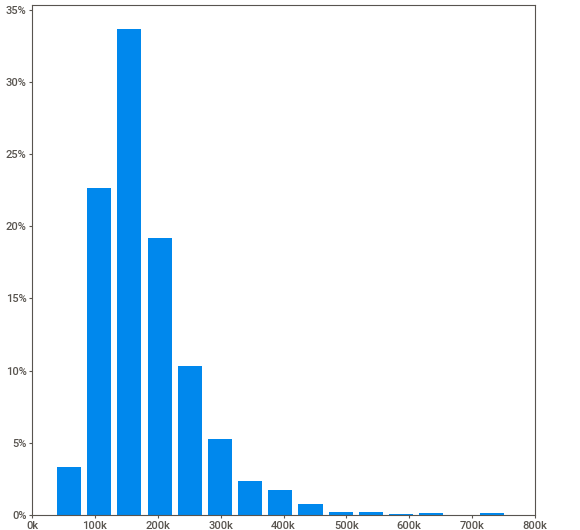
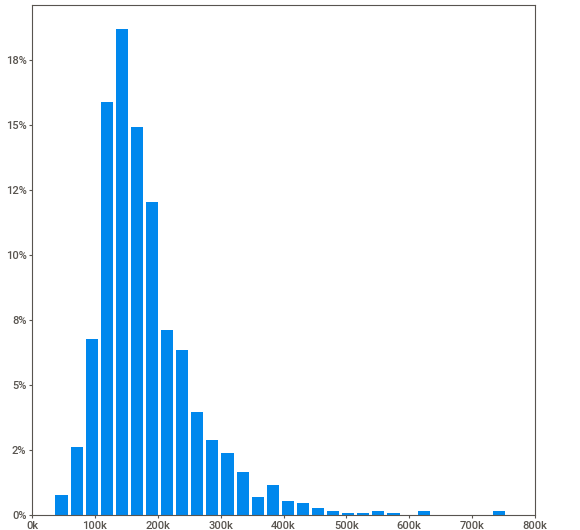
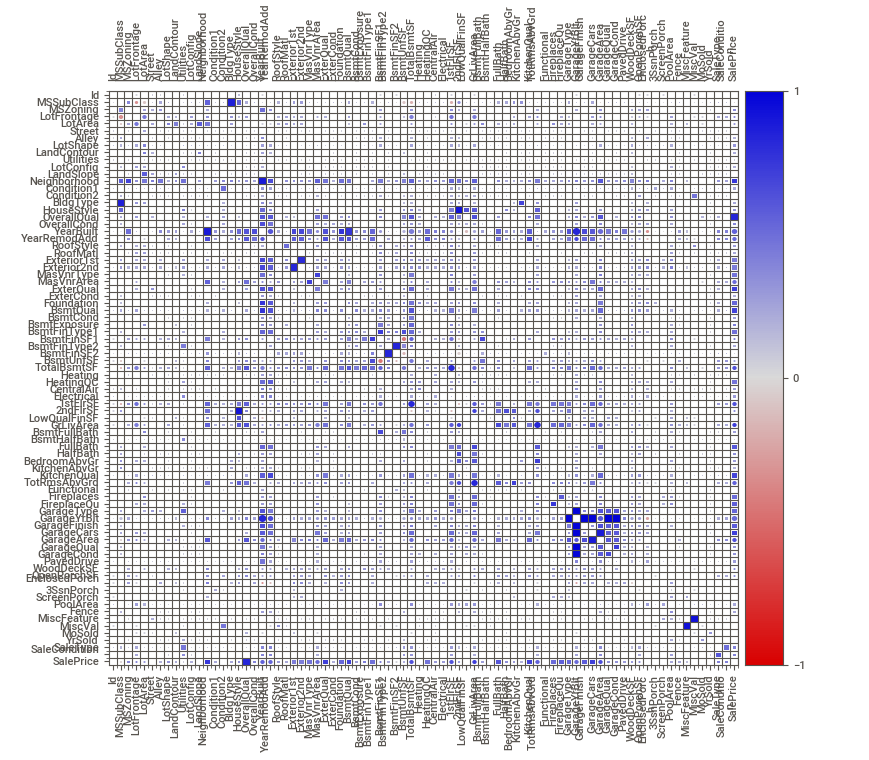
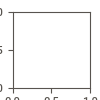

In [ ]:
# show report on house_prices_df
houses_report = sw.analyze(house_prices_df)
houses_report.show_notebook(layout='vertical')

## **`SalePrice`**
First, We will describe the target feature - `SalePrice`.

In [ ]:
house_prices_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [ ]:
Data=house_prices_df['SalePrice']
fig = px.box(Data, x='SalePrice', points="all" ,title="Sale Price Distribution")
fig.show()

We can see that the median value of house prices is 163k.  
The mose expensive house cost 755k and the cheapest house cost 34.9k.

## **`Numerical and Categorical features`**
In order to know better our data, let's look which of the features is numerical and which is categorical.

In [ ]:
house_prices_df.describe().T

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

and now on the categorical features

In [ ]:
house_prices_df.describe(include='O').T

count unique      top  freq
MSZoning       1460      5       RL  1151
Street         1460      2     Pave  1454
Alley            91      2     Grvl    50
LotShape       1460      4      Reg   925
LandContour    1460      4      Lvl  1311
Utilities      1460      2   AllPub  1459
LotConfig      1460      5   Inside  1052
LandSlope      1460      3      Gtl  1382
Neighborhood   1460     25    NAmes   225
Condition1     1460      9     Norm  1260
Condition2     1460      8     Norm  1445
BldgType       1460      5     1Fam  1220
HouseStyle     1460      8   1Story   726
RoofStyle      1460      6    Gable  1141
RoofMatl       1460      8  CompShg  1434
Exterior1st    1460     15  VinylSd   515
Exterior2nd    1460     16  VinylSd   504
MasVnrType     1452      4     None   864
ExterQual      1460      4       TA   906
ExterCond      1460      5       TA  1282
Foundation     1460      6    PConc   647
BsmtQual       1423      4       TA   649
BsmtCond       1423      4       TA  1311
BsmtExposure   1422      4       No   953
BsmtFinType1   1423      6      Unf   430
BsmtFinType2   1422      6      Unf  1256
Heating        1460      6     GasA  1428
HeatingQC      1460      5       Ex   741
CentralAir     1460      2        Y  1365
Electrical     1459      5    SBrkr  1334
KitchenQual    1460      4       TA   735
Functional     1460      7      Typ  1360
FireplaceQu     770      5       Gd   380
GarageType     1379      6   Attchd   870
GarageFinish   1379      3      Unf   605
GarageQual     1379      5       TA  1311
GarageCond     1379      5       TA  1326
PavedDrive     1460      3        Y  1340
PoolQC            7      3       Gd     3
Fence           281      4    MnPrv   157
MiscFeature      54      4     Shed    49
SaleType       1460      9       WD  1267
SaleCondition  1460      6   Normal  1198

## Correlation map
Here we can see the correlations between each couple of numerical features.

In [ ]:
corr=house_prices_df.corr()
corr=corr.sort_values(by='SalePrice')
colorscale = [[0, '#edf8fb'], [.3, '#b3cde3'],  [.6, '#8856a7'],  [1, '#810f7c']]
fig= go.Figure(data=go.Heatmap(z=corr.values,  y=corr.index,x=corr.columns, colorscale=colorscale))
fig.update_layout(
    autosize=False,
    width=1000,
    height=850)
fig.show()

## **YrSold feature**
`YrSold` feature can tell us a lot about the sale price.  
In years with high demand prices may be higher and in years with low demand the prices may go down.  

#### **Number of Sales per Year**
Here we can see the number of sales each year 

In [ ]:
data=pd.DataFrame()
data['Year Sold']=house_prices_df.groupby(['YrSold']).size().index.astype(str)
data['Houses']=house_prices_df.groupby(['YrSold']).size().values
fig=px.bar(data,y='Year Sold',x='Houses',color='Year Sold',title="Top Year Sold", width=900)
fig.show()

It can be seen that 2009 is the year that houses have been sold the most and the least It was 2010

### **House Prices Across Years**
Here we will see the distribution of house prices by years

In [ ]:
fig = px.histogram(house_prices_df,x = 'SalePrice',title = 'Distribution of House Price Across Years',nbins=200,color='YrSold', width=900)
fig.show()

### **House Zoning Across Years**
Zoning laws regulate the use of land within a municipality. It controls the ways in which the land can be developed and what purposes the zoned land can serve.  
Zoning is what keeps a residential district residential, a commercial district commercial, an industrial district industrial, and so on. Zoning dictates what types of properties can co-exist in a particular area within a municipality.  

In [ ]:
data = house_prices_df.groupby(['YrSold','MSZoning'])['SalePrice'].count().unstack()
x = data.index
fig = go.Figure(go.Bar(x=x, y=data['C (all)'], name='C (all)'))
fig.add_trace(go.Bar(x=x, y=data['FV'], name='FV'))
fig.add_trace(go.Bar(x=x, y=data['RH'], name='RH'))
fig.add_trace(go.Bar(x=x, y=data['RL'], name='RL'))
fig.add_trace(go.Bar(x=x, y=data['RM'], name='RM'))
fig.update_layout(barmode='stack', xaxis={'categoryorder':'category ascending'},title = 'BarPlot of House Zoning Across Years', width=900)
fig.show()

### **Quality Across Years**
Here we will see overall material and finish quality over the years by grade 1 - 10

In [ ]:
data = house_prices_df.groupby(['YrSold','OverallQual'])['SalePrice'].count().unstack()
x = data.index
fig = go.Figure(go.Bar(x=x, y=data[1], name='1'))
fig.add_trace(go.Bar(x=x, y=data[2], name='2'))
fig.add_trace(go.Bar(x=x, y=data[3], name='3'))
fig.add_trace(go.Bar(x=x, y=data[4], name='4'))
fig.add_trace(go.Bar(x=x, y=data[5], name='5'))
fig.add_trace(go.Bar(x=x, y=data[6], name='6'))
fig.add_trace(go.Bar(x=x, y=data[7], name='7'))
fig.add_trace(go.Bar(x=x, y=data[8], name='8'))
fig.add_trace(go.Bar(x=x, y=data[9], name='9'))
fig.add_trace(go.Bar(x=x, y=data[10], name='10'))

fig.update_layout(barmode='stack', xaxis={'categoryorder':'category ascending'},title = 'BarPlot of Quality Across Years', width=900)
fig.show()

### **SalePrice by MS Zoning**
Here we can see the sale prices for each zoning areas

In [ ]:
data=pd.concat([house_prices_df['SalePrice'],house_prices_df['MSZoning']],axis=1)
fig = px.box(data, y='SalePrice', x='MSZoning',color='MSZoning',title='BoxPlot SalePrice byMS Zoining', width=900)
fig.show()

We can see above that in residential low density zones and in floating villages the house prices is the most expensive.  
Moreover, we can see that in commercial zones the house prices is the cheapest, as we expected.

### **Quality in MS Zoning**
Here we will see the quality distribution for each MS zoning

In [ ]:
col_name=list(house_prices_df['MSZoning'].unique())
labels=list(house_prices_df['OverallQual'].unique())
RL=house_prices_df[house_prices_df['MSZoning']=='RL'][['OverallQual']].value_counts()
RM=house_prices_df[house_prices_df['MSZoning']=='RM'][['OverallQual']].value_counts()
Call=house_prices_df[house_prices_df['MSZoning']=='C (all)'][['OverallQual']].value_counts()
FV=house_prices_df[house_prices_df['MSZoning']=='FV'][['OverallQual']].value_counts()
RH=house_prices_df[house_prices_df['MSZoning']=='RH'][['OverallQual']].value_counts()
cols=5
rows=1
specs = [[{'type':'domain'}] * cols] * rows
fig = make_subplots(rows=rows, cols=cols,specs=specs,subplot_titles=col_name)
fig.add_trace(go.Pie(labels=labels, values=RL, name="Rl"),1, 1)
fig.add_trace(go.Pie(labels=labels, values=RM, name="RM"),1, 2)
fig.add_trace(go.Pie(labels=labels, values=Call, name="RM"),1, 3)
fig.add_trace(go.Pie(labels=labels, values=FV, name="RM"),1, 4)
fig.add_trace(go.Pie(labels=labels, values=RH, name="RM"),1, 5)
fig.update_traces(hoverinfo="label+percent")
fig.update_layout(
    margin=dict(t=0, b=0, l=0, r=0),
    title_text=" Distribution Quality in MsZoning", width=1100)
fig.show()

## **Neighborhood**
Some neighborhoods may have a higher selling prices and others have a relatively low selling prices.

### **Neighborhood by MS Zoning**

In [ ]:
data=house_prices_df.groupby(['Neighborhood','MSZoning'])['SalePrice'].count().unstack()
x=data.index
fig = go.Figure(go.Bar(x=x, y=data['C (all)'], name='C (all)'))
fig.add_trace(go.Bar(x=x, y=data['FV'], name='FV'))
fig.add_trace(go.Bar(x=x, y=data['RH'], name='RH'))
fig.add_trace(go.Bar(x=x, y=data['RL'], name='RL'))
fig.add_trace(go.Bar(x=x, y=data['RM'], name='RM'))
fig.update_layout(barmode='stack', xaxis={'categoryorder':'category ascending'},title='Neighborhood Distribution by MsZoning', width=1100)
fig.show()

### **Houses per Neighborhood**

In [ ]:
data=pd.DataFrame()
data['Neighborhood']=house_prices_df['Neighborhood'].unique()
data['Houses']=house_prices_df['Neighborhood'].value_counts().values

fig = px.bar(data, y='Neighborhood', x='Houses',color='Neighborhood',title='Number of Houses per Neighborhood', width=900)
fig.show()

### **Sale Price by Neighborhood**

In [ ]:
data = pd.concat([house_prices_df['SalePrice'], house_prices_df['Neighborhood']], axis=1)
fig = px.box(data, y='SalePrice', x='Neighborhood',color='Neighborhood',title='BoxPlot Sale Price by Neighborhood', width=900)
fig.show()

We can see that the most expensive house is in NoRidge neighborhood.  
The median value of Nridght neighborhood is the highest and the median value of MeadowV neighborhood is the lowest.  
Also we can see that the cheapest house is in IDOTRR neighborhood.

### **Neighborhood by Quality**

In [ ]:
data=house_prices_df.groupby(['Neighborhood', 'OverallQual']).size().unstack()
x=data.index
fig = go.Figure(go.Bar(x=x, y=data[1], name=1))
fig.add_trace(go.Bar(x=x, y=data[2], name=2))
fig.add_trace(go.Bar(x=x, y=data[3], name=3))
fig.add_trace(go.Bar(x=x, y=data[4], name=4))
fig.add_trace(go.Bar(x=x, y=data[5], name=5))
fig.add_trace(go.Bar(x=x, y=data[6], name=6))
fig.add_trace(go.Bar(x=x, y=data[7], name=7))
fig.add_trace(go.Bar(x=x, y=data[8], name=8))
fig.add_trace(go.Bar(x=x, y=data[9], name=9))
fig.add_trace(go.Bar(x=x, y=data[10], name=10))

fig.update_layout(barmode='stack', xaxis={'categoryorder':'category ascending'},title='Distribution of Neighborhood by Qualty', width=900)
fig.show()

Here we can see that in NoRidge neighborhood the lowest quality is 7 and in Nridght neighborhood the lowest quality is 6.  
The highest quality values in MeadowV is between 4-6 and the quality values in IDOTRR is 2-7.  
This make sense with the sale prices that we seen above.

## **MSSubClass feature**
`MSSubClass` feature can tell us about the number of floors of the house and on its age.  
Sub Classes explanation:
- 20 - 1 Floor, 1946 & newer
- 30 - 1 Floor, 1945 & older
- 40 - 1 Floor, Finished attic, All ages
- 45 - 1 Floor, Unfinished, All ages
- 50 - 1 Floor, Finished, All ages
- 60 - 2 Floors, 1946 & newer
- 70 - 2 Floors, 1945 & older
- 75 - 2 Floors, All ages
- 80 - Split or Multi-Level
- 85 - Split Foyer
- 90 - Duplex, All ages
- 120 - 1 Floor, Planned Unit Development, 1946 & newer
- 160 - 2 Floors, Planned Unit Development, 1946 & newer
- 180 - Planned Unit Development, Multilevel, Include split level/foyer
- 190 - 2 Family Conversion, All ages

### **Distribution of Sub Class**

In [ ]:
data=pd.DataFrame()
data['MSSubClass']=house_prices_df['MSSubClass'].value_counts().index
data['Houses']=house_prices_df['MSSubClass'].value_counts().values
fig = px.pie(data, values='Houses', names='MSSubClass',color='MSSubClass',color_discrete_sequence=px.colors.sequential.RdBu, width=900)
fig.update_traces(textposition='inside', textinfo='percent+label',title = 'Distribution of Sub Class')
fig.show()

### **Sub Class in MS Zoning**

In [ ]:
col_name=list(house_prices_df['MSZoning'].unique())
labels=list(house_prices_df['MSSubClass'].unique())
RL=house_prices_df[house_prices_df['MSZoning']=='RL'][['MSSubClass']].value_counts()
RM=house_prices_df[house_prices_df['MSZoning']=='RM'][['MSSubClass']].value_counts()
Call=house_prices_df[house_prices_df['MSZoning']=='C (all)'][['MSSubClass']].value_counts()
FV=house_prices_df[house_prices_df['MSZoning']=='FV'][['MSSubClass']].value_counts()
RH=house_prices_df[house_prices_df['MSZoning']=='RH'][['MSSubClass']].value_counts()
cols=5
rows=1
specs = [[{'type':'domain'}] * cols] * rows
fig = make_subplots(rows=rows, cols=cols,specs=specs,subplot_titles=col_name)
fig.add_trace(go.Pie(labels=labels, values=RL, name="Rl"),1, 1)
fig.add_trace(go.Pie(labels=labels, values=RM, name="RM"),1, 2)
fig.add_trace(go.Pie(labels=labels, values=Call, name="RM"),1, 3)
fig.add_trace(go.Pie(labels=labels, values=FV, name="RM"),1, 4)
fig.add_trace(go.Pie(labels=labels, values=RH, name="RM"),1, 5)
fig.update_traces(hoverinfo="label+percent")
fig.update_layout(
    margin=dict(t=0, b=0, l=0, r=0),
    title_text="Distribution SubClass in MsZoning", width=950)
fig.show()

## **Garage**
The garage of the house can attest much to the price of the house. From its size to the number of cars it has.  
We will look now on the garage attributes:
1. `GarageYrBlt` - Year garage was built
2. `GarageCars` - Size of garage in car capacity
3. `GarageArea` - Size of garage in square feet
4. `GarageType` - Garage location  
    Possible locations:  
    - Detchd - This type of garage is disconnected from the house and can be placed anywhere on the lot. 
    - Attchd - An attached garage is connected to the house directly, so you’ll have straight access to your vehicle and stuff in storage. 
    - BuiltIn - A built-in garage is similar to an attached garage with one key difference: the garage is built-in to the living area and has living space directly above the garage.
    - CarPort - open garage. just a roof and no walls (open sides). 
    - Basment - A basement garage is partially or mostly below grade, with its entrance level with the basement floor.
    - 2Types - More than one type of garage.
    - NA - No garage
5. `GarageFinish` - Interior finish of the garage.  
    finish types:
    - RFn - Rough Finished
    - Unf - Unfinished
    - Fin - Finished
    - NA - No garage

In [ ]:
fig = make_subplots(rows=1, cols=5)
fig.add_trace(go.Scatter(y=house_prices_df['SalePrice'],x=house_prices_df["GarageYrBlt"],mode='markers',name='GarageYrBlt'), row=1, col=1)
fig.add_trace(go.Scatter(y=house_prices_df['SalePrice'],x=house_prices_df["GarageCars"],mode='markers',name='GarageCars'), row=1, col=2)
fig.add_trace(go.Scatter(y=house_prices_df['SalePrice'],x=house_prices_df["GarageArea"],mode='markers',name='GarageArea'), row=1, col=3)
fig.add_trace(go.Box(y=house_prices_df['SalePrice'],x=house_prices_df["GarageType"],name='GarageType'), row=1, col=4)
fig.add_trace(go.Box(y=house_prices_df['SalePrice'],x=house_prices_df["GarageFinish"],name='GarageFinish'), row=1, col=5)
fig.update_layout(title_text="Garage with SalePrice")
fig.show()

## **SalePrice and Categorical Utilities**
Here we will see the relatonship between some categorical utilities features and the sale price.  
The categorical utilities features:  
1. CenteralAir - Central air conditioning - Yes/No
2. Heating - Type of heating  
    - GasA - Gas forced warm air furnace
    - GasW - Gas hot water or steam heat
    - Grav - Gravity furnace	
    - Wall - Wall furnace
    - OthW - Hot water or steam heat other than gas
    - Floor - Floor Furnace
3. Fireplaces - Number of fireplaces - 0-3
4. Electrical - Electrical system
    - SBrkr - Standard Circuit Breakers & Romex
    - FuseF - 60 AMP Fuse Box and mostly Romex wiring (Fair)
    - FuseA - Fuse Box over 60 AMP and all Romex wiring (Average)
    - FuseP - 60 AMP Fuse Box and mostly knob & tube wiring (poor)
    - Mix - Mixed


No handles with labels found to put in legend.


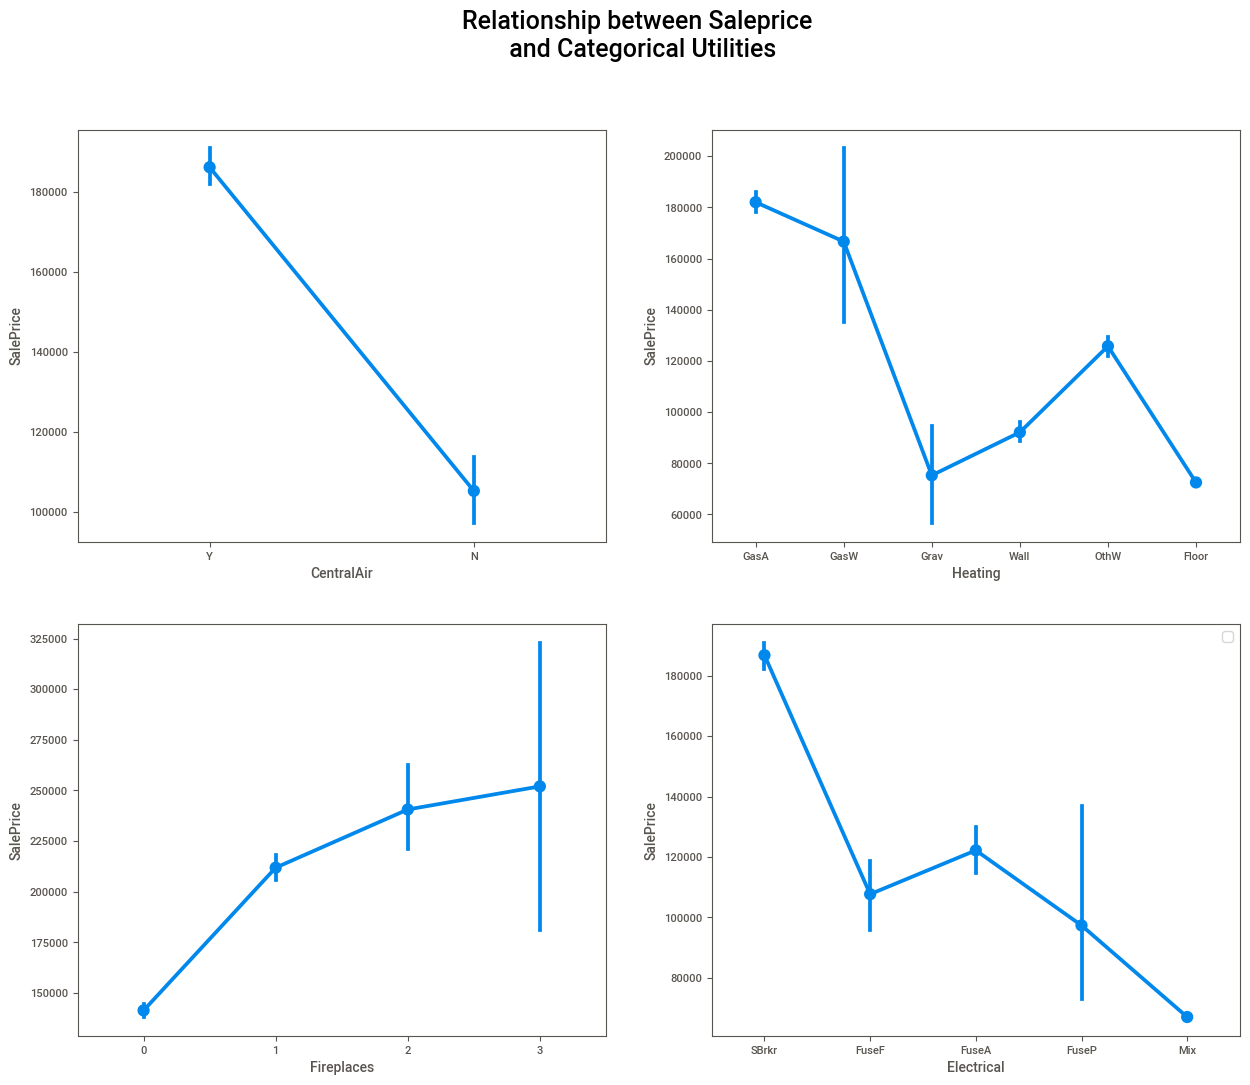

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(15,12))
plt.suptitle('Relationship between Saleprice \n and Categorical Utilities', fontsize=18)
sns.pointplot(x='CentralAir', y='SalePrice', data=house_prices_df, ax=ax1)
sns.pointplot(x='Heating', y='SalePrice', data=house_prices_df, ax=ax2)
sns.pointplot(x='Fireplaces', y='SalePrice', data=house_prices_df, ax=ax3)
sns.pointplot(x='Electrical', y='SalePrice', data=house_prices_df, ax=ax4)
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.legend(loc='best')
plt.show()

## **Overall Material and Finish Quality**
We expect that the higher the quality of the house, the higher its value.  
Let's see the sale price by overall quality.

In [ ]:
Data=pd.concat([house_prices_df['OverallQual'],house_prices_df['SalePrice']],axis=1)
fig=px.box(Data,x='OverallQual',y='SalePrice',color='OverallQual', width=900)
fig.show()

It can be seen that as we expected, the value of the houses increase as its quality improves.

# **Investigating and Preproccessing**


## **Outliares**
As we can see below, we have some outliers samples in our dataset

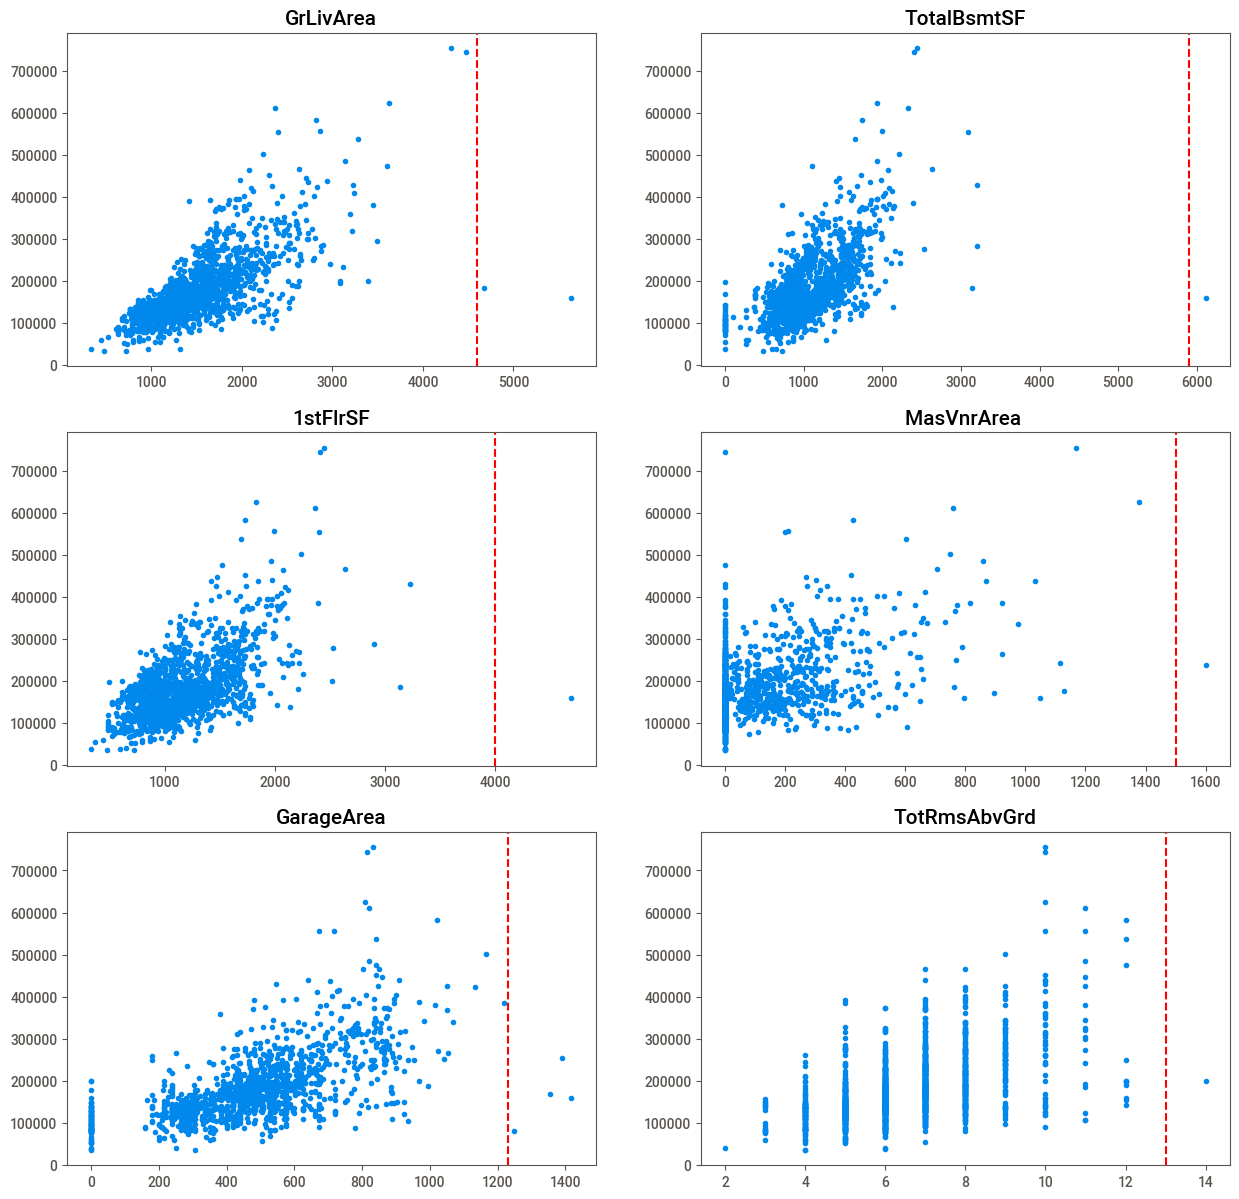

In [ ]:
plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
plt.scatter(x=house_prices_df['GrLivArea'],y=house_prices_df['SalePrice'])
plt.axvline(x=4600 ,color='red',linestyle='dashed')
plt.title('GrLivArea',fontsize=15,weight='bold')

plt.subplot(3,2,2)
plt.scatter(x=house_prices_df['TotalBsmtSF'],y=house_prices_df['SalePrice'])
plt.axvline(x=5900 ,color='red',linestyle='dashed')
plt.title('TotalBsmtSF',fontsize=15,weight='bold')

plt.subplot(3,2,3)
plt.scatter(x=house_prices_df['1stFlrSF'],y=house_prices_df['SalePrice'])
plt.axvline(x=4000 ,color='red',linestyle='dashed')
plt.title('1stFlrSF',fontsize=15,weight='bold')

plt.subplot(3,2,4)
plt.scatter(x=house_prices_df['MasVnrArea'],y=house_prices_df['SalePrice'])
plt.axvline(x=1500 ,color='red',linestyle='dashed')
plt.title('MasVnrArea ',fontsize=15,weight='bold')

plt.subplot(3,2,5)
plt.scatter(x=house_prices_df['GarageArea'],y=house_prices_df['SalePrice'])
plt.axvline(x=1230 ,color='red',linestyle='dashed')
plt.title('GarageArea',fontsize=15,weight='bold')

plt.subplot(3,2,6)
plt.scatter(x=house_prices_df['TotRmsAbvGrd'],y=house_prices_df['SalePrice'])
plt.axvline(x=13 ,color='red',linestyle='dashed')
plt.title('TotRmsAbvGrd',fontsize=15,weight='bold')


plt.show()

To deal with these samples, we will throw them from the training data

In [ ]:
house_prices_df = house_prices_df.drop(house_prices_df[(house_prices_df['GrLivArea']>4000) & (house_prices_df['SalePrice']<200000)].index)
house_prices_df = house_prices_df.drop(house_prices_df[(house_prices_df['TotalBsmtSF']>56000) & (house_prices_df['SalePrice']<320000)].index)
house_prices_df = house_prices_df.drop(house_prices_df[(house_prices_df['1stFlrSF']>4600) & (house_prices_df['SalePrice']<200000)].index)
house_prices_df = house_prices_df.drop(house_prices_df[(house_prices_df['MasVnrArea']>1500) & (house_prices_df['SalePrice']<300000)].index)
house_prices_df = house_prices_df.drop(house_prices_df[(house_prices_df['GarageArea']>1200) & (house_prices_df['SalePrice']<300000)].index)
house_prices_df = house_prices_df.drop(house_prices_df[(house_prices_df['TotRmsAbvGrd']>13) & (house_prices_df['SalePrice']<300000)].index)

Now our training data is clean from outliers.  
Lets merge the features from our training and test data in order to do pre-processing

In [ ]:
concat_df = pd.concat([house_prices_df,test_df],axis=0,sort=False) # merge train and test dataframes
concat_df = concat_df.drop(['Id','SalePrice'],axis=1) # drop the Id and SalePrice columns

## **Missing Values**
We can see from below that we have a lot of missing data in our dataset.

In [ ]:
# Number of missing values in each column of training data
missing_val_count_by_column = (house_prices_df.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

LotFrontage      258
Alley           1364
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      688
GarageType        80
GarageYrBlt       80
GarageFinish      80
GarageQual        80
GarageCond        80
PoolQC          1447
Fence           1172
MiscFeature     1400
dtype: int64


In [ ]:
total =concat_df.isnull().sum().sort_values(ascending=False)
percent = (concat_df.isnull().sum()/concat_df.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data=missing_data.drop((missing_data[missing_data['Total']==0]).index,0) 
missing_data.head(20)
display(missing_data.head(20).style.background_gradient(cmap='Reds'))

First, we will drop the columns with more than 50% missing values.

In [ ]:
concat_df = concat_df.drop((missing_data[missing_data['Percent']>50]).index,1)

#### Numeric Features
To fill the missing values in our data, we will split the features of missing values to numeric features and categorical features.  
First, we will look on the `null_num_features`

In [ ]:
# Separating null features to null numeric features
null_num_features =(concat_df.select_dtypes(exclude=object).isna().sum().sort_values(ascending=False)[concat_df.isna().sum()>0]).index
null_num_features

Index(['LotFrontage', 'GarageYrBlt', 'MasVnrArea', 'BsmtHalfBath',
       'BsmtFullBath', 'GarageArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'GarageCars'],
      dtype='object')

Let's explain these features:
- GarageYrBlt - Year garage was built.
- GarageArea - Size of garage in square feet.
- GarageCars - Size of garage in car capacity.   
We can see below that at the most cases, where the `GarageType` feature is Nan, all the Garage features is zero or Nan too. Therefore, we can assume that when the numeric garage features is missing, we can fill them with value of zero.
- MasVnrArea - Masonry veneer area in square feet
- BsmtHalfBath - Basement half bathrooms
- BsmtFullBath - Basement full bathrooms
- BsmtFinSF1 - Type 1 finished square feet
- BsmtFinSF2 - Type 2 finished square feet
- BsmtUnfSF - Unfinished square feet of basement area
- TotalBsmtSF - Total square feet of basement area  
Like the garage features, we can assume that when the basement features in Nan, it mean that there is no basement in the house, and we will fill these numeric basement features with zero value And so too veneer.
- LotFrontage - In real estate, frontage is the width of a lot, measured at the front part of the lot.  
Unlike other features, it can not be set that the width of the lot area is zero. Therefore, we will drop this feature from the `nul_num_features` and we will take care for him later.

In [ ]:
# Display the Garage features where the garage type is NaN
concat_df[['GarageYrBlt','GarageArea', 'GarageCars']][concat_df['GarageType'].isna()]

GarageYrBlt  GarageArea  GarageCars
39            NaN         0.0         0.0
48            NaN         0.0         0.0
78            NaN         0.0         0.0
88            NaN         0.0         0.0
89            NaN         0.0         0.0
...           ...         ...         ...
1433          NaN         0.0         0.0
1449          NaN         0.0         0.0
1453          NaN         0.0         0.0
1454          NaN         0.0         0.0
1457          NaN         0.0         0.0

[156 rows x 3 columns]

In [ ]:
null_num_features=null_num_features.drop('LotFrontage')

In [ ]:
# Display the numeric features with missing values
concat_df.loc[:,null_num_features].head(10)

GarageYrBlt  MasVnrArea  BsmtHalfBath  BsmtFullBath  GarageArea  \
0       2003.0       196.0           0.0           1.0       548.0   
1       1976.0         0.0           1.0           0.0       460.0   
2       2001.0       162.0           0.0           1.0       608.0   
3       1998.0         0.0           0.0           1.0       642.0   
4       2000.0       350.0           0.0           1.0       836.0   
5       1993.0         0.0           0.0           1.0       480.0   
6       2004.0       186.0           0.0           1.0       636.0   
7       1973.0       240.0           0.0           1.0       484.0   
8       1931.0         0.0           0.0           0.0       468.0   
9       1939.0         0.0           0.0           1.0       205.0   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  GarageCars  
0       706.0         0.0      150.0        856.0         2.0  
1       978.0         0.0      284.0       1262.0         2.0  
2       486.0         0.0      434.0        920.0         2.0  
3       216.0         0.0      540.0        756.0         3.0  
4       655.0         0.0      490.0       1145.0         3.0  
5       732.0         0.0       64.0        796.0         2.0  
6      1369.0         0.0      317.0       1686.0         2.0  
7       859.0        32.0      216.0       1107.0         2.0  
8         0.0         0.0      952.0        952.0         2.0  
9       851.0         0.0      140.0        991.0         1.0

In [ ]:
# Fill the numeric missing values with zeros
for col  in null_num_features:
    concat_df[col] = concat_df[col].fillna(0)

#### LotFrontage
To fill the `LotFrontage` feature missing values we will take the median value of `LotFrontage` in each neighborhood. 

In [ ]:
# Display the median width of a lot in each neighborhood
concat_df.groupby("Neighborhood")["LotFrontage"].median()

Neighborhood
Blmngtn    43.0
Blueste    24.0
BrDale     21.0
BrkSide    51.0
ClearCr    80.5
CollgCr    70.0
Crawfor    70.0
Edwards    64.5
Gilbert    64.0
IDOTRR     60.0
MeadowV    21.0
Mitchel    74.0
NAmes      73.0
NPkVill    24.0
NWAmes     80.0
NoRidge    89.0
NridgHt    91.5
OldTown    60.0
SWISU      60.0
Sawyer     72.0
SawyerW    67.0
Somerst    73.0
StoneBr    60.0
Timber     82.0
Veenker    80.0
Name: LotFrontage, dtype: float64

In [ ]:
# Fill the LotFrontage missing values with the median values of the neighborhood 
concat_df['LotFrontage'] = concat_df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

#### Categorical Features
To fill missing values in categorical variables we will split them to 2:  
- `null_cat_features_low` - where there is less than 10 missing values.  
- `null_cat_features_high` - where there is more than 10 missing values.

In [ ]:
# Split the categorical features with missing values by the number of missing values
null_cat_features_low = (concat_df.select_dtypes(include=object).isnull().sum().sort_values(ascending=False)
                          [concat_df.isnull().sum()>0][concat_df.isnull().sum() < 10]).index
null_cat_features_high = (concat_df.select_dtypes(include=object).isnull().sum().sort_values(ascending=False)
                          [concat_df.isnull().sum()>0][concat_df.isnull().sum() > 10]).index

In [ ]:
null_cat_features_low

Index(['MSZoning', 'Utilities', 'Functional', 'Electrical', 'KitchenQual',
       'SaleType', 'Exterior2nd', 'Exterior1st'],
      dtype='object')

To fill the features with low number of missing values we will use the value that appears most often in this feature. 

In [ ]:
# Fill each feature with low number of missing values with the most common value
for col in null_cat_features_low:
    concat_df[col] = concat_df[col].fillna(concat_df[col].mode()[0])

Now let's look on the features with high number of missing values

In [ ]:
null_cat_features_high

Index(['FireplaceQu', 'GarageCond', 'GarageQual', 'GarageFinish', 'GarageType',
       'BsmtCond', 'BsmtExposure', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1',
       'MasVnrType'],
      dtype='object')

In [ ]:
# Display number of fireplaces where the FireplaceQu is null
concat_df['Fireplaces'][concat_df['FireplaceQu'].isna()]

0       0
5       0
10      0
12      0
15      0
       ..
1452    0
1453    0
1454    0
1455    0
1457    0
Name: Fireplaces, Length: 1418, dtype: int64

We can see that the categorical features with high number of missing values is about the garage, fireplace and basement.  
It means that when there are missing values ​​in these features, there is no fireplace/ garage/ basemet in the house.  
Therefore, we will fill these missing values with "None".

In [ ]:
for col in null_cat_features_high:
    concat_df[col]=concat_df[col].fillna("None").astype(str)

In [ ]:
concat_df.isnull().sum()[concat_df.isnull().sum()>0]

Series([], dtype: int64)

Now, we have no missing values ​​in the data

### House Age
Now we will add a feature called house age by substract the `YearBuilt` from the `YrSold`

In [ ]:
# Create 
concat_df['HouseAge'] = (concat_df['YrSold'] - concat_df['YearBuilt'] )
concat_df['HouseAge'].describe()

count    2912.000000
mean       36.491071
std        30.320331
min        -1.000000
25%         7.000000
50%        35.000000
75%        54.250000
max       136.000000
Name: HouseAge, dtype: float64

In [ ]:
concat_df[concat_df['HouseAge'] < 0]

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
1089          20       RL        128.0    39290   Pave      IR1         Bnk   

     Utilities LotConfig LandSlope Neighborhood Condition1 Condition2  \
1089    AllPub    Inside       Gtl      Edwards       Norm       Norm   

     BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
1089     1Fam     1Story           10            5       2008          2009   

     RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea  \
1089       Hip  CompShg     CemntBd     CmentBd      Stone      1224.0   

     ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
1089        Ex        TA      PConc       Ex       TA           Gd   

     BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
1089          GLQ      4010.0          Unf         0.0     1085.0   

      TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
1089       5095.0    GasA        Ex          Y      SBrkr      5095         0   

      LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
1089             0       5095           1.0           1.0         2         1   

      BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
1089             2             1          Ex            15        Typ   

      Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  \
1089           2          Gd     Attchd       2008.0          Fin         3.0   

      GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  \
1089      1154.0         TA         TA          Y         546          484   

      EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  \
1089              0          0            0         0    17000      10   

      YrSold SaleType SaleCondition  HouseAge  
1089    2007      New       Partial        -1

We can see that there is one house that his age is -1, it does not make a sense.  
When we look at this house details we can see that the `SaleCondition` is partial, it means that the house was not completed when last assessed.  
Alse, the `SaleType` is new and `YearRemodAdd` is 2009.  
When we look at all of these details we can suggest that the house sold in 2009. Therefore, we will change the `YrSold` of this house to 2009.

In [ ]:
# Change the year sold to 2009
concat_df.loc[concat_df['YrSold'] < concat_df['YearBuilt'], 'YrSold'] = 2009

# Calculate house ages again to change the outlier house
concat_df['HouseAge']= (concat_df['YrSold'] - concat_df['YearBuilt']) 
concat_df['HouseAge'].describe()

count    2912.000000
mean       36.491758
std        30.319504
min         0.000000
25%         7.000000
50%        35.000000
75%        54.250000
max       136.000000
Name: HouseAge, dtype: float64

### Total Square Feet
When we are looking for house one thing we want to know is the total square feet area of the house.   
Therefore, we will add this feature to our data by adding the `TotalBsmtSF`, `1stFlrSF` and `2ndFlrSF` features.

In [ ]:
concat_df['TotalSF'] = concat_df['TotalBsmtSF'] + concat_df['1stFlrSF'] + concat_df['2ndFlrSF']

# Drop TotalBsmtSf, 1stFlrSF and 2ndFlrSF features
concat_df = concat_df.drop(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF'], axis=1)

## **Drop Features**
Now, when we have no missing values ​​in the data we can look again on the correlation map to see better the impact of the features on the target. 

#### **numerical features**
we can see the correlations of the numerical features from the correlation heatmap below

In [ ]:
house_prices_df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
1          Norm     1Fam     1Story            6            8       1976   
2          Norm     1Fam     2Story            7            5       2001   
3          Norm     1Fam     2Story            7            5       1915   
4          Norm     1Fam     2Story            8            5       2000   
...         ...      ...        ...          ...          ...        ...   
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd       None   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   

In [ ]:
temp_df = pd.concat([concat_df[:house_prices_df.shape[0]],house_prices_df['SalePrice']],axis=1,sort=False) # merge train and test dataframes

In [ ]:
corr=temp_df.corr()
corr=corr.sort_values(by='SalePrice')
colorscale = [[0, '#edf8fb'], [.3, '#b3cde3'],  [.6, '#8856a7'],  [1, '#810f7c']]
fig= go.Figure(data=go.Heatmap(z=corr.values,  y=corr.index,x=corr.columns, colorscale=colorscale))
fig.update_layout(
    autosize=False,
    width=1000,
    height=850)
fig.show()

We can see that the features `HouseAge` and `TotalSF` that we added to our data have high correlations with the `SalePrice`.  
We can see that as the area of ​​the house increases, so will the price.  
Also we can see when the house is older, the price of the house will dropped.  
Now we will drop all the features that their abslute correlation is less than 0.1:  
`BsmtFinSF2`, `BsmtHalfBath`, `MiscVal`, `LowQualFinSF`, `YtSold`, `3SsnPorch`, `MoSold`, `OverallCond`, `MSSubClass`, `PoolArea`

In [ ]:
num_low_corr_features = ['BsmtFinSF2', 'BsmtHalfBath', 'MiscVal', 'LowQualFinSF', 'YrSold', '3SsnPorch', 'MoSold', 'OverallCond', 'MSSubClass',
                          'PoolArea']

# Drop low correlation features from the concat dataset
concat_df = concat_df.drop(num_low_corr_features, axis=1)

#### **Categorical Features**
To see the effect of the categorical features on the `SalePrice` we will use a count plot and violin plot

In [ ]:
def plot_categorical(df, target):
  features = df.select_dtypes(include=['O', 'object']).columns
  df = pd.concat([df[features],df[target]],axis=1,sort=False)
  cols = 2
  rows =  len(features)
  fig, ax = plt.subplots(rows, cols)
  for i, key in enumerate(features):
    sub_ax = sns.countplot(data=df, x=key, ax=ax[i, 0], palette="Set2")
    for p in sub_ax.patches:
      _x = p.get_x() + p.get_width() / 2
      _y = p.get_y() + p.get_height() / 2
      value = "{:d}".format(p.get_height())
      sub_ax.text(_x, _y, value, ha="center")
    ax[i, 0].xaxis.set_tick_params(rotation=45)
    sns.boxplot(x=key, y=target, data=df, ax=ax[i, 1], palette="Set2")
    ax[i, 1].xaxis.set_tick_params(rotation=45)

  plt.subplots_adjust(top=2.5, bottom=0, left=0, right=1)
  fig.set_size_inches(20, 100)
  fig.show()

In [ ]:
plot_categorical(temp_df, "SalePrice")

We can assume that when feature have one value which is an absolute majority (more than 95%), it has no big impact on the price of a house.  
Therefore, we will drop these features:
- `Street` - 1448 out of 1453 values are `Pave`
- `Utilities` - all vakues except one is `AllPub`
- `Condition2` - 1439 out of 1453 are `Norm`
- `RoofMatl` - 1428 out of 1453 are `CompShg`
- `Heating` - 1421 out of 1453 are `GasA`
- `GarageCond` - The effect on the `SalePrice` looks very simillar to `GarageQual` and there are less distribution among this feature.

In [ ]:
cat_low_corr_features = ['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating', 'GarageCond']

# Drop low correlation features from the concat dataset
concat_df = concat_df.drop(cat_low_corr_features, axis=1)

# **Training**
To train our models we will use cross-validation.  
At first we will try to compare 3 k-fold cross validation models:  
- 5-Fold Cross Validation
- 10-Fold Cross Validation
- 15-Fold Cross Validation  
Then, we will compare which polynomial degree is the best for our features.  
After this we will try to use **Backward Feature Selection** with Scikit-learn RFECV to choose the best number of features and compare the score on the selected features.  
Moreover, we will try to find the best hyper-parameters `learning rate` and `maximum number of iterations`.
Let's split our data to `X_train` and `X_test`.

In [ ]:
house_prices_df.reset_index(inplace=True)
X = concat_df[:house_prices_df.shape[0]] # copy the training data to X
X_test = concat_df[house_prices_df.shape[0]:] # copy the test data to X_test
X.reset_index(inplace=True)
X = X.drop(['index'], axis=1)
t = house_prices_df['SalePrice'] # SalePrice is our training target
test_id = test_df['Id'] # Keep Id for submission

In [ ]:
def find_generator_len(generator, use_pbar=True):
    i = 0
    
    if use_pbar:
        pbar = tqdm(desc='Calculating Length', ncols=1000, bar_format='{desc}{bar:10}{r_bar}')

    for a in generator:
        i += 1

        if use_pbar:
            pbar.update()

    if use_pbar:
        pbar.close()

    return i

In [ ]:
# calculate score and loss from cv (KFold or LPO) and display graphs
def get_cv_score_and_loss(X, t, model, transformer=None, k=None, p=None, show_score_loss_graphs=False, use_pbar=True):
    scores_losses_df = pd.DataFrame(columns=['fold_id', 'split', 'score', 'loss'])

    if k is not None:
        cv = KFold(n_splits=k, shuffle=True, random_state=1)
    elif p is not None:
        cv = LeavePOut(p)
    else:
        raise ValueError('you need to specify k or p in order for the cv to work')

    if use_pbar:
        pbar = tqdm(desc='Computing Models', total=find_generator_len(cv.split(X)))

    for i, (train_ids, val_ids) in enumerate(cv.split(X)):
        X_train = X.loc[train_ids]
        t_train = t.loc[train_ids]
        X_val = X.loc[val_ids]
        t_val = t.loc[val_ids]

        model.fit(X_train, t_train)

        y_train = model.predict(X_train)
        y_val = model.predict(X_val)
        scores_losses_df.loc[len(scores_losses_df)] = [i, 'train', model.score(X_train, t_train), mean_squared_error(t_train, y_train, squared=False)]
        scores_losses_df.loc[len(scores_losses_df)] = [i, 'val', model.score(X_val, t_val), mean_squared_error(t_val, y_val, squared=False)]

        if use_pbar:
            pbar.update()

    if use_pbar:
        pbar.close()

    val_scores_losses_df = scores_losses_df[scores_losses_df['split']=='val']
    train_scores_losses_df = scores_losses_df[scores_losses_df['split']=='train']

    mean_val_score = val_scores_losses_df['score'].mean()
    mean_val_loss = val_scores_losses_df['loss'].mean()
    mean_train_score = train_scores_losses_df['score'].mean()
    mean_train_loss = train_scores_losses_df['loss'].mean()

    if show_score_loss_graphs:
        fig = px.line(scores_losses_df, x='fold_id', y='score', color='split', title=f'Mean Val Score: {mean_val_score:.2f}, Mean Train Score: {mean_train_score:.2f}')
        fig.show()
        fig = px.line(scores_losses_df, x='fold_id', y='loss', color='split', title=f'Mean Val Loss: {mean_val_loss:.2f}, Mean Train Loss: {mean_train_loss:.2f}')
        fig.show()

    return mean_val_score, mean_val_loss, mean_train_score, mean_train_loss

In order to normalize our data we need to split it to numerical data and categorical data.  
We will save our numerical data in **`numerical_cols`** variable and the categorical data in **`categorical_cols`** variable.  
To normalize the numerical data we will use StandardScalar and to deal with the categorical data we will use OneHotEncoder

In [ ]:
# determine categorical and numerical features
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
all_cols = np.array(X.columns)

print('Numerical Cols:', numerical_cols)
print('Categorical Cols:', categorical_cols)
print('All Cols:', all_cols)

Numerical Cols: Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'HouseAge', 'TotalSF'],
      dtype='object')
Categorical Cols: Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')
All Cols: ['MSZoning'

#### **K-Fold Cross Validation Models**
At First let's see 5-Fold Cross Validation Performance

In [ ]:
# use column transformer to insert different transformers for each column
ct = ColumnTransformer([
    ("encoding", OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_cols),
    ("standard", StandardScaler(), numerical_cols)])
model_pipe5 = make_pipeline(ct, SGDRegressor(random_state=1))
val_score, val_loss, train_score, train_loss = get_cv_score_and_loss(X, t, model_pipe5, transformer=ct, k=5, show_score_loss_graphs=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')
print(f'mean cv val score: {train_score:.2f}\nmean cv val loss {train_loss:.2f}')

mean cv val score: 0.90
mean cv val loss 25276.29
mean cv val score: 0.93
mean cv val loss 21531.77


We can see that we got good results. Let's see if with 10-Folds we will get better.

In [ ]:
model_pipe10 = make_pipeline(ct, SGDRegressor(random_state=1))
val_score, val_loss, train_score, train_loss = get_cv_score_and_loss(X, t, model_pipe10, transformer=ct, k=10, show_score_loss_graphs=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')
print(f'mean cv val score: {train_score:.2f}\nmean cv val loss {train_loss:.2f}')

mean cv val score: 0.90
mean cv val loss 24844.96
mean cv val score: 0.93
mean cv val loss 21589.67


We can see that the validation score is the same as 5-Folds but the validaion loss is a little bit better.  
Now we will try 15-Folds

In [ ]:
model_pipe15 = make_pipeline(ct, SGDRegressor(random_state=1))
val_score, val_loss, train_score, train_loss = get_cv_score_and_loss(X, t, model_pipe15, transformer=ct, k=15, show_score_loss_graphs=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')
print(f'mean cv val score: {train_score:.2f}\nmean cv val loss {train_loss:.2f}')

mean cv val score: 0.90
mean cv val loss 24259.97
mean cv val score: 0.93
mean cv val loss 21606.12


We can see again that the validation score is the same and the validation loss it better. Therefore, we will use 15-folds in our model.  
  
We can use our function to show CV vs. train graphs.  
Let's create this graph for polynomial numerical features.

In [ ]:
# show graph of score and loss by plynomial degree of numerical features
def show_degree_graphs_cv_train(X, t, model, k=None, p=None, max_degree=10):
    numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
    
    val_train_score_loss_df = pd.DataFrame(columns=['degree', 'split', 'score', 'loss'])
    for i in tqdm(range(1, max_degree), desc='Poly Degree'):
        ct_enc_std_poly = ColumnTransformer([
            ("encoding", OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_cols),
            ("standard_poly", make_pipeline(PolynomialFeatures(degree=i), StandardScaler()), numerical_cols)])
        model_pipe = make_pipeline(ct_enc_std_poly, model)
        val_score, val_loss, train_score, train_loss = get_cv_score_and_loss(X, t, model_pipe, transformer=ct, k=k, p=p, show_score_loss_graphs=False, use_pbar=False)
        val_train_score_loss_df.loc[len(val_train_score_loss_df)] = [i, 'train', train_score, train_loss]
        val_train_score_loss_df.loc[len(val_train_score_loss_df)] = [i, 'cv', val_score, val_loss]

    fig = px.line(val_train_score_loss_df, x='degree', y='score', color='split')
    fig.show()
    fig = px.line(val_train_score_loss_df, x='degree', y='loss', color='split')
    fig.show()

show_degree_graphs_cv_train(X, t, SGDRegressor(random_state=1), k=15 ,max_degree=5)

We can see that the the polynomial does not perform better results.  
Therefore, we will remain with `degree = 1` polynomial level.  
  
Now, we will try to select the best 40 features and compare to the previous models. 

In [ ]:
# choose the best 40 features of this dataset with SGDRegressor
from sklearn.feature_selection import RFE

numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
all_cols = categorical_cols.tolist() + numerical_cols.tolist()
ct_enc_std = ColumnTransformer([
            ("encoding", OrdinalEncoder(), categorical_cols),
            ("standard", StandardScaler(), numerical_cols)])
X_encoded = pd.DataFrame(ct_enc_std.fit_transform(X, t), columns=all_cols)

selector = RFE(SGDRegressor(random_state=1), n_features_to_select=40).fit(X_encoded, t)
X_encoded.loc[:, selector.support_]
best_40_features = X_encoded.loc[:, selector.support_]
best_40_features.columns

Index(['MSZoning', 'LandContour', 'LotConfig', 'LandSlope', 'BldgType',
       'RoofStyle', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType2',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType',
       'GarageQual', 'PavedDrive', 'SaleCondition', 'LotFrontage', 'LotArea',
       'OverallQual', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'GrLivArea', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'WoodDeckSF', 'HouseAge', 'TotalSF'],
      dtype='object')

In [ ]:
numerical_cols = best_40_features.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = best_40_features.select_dtypes(include=['object', 'bool']).columns
all_cols = np.array(best_40_features.columns)

ct = ColumnTransformer([
    ("encoding", OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_cols),
    ("standard", StandardScaler(), numerical_cols)])

best_40_model_pipe = make_pipeline(ct, SGDRegressor(random_state=1))
val_score, val_loss, train_score, train_loss = get_cv_score_and_loss(best_40_features, t, best_40_model_pipe, transformer=ct, k=15, show_score_loss_graphs=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')
print(f'mean cv val score: {train_score:.2f}\nmean cv val loss {train_loss:.2f}')

mean cv val score: 0.88
mean cv val loss 27093.99
mean cv val score: 0.89
mean cv val loss 26095.93


We can see that we got worse results than the full data model.  
now let's use RFECV to select the best number of features and compare it to our model.

In [ ]:
# find best subset of features on this dataset
from sklearn.feature_selection import RFECV
from sklearn.model_selection import RepeatedKFold

numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
all_cols = categorical_cols.tolist() + numerical_cols.tolist()
ct_enc_std = ColumnTransformer([
            ("encoding", OrdinalEncoder(), categorical_cols),
            ("standard", StandardScaler(), numerical_cols)])
X_encoded = pd.DataFrame(ct_enc_std.fit_transform(X, t), columns=all_cols)

selector = RFECV(SGDRegressor(random_state=1), cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1)).fit(X_encoded, t)
best_features = X_encoded.loc[:, selector.support_]
display(best_features)

fig = go.Figure()
fig.add_trace(go.Scatter(x=[i for i in range(1, len(selector.grid_scores_) + 1)], y=selector.grid_scores_))
fig.update_xaxes(title_text="Number of features selected")
fig.update_yaxes(title_text="Cross validation score (nb of correct classifications)")
fig.show()

MSZoning  LandContour  LandSlope  BldgType  RoofStyle  MasVnrType  \
0          3.0          3.0        0.0       0.0        1.0         1.0   
1          3.0          3.0        0.0       0.0        1.0         2.0   
2          3.0          3.0        0.0       0.0        1.0         1.0   
3          3.0          3.0        0.0       0.0        1.0         2.0   
4          3.0          3.0        0.0       0.0        1.0         1.0   
...        ...          ...        ...       ...        ...         ...   
1448       3.0          3.0        0.0       0.0        1.0         2.0   
1449       3.0          3.0        0.0       0.0        1.0         3.0   
1450       3.0          3.0        0.0       0.0        1.0         2.0   
1451       3.0          3.0        0.0       0.0        3.0         2.0   
1452       3.0          3.0        0.0       0.0        1.0         2.0   

      ExterQual  ExterCond  Foundation  BsmtQual  CentralAir  KitchenQual  \
0           2.0        4.0         2.0       2.0         1.0          2.0   
1           3.0        4.0         1.0       2.0         1.0          3.0   
2           2.0        4.0         2.0       2.0         1.0          2.0   
3           3.0        4.0         0.0       4.0         1.0          2.0   
4           2.0        4.0         2.0       2.0         1.0          2.0   
...         ...        ...         ...       ...         ...          ...   
1448        3.0        4.0         2.0       2.0         1.0          3.0   
1449        3.0        4.0         1.0       2.0         1.0          3.0   
1450        0.0        2.0         4.0       4.0         1.0          2.0   
1451        3.0        4.0         1.0       4.0         1.0          2.0   
1452        2.0        4.0         1.0       4.0         1.0          3.0   

      Functional  GarageType  GarageQual  PavedDrive  SaleCondition  \
0            6.0         1.0         5.0         2.0            4.0   
1            6.0         1.0         5.0         2.0            4.0   
2            6.0         1.0         5.0         2.0            4.0   
3            6.0         5.0         5.0         2.0            0.0   
4            6.0         1.0         5.0         2.0            4.0   
...          ...         ...         ...         ...            ...   
1448         6.0         1.0         5.0         2.0            4.0   
1449         2.0         1.0         5.0         2.0            4.0   
1450         6.0         1.0         5.0         2.0            4.0   
1451         6.0         1.0         5.0         2.0            4.0   
1452         6.0         1.0         5.0         2.0            4.0   

      LotFrontage   LotArea  OverallQual  YearRemodAdd  MasVnrArea  \
0       -0.229487 -0.201948     0.658343      0.880486    0.542537   
1        0.469949 -0.085237    -0.069642     -0.428035   -0.578304   
2       -0.089600  0.082219     0.658343      0.832022    0.348105   
3       -0.462632 -0.090311     0.658343     -0.718818   -0.578304   
4        0.656466  0.387699     1.386329      0.735095    1.423198   
...           ...       ...          ...           ...         ...   
1448    -0.369374 -0.256041    -0.069642      0.735095   -0.578304   
1449     0.703095  0.277584    -0.069642      0.153530    0.102206   
1450    -0.182858 -0.141867     0.658343      1.025877   -0.578304   
1451    -0.089600 -0.073362    -0.797627      0.541240   -0.578304   
1452     0.236804 -0.051035    -0.797627     -0.961136   -0.578304   

      BsmtFinSF1  BsmtUnfSF  GrLivArea  BedroomAbvGr  KitchenAbvGr  \
0       0.617127  -0.944438   0.397868      0.169939     -0.210218   
1       1.245614  -0.640166  -0.488252      0.169939     -0.210218   
2       0.108791  -0.299563   0.548192      0.169939     -0.210218   
3      -0.515075  -0.058871   0.411713      0.169939     -0.210218   
4       0.499285  -0.172405   1.363105      1.410749     -0.210218   
...          ...        ...        ...           ...           ...

In [ ]:
numerical_cols = best_features.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = best_features.select_dtypes(include=['object', 'bool']).columns
all_cols = np.array(best_features.columns)

ct = ColumnTransformer([
    ("encoding", OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_cols),
    ("standard", StandardScaler(), numerical_cols)])

best_model_pipe = make_pipeline(ct, SGDRegressor(random_state=1))
val_score, val_loss, train_score, train_loss = get_cv_score_and_loss(best_features, t, best_model_pipe, transformer=ct, k=15, show_score_loss_graphs=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')
print(f'mean cv val score: {train_score:.2f}\nmean cv val loss {train_loss:.2f}')

mean cv val score: 0.88
mean cv val loss 26880.16
mean cv val score: 0.89
mean cv val loss 26351.42


We can see that we got the same results as the best 40 features model.  
That means the 15-Folds Cross Validation model with the full data is the best for us. Threfore, we wil use it.  
  
Now we will try to see which hyper-parameters will give us the best results.  
First, let's look at the learning rate.

In [ ]:
def select_lr(x, t, k=10):
  scores = pd.DataFrame(columns=["lr", "val_score", "val_loss", "train_score", "train_loss"])
  init_state = 0.0001
  final_state = 0.1
  step = 0.0001
  
  for i in tqdm(np.arange(init_state, final_state + step, step), desc='Learning Rate'):
    selector = SGDRegressor(random_state=1, eta0=i, learning_rate="constant").fit(x, t)
    mean_val_score, mean_val_loss, mean_train_score, mean_train_loss = get_cv_score_and_loss(x, t, selector, k=k, show_score_loss_graphs=False, use_pbar=False)
    if mean_val_score < 0:
      break
    scores.loc[len(scores)] = [i, mean_val_score, mean_val_loss, mean_train_score, mean_train_loss]

  fig = go.Figure()
  fig.add_trace(go.Scatter(x=scores["lr"], y=scores["val_score"]))
  fig.update_xaxes(title_text="Learning Rate")
  fig.update_yaxes(title_text="Cross validation score (no. of correct classifications)")
  fig.show()

  max_val = scores["val_score"].max()
  best_lr = scores[scores["val_score"] == max_val]["lr"].to_numpy()[0]
  return best_lr, max_val

numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
all_cols = np.array(X.columns)
ct_enc_std = ColumnTransformer([
            ("encoding", OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_cols),
            ("standard", StandardScaler(), numerical_cols)])

X_encoded = pd.DataFrame(ct_enc_std.fit_transform(X))

best_learnrate, best_score = select_lr(X_encoded, t, k=10)
print("Best learning rate: {} with score {}".format(best_learnrate, best_score))

Best learning rate: 0.00030000000000000003 with score 0.8994885015332045


We can see that the best learning rate is 0.003, so we will use it in our model.  
  
Now we will see which number of epocs will get the best results to out model.

In [ ]:
def select_max_iter(x, t, k=10, lr=0.0001):
  scores = pd.DataFrame(columns=["iter", "val_score", "val_loss", "train_score", "train_loss"])
  init_state = 500
  final_state = 10000
  step = 100
  for i in tqdm(np.arange(init_state, final_state + step, step), desc='Max Iterations'):
    selector = SGDRegressor(random_state=1, max_iter=i, eta0=lr, learning_rate="constant").fit(x, t)
    mean_val_score, mean_val_loss, mean_train_score, mean_train_loss = get_cv_score_and_loss(x, t, selector, k=k, show_score_loss_graphs=False, use_pbar=False)
    if mean_val_score < 0:
      break
    scores.loc[len(scores)] = [i, mean_val_score, mean_val_loss, mean_train_score, mean_train_loss]

  fig = go.Figure()
  fig.add_trace(go.Scatter(x=scores["iter"], y=scores["val_score"]))
  fig.update_xaxes(title_text="Max iterations")
  fig.update_yaxes(title_text="Cross validation score (no. of correct classifications)")
  fig.show()

  max_val = scores["val_score"].max()
  best_iter = scores[scores["val_score"] == max_val]["iter"][0]
  return best_iter, max_val

  return best_iter

best_max_iter, best_score = select_max_iter(X_encoded, t, k=15, lr=best_learnrate)
print("Best max iteration: {} with score of {}".format(best_max_iter, best_score))

Best max iteration: 500.0 with score of 0.9008040702529828


We can see that we get the same results for each number of epocs.  
Therefore, we will use the default SGFRegressor value, that is 1000.  

Now we will try to find the best alpha value.  
The alpha is a constant that multiplies the regularization term.

In [ ]:
def select_alpha(x, t, k=10, lr=0.0001):
  scores = pd.DataFrame(columns=["alpha", "val_score", "val_loss", "train_score", "train_loss"])
  init_state = 0.0001
  final_state = 0.1
  step = 0.0001
  for i in tqdm(np.arange(init_state, final_state + step, step), desc='Alpha'):
    selector = SGDRegressor(random_state=1, alpha=i, eta0=i, learning_rate="constant").fit(x, t)
    mean_val_score, mean_val_loss, mean_train_score, mean_train_loss = get_cv_score_and_loss(x, t, selector, k=k, show_score_loss_graphs=False, use_pbar=False)
    if mean_val_score < 0:
      break
    scores.loc[len(scores)] = [i, mean_val_score, mean_val_loss, mean_train_score, mean_train_loss]

  fig = go.Figure()
  fig.add_trace(go.Scatter(x=scores["alpha"], y=scores["val_score"]))
  fig.update_xaxes(title_text="Alpha")
  fig.update_yaxes(title_text="Cross validation score (no. of correct classifications)")
  fig.show()

  max_val = scores["val_score"].max()
  best_alp = scores[scores["val_score"] == max_val]["alpha"].to_numpy()[0]
  return best_alp, max_val

  return best_alp

best_alpha, best_score = select_alpha(X_encoded, t, k=15, lr=best_learnrate)
print("Best alpha: {} with score {}".format(best_alpha, best_score))

Best alpha: 0.0006000000000000001 with score 0.9012692585222503


We can see that the best alpha value is 0.0003, so we will use it in our model.  
  
  
Let's look on the results that the model with these hyper parameters gives us.

In [ ]:
# determine categorical and numerical features
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
all_cols = np.array(X.columns)

In [ ]:
# use column transformer to insert different transformers for each column
ct = ColumnTransformer([
    ("encoding", OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_cols),
    ("standard", StandardScaler(), numerical_cols)])
final_model = make_pipeline(ct, SGDRegressor(eta0=best_learnrate, alpha=best_alpha, random_state=1))
val_score, val_loss, train_score, train_loss = get_cv_score_and_loss(X, t, final_model, transformer=ct, k=15, show_score_loss_graphs=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')
print(f'mean cv val score: {train_score:.2f}\nmean cv val loss {train_loss:.2f}')

# Final Model & Submission
As we saw above, when we used the default SGDRegressor hyper-parameters we got lower loss value.  
Therefore, for the test predictions we will use the 15-k fold model with the default hyper-parameters values that called **`model_pipe15`**

In [ ]:
y_test = model_pipe15.predict(X_test)

In [ ]:
submission = pd.DataFrame({
        "Id": test_df["Id"],
        "SalePrice": y_test
    })
submission.to_csv('submission.csv', index=False)

### **Score**
![image](https://user-images.githubusercontent.com/59745744/102693026-2c076180-4220-11eb-8182-fdbe89c46407.png)
  
![image](https://user-images.githubusercontent.com/59745744/102693062-6bce4900-4220-11eb-8fc1-c2803aeb6ed1.png)


# Summary
This assignment required a lot of techniques to deal with it.  
There are lots of features in relation to the amount of samples.  
In one hand, we have tried to remove many features from our data and in the other hand, we added some important features like `HouseAge` and `TotalSF` that gave us high correlations with the `SalePrice`.  
Moreover, we used 5-Folds / 10-Folds / 15-Folds cross validation models to see which division gives the best results.  
Also we have tried to select the best hyper parameters to our model to get the best results.  
After all we saw that the 15-Folds cross validation model with the default SGDRegressor values gives us the best results.  
  
Finally, when we look on the final score, I think the results are pretty good based on what we have learned so far and when we will use ensembled models the results may be better.  


# Sources
[Data Visualization and Preprocessing](https://www.kaggle.com/mahmoudalaa01010101/regularized-linear-models)  
  
[Sixth Practice Notebook](https://colab.research.google.com/drive/1sYXh1-fn1TLDZaIBgjCDharHNYexRXQJ#scrollTo=pOaSkTzrgoNI)  
  
[Seventh Practice Notebook](https://colab.research.google.com/drive/1Fb4pDIYOQnIrZmCulLg9BYt-50dy44Qz#scrollTo=BtkRUYDhV1U1)

In [ ]:
%%shell
jupyter nbconvert --to html[/content/housepriceshw2.ipynb]